<a href="https://colab.research.google.com/github/rsnatorres/analise_dados_ramon/blob/main/tese_analise_estatiscia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

In [ ]:
import time
import numpy as np
import pandas as pd
import plotly.express as px
import csv
import spacy
import sqlalchemy as db
from sqlalchemy import create_engine, types
import plotly.graph_objects as go # express does not support secondary axis
from plotly.subplots import make_subplots
from collections import Counter
from statsmodels.tsa.seasonal import STL
import re
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller, kpss
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import json
import openpyxl
import seaborn as sb
from sklearn.decomposition import PCA
from scipy import stats
import kaleido

In [ ]:
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.bottom'] = True


plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['ytick.color'] = 'black'


plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.labelsize'] = 7
plt.rcParams['axes.labelpad'] = 4


plt.rcParams['legend.fontsize'] = 8
plt.rcParams['legend.loc'] = 'upper center'
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.borderaxespad'] = 0
plt.rcParams['legend.handlelength'] = 1.5

In [ ]:
DAY_OR_MONTH = 'month'
FREQ = 'MS'
PATH_INPUT_RECURSOS_LINGUISTICOS =  r'D:\OneDrive\0 - ATESE\Dados\input_recursos_linguisticos'
PATH_INPUT_DADOS_ECONOMICOS = r'D:\OneDrive\0 - ATESE\Dados\input_dados_economicos'
PATH_INPUT_RECURSOS_ESTATISTICOS = r'D:\OneDrive\0 - ATESE\Dados\input_recursos_estatisticos\toolsx13.zip\tools'

PATH_OUTPUT_RECURSOS_LINGUISTICOS = r'D:\OneDrive\0 - ATESE\Dados\output_recursos_linguisticos'
PATH_OUTPUT_INDICES_DE_SENTIMENTO = r'D:\OneDrive\0 - ATESE\Dados\output_indices_de_sentimento'
PATH_OUTPUT_DADOS_ECONOMICOS = r'D:\OneDrive\0 - ATESE\Dados\output_dados_economicos'
PATH_OUTPUT_GRAFICOS = r'D:\OneDrive\0 - ATESE\Dados\output_graficos'

In [ ]:
df = pd.read_csv(f'{PATH_OUTPUT_DADOS_ECONOMICOS}\month_indicators_all_com_inflacao.csv')

In [ ]:
df['date_time_month'] = pd.to_datetime(df['date_time_month'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 34 columns):
 #   Column                                                            Non-Null Count  Dtype         
---  ------                                                            --------------  -----         
 0   date_time_month                                                   156 non-null    datetime64[ns]
 1   normalized_sentiment_agg_carosia_by_month_with_op                 156 non-null    float64       
 2   normalized_sentiment_weighted_agg_carosia_by_month_with_op        156 non-null    float64       
 3   normalized_sentiment_agg_picault_by_month_with_op                 156 non-null    float64       
 4   normalized_sentiment_agg_carosia_by_month_with_sentilex           156 non-null    float64       
 5   normalized_sentiment_weighted_agg_carosia_by_month_with_sentilex  156 non-null    float64       
 6   normalized_sentiment_agg_picault_by_month_with_sentilex           156 non-

In [ ]:
df.head()

date_time_month  normalized_sentiment_agg_carosia_by_month_with_op  \
0      2009-01-01                                            -1.8315   
1      2009-02-01                                            -0.2775   
2      2009-03-01                                            -1.2222   
3      2009-04-01                                            -2.8828   
4      2009-05-01                                            -0.7331   

   normalized_sentiment_weighted_agg_carosia_by_month_with_op  \
0                                            -1.1212            
1                                            -0.1951            
2                                            -0.8117            
3                                            -1.7337            
4                                            -0.5160            

   normalized_sentiment_agg_picault_by_month_with_op  \
0                                            -0.6106   
1                                             0.0105   
2                                            -1.2628   
3                                            -3.4256   
4                                            -0.5853   

   normalized_sentiment_agg_carosia_by_month_with_sentilex  \
0                                             1.6605         
1                                             2.7673         
2                                             1.2587         
3                                            -1.4958         
4                                             0.5167         

   normalized_sentiment_weighted_agg_carosia_by_month_with_sentilex  \
0                                             1.2305                  
1                                             2.0067                  
2                                             0.9634                  
3                                            -0.9210                  
4                                             0.4163                  

   normalized_sentiment_agg_picault_by_month_with_sentilex  \
0                                             0.6775         
1                                             1.7604         
2                                             0.7907         
3                                            -1.4379         
4                                             0.5058         

   normalized_sentiment_agg_carosia_by_month_with_lm  \
0                                            -0.9431   
1                                            -1.5770   
2                                            -1.2103   
3                                            -1.1470   
4                                            -0.5758   

   normalized_sentiment_weighted_agg_carosia_by_month_with_lm  \
0                                            -0.5427            
1                                            -1.0556            
2                                            -0.7875            
3                                            -0.7324            
4                                            -0.2934            

   normalized_sentiment_agg_picault_by_month_with_lm  ...  ipca_acum_12  \
0                                            -1.7859  ...        0.0569   
1                                            -1.0106  ...        0.0575   
2                                            -1.2517  ...        0.0547   
3                                            -1.4421  ...        0.0540   
4                                            -0.4929  ...        0.0508   

       ptax  tx_desocupacao  estoque_emprego  ibov_index  expectativa_ipca_12  \
0  2.307443             NaN       30472986.0    39300.79             4.754286   
1  2.312672             NaN       30520793.0    38183.31             4.513889   
2  2.313836             NaN       30589656.0    40925.87             4.255909   
3  2.205850             NaN       30730762.0    47289.53             4.094000   
4  2.060905             NaN       30899670.0    53197.73             4.008500   

  

## Global settings for Plotly

In [ ]:
import plotly.graph_objects as go
import plotly.io as pio


custom_template = {
    "layout": {
        "plot_bgcolor": "rgba(255, 255, 255, 1)",
        "xaxis": {
            "showgrid": False,
            "title": "Ano"
        },
        "yaxis": {
            "showgrid": False,
            "title": "Índice de Sentimento",
            "tickmode": "linear",
            "dtick": 2
        },
        "legend": {
            "orientation": "h",
            "yanchor": "bottom",
            "y": -0.4,
            "xanchor": "center",
            "x": 0.5
        },
        "width": 700,
        "height": 400
    }
}

pio.templates["custom_template"] = custom_template

#fig = go.Figure(template="custom_template")

# Transformations

- Quem vou deixar como índice e quem vou deixar como taxa?
- vou manter os índices em datas-bases diferentes?

In [ ]:
df.columns

Index(['date_time_month', 'normalized_sentiment_agg_carosia_by_month_with_op',
       'normalized_sentiment_weighted_agg_carosia_by_month_with_op',
       'normalized_sentiment_agg_picault_by_month_with_op',
       'normalized_sentiment_agg_carosia_by_month_with_sentilex',
       'normalized_sentiment_weighted_agg_carosia_by_month_with_sentilex',
       'normalized_sentiment_agg_picault_by_month_with_sentilex',
       'normalized_sentiment_agg_carosia_by_month_with_lm',
       'normalized_sentiment_weighted_agg_carosia_by_month_with_lm',
       'normalized_sentiment_agg_picault_by_month_with_lm',
       'normalized_sentiment_agg_carosia_by_month_with_vader',
       'normalized_sentiment_weighted_agg_carosia_by_month_with_vader',
       'normalized_sentiment_agg_picault_by_month_with_vader',
       'prefix_media_juros', 'prefix_media_prazo_dias', 'selic_meta', 'icc',
       'sond_servicos', 'sond_servicos_dessaz', 'industria_geral',
       'industrias_extrativas', 'industrias_transforma

In [ ]:
# padronizando taxas. Padrão: 0.10 = 10% a.a. e não 10 = 10%
df['tx_desocupacao'] = df['tx_desocupacao']/100
df['tx_prefix_media_juros'] = df['prefix_media_juros']/100
df.drop('prefix_media_juros', axis = 1, inplace=True)
df['tx_selic_meta'] = df['selic_meta']/100
df.drop('selic_meta', axis = 1, inplace=True)
df['tx_expectativa_ipca_12'] = df['expectativa_ipca_12']/100
df.drop('expectativa_ipca_12', axis = 1, inplace=True)
df.rename(columns = {'icc': 'indice_100_icc',
                     'sond_servicos': 'indice_100_sond_servicos',
                     'sond_servicos_dessaz': 'indice_100_sond_servicos_dessaz',
                     'industria_geral': 'indice_100_industria_geral',
                     'industrias_extrativas': 'indice_100_industrias_extrativas',
                     'industrias_transformacao': 'indice_100_industrias_transformacao',
                     'indic_ipea_fbcf': 'indice_100_indic_ipea_fbcf',
                     'ibc_br': 'indice_100_ibc_br',
                     'ipca': 'tx_ipca',
                     'ipca_acum_12': 'tx_ipca_acum_12',
                     'embi_brasil': 'indice_embi_brasil',
                     'vix_mean_close' : 'indice_vix_mean_close'}, inplace=True)

## Filtros

### Sazonalidade



#### X13arimaSEATS

Download X-13 ARIMA Seats software
- https://www.census.gov/data/software/x13as.X-13ARIMA-SEATS.html#list-tab-635278563

In [ ]:
# Apply X-13ARIMA-SEATS filter
from statsmodels.tsa.x13 import x13_arima_analysis

In [ ]:
len(df), df['date_time_month'].nunique()

(156, 156)

In [ ]:
#df.set_index('date_time_month', inplace=True)

In [ ]:
df['indice_100_ibc_br'].index

RangeIndex(start=0, stop=156, step=1)

In [ ]:
# Create a new index with 'MS' frequency (Month Start)
new_index = pd.date_range(start = df.loc[0, 'date_time_month'],
                          end = df.loc[len(df) - 1, 'date_time_month'],
                          freq = 'MS')
len(new_index)
#Assign the new index to the DataFrame
df['new_index_with_freq'] = new_index
new_index

DatetimeIndex(['2009-01-01', '2009-02-01', '2009-03-01', '2009-04-01',
               '2009-05-01', '2009-06-01', '2009-07-01', '2009-08-01',
               '2009-09-01', '2009-10-01',
               ...
               '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01',
               '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01',
               '2021-11-01', '2021-12-01'],
              dtype='datetime64[ns]', length=156, freq='MS')

In [ ]:
if ((df['new_index_with_freq'] - df['date_time_month']) == '0 days').any() == True:
    print('As novas data para index batem exatamente com as datas previamente estabelecidas')
    df.index = new_index
else:
    print('há diferença entre alguma data')

As novas data para index batem exatamente com as datas previamente estabelecidas


In [ ]:
df.index

DatetimeIndex(['2009-01-01', '2009-02-01', '2009-03-01', '2009-04-01',
               '2009-05-01', '2009-06-01', '2009-07-01', '2009-08-01',
               '2009-09-01', '2009-10-01',
               ...
               '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01',
               '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01',
               '2021-11-01', '2021-12-01'],
              dtype='datetime64[ns]', length=156, freq='MS')

ATTENTION:
- Não seria necessário falar qual a sazonalidade, no caso, 12 em 12 meses, ou ele já infere isso pelo freq = 'MS'?

In [ ]:
# Run X-13ARIMA-SEATS filter
X12PATH = r'C:\X13ArimaSEATS\x13as_ascii-v1-1-b60\x13as'
# If your object does not have a dates index then start and freq are not optional.
result = x13_arima_analysis(endog = df['indice_100_ibc_br'],
                            #start = 0,
                            #freq = 'M',
                            x12path = X12PATH)

C:\Users\Lord-\miniconda3\envs\sa-pytorch\lib\site-packages\statsmodels\tsa\x13.py:189: X13Warning:

          found in one or more of the estimated spectra.



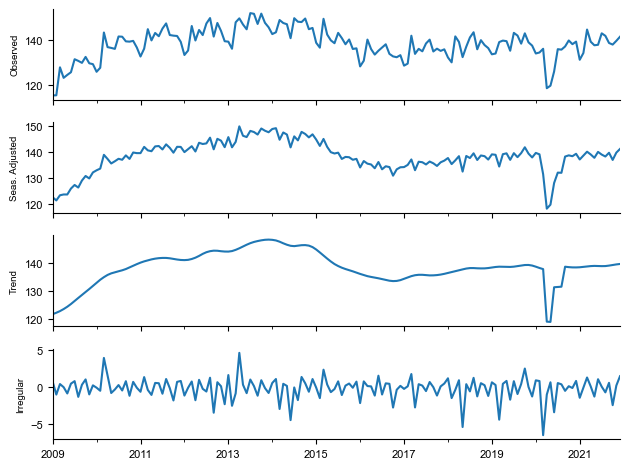

In [ ]:
#print(result.seasadj)
# visualize the filtered data
result.plot()
plt.show()

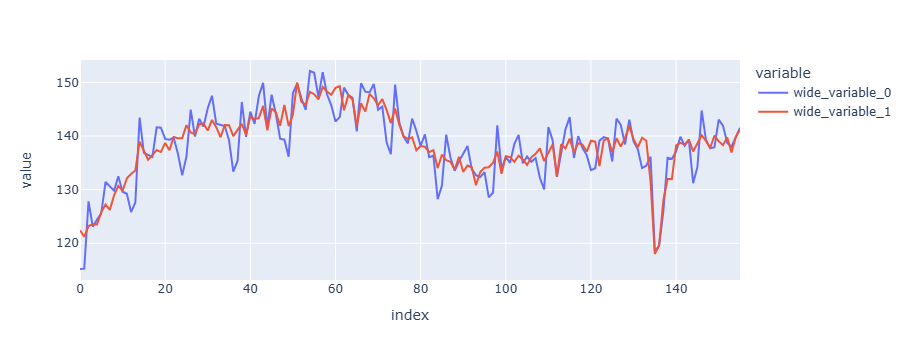

In [ ]:
px.line(y=[df['indice_100_ibc_br'], result.seasadj])

Para índice de sentimento

In [ ]:
result = x13_arima_analysis(endog = df['normalized_sentiment_agg_carosia_by_month_with_op'],
                            #start = 0,
                            #freq = 'M',
                            x12path = X12PATH)

C:\Users\Lord-\miniconda3\envs\sa-pytorch\lib\site-packages\statsmodels\tsa\x13.py:189: X13Warning:

          series with zero or negative values.
  
          found in one or more of the estimated spectra.



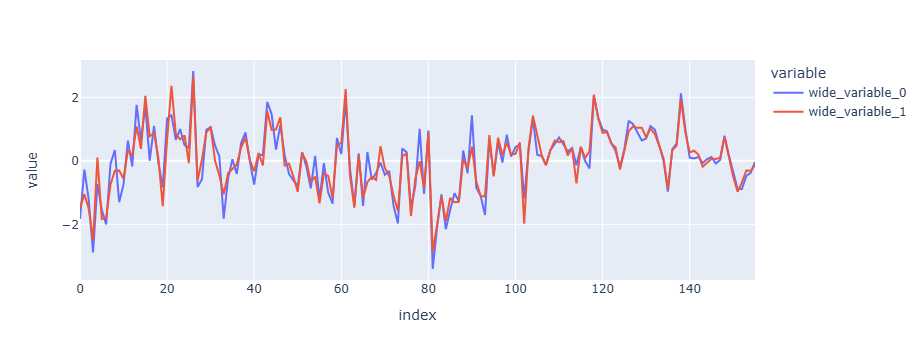

In [ ]:
px.line(y=[df['normalized_sentiment_agg_carosia_by_month_with_op'], result.seasadj])

#### Other

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
decomposition = seasonal_decompose(df['indice_100_industrias_transformacao'],
                                   model='multiplicative',
                                  period = 12)

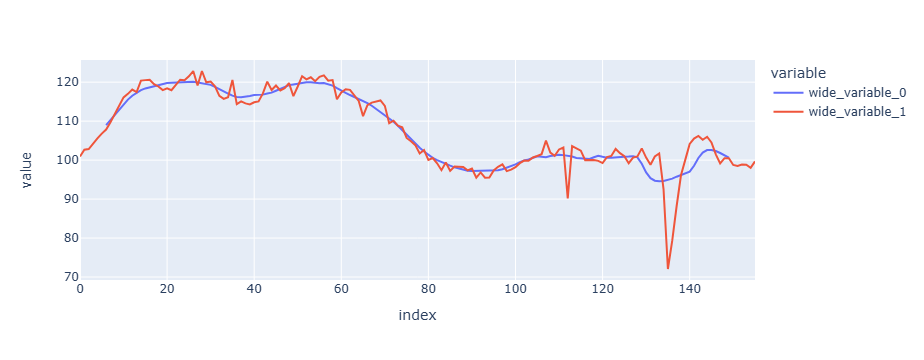

In [ ]:
px.line(y = [decomposition.trend, df['indice_100_industrias_transformacao']])

In [ ]:
for column in ['normalized_sentiment_agg_carosia_by_month_with_op',
       'normalized_sentiment_weighted_agg_carosia_by_month_with_op',
       'normalized_sentiment_agg_picault_by_month_with_op',
       'normalized_sentiment_agg_carosia_by_month_with_sentilex',
       'normalized_sentiment_weighted_agg_carosia_by_month_with_sentilex',
       'normalized_sentiment_agg_picault_by_month_with_sentilex',
       'normalized_sentiment_agg_carosia_by_month_with_lm',
       'normalized_sentiment_weighted_agg_carosia_by_month_with_lm',
       'normalized_sentiment_agg_picault_by_month_with_lm',
       'normalized_sentiment_agg_carosia_by_month_with_vader',
       'normalized_sentiment_weighted_agg_carosia_by_month_with_vader',
       'normalized_sentiment_agg_picault_by_month_with_vader',
       #'prefix_media_prazo_dias',
       'indice_100_icc',
       'indice_100_sond_servicos',
       #'indice_100_sond_servicos_dessaz',
       'indice_100_industria_geral',
       'indice_100_industrias_extrativas',
       'indice_100_industrias_transformacao',
       'tx_ipca',
       'ipca_index',
       'tx_ipca_acum_12',
       'ptax',
       'tx_desocupacao',
       'estoque_emprego',
       'ibov_index',
       'indice_vix_mean_close',
       'indice_embi_brasil',
       'indice_100_indic_ipea_fbcf',
       'indice_100_ibc_br',
       'tx_prefix_media_juros',
       'tx_selic_meta',
       'tx_expectativa_ipca_12']:
    result = x13_arima_analysis(endog = df[df[column].notnull()][column],
                        #start = 0,  # nao precisa de index for datetimeindex do pandas
                        #freq = 'M', # nao precisa de index for datetimeindex do pandas
                            x12path = X12PATH)
    df['dessaz_' + column] = result.seasadj

C:\Users\Lord-\miniconda3\envs\sa-pytorch\lib\site-packages\statsmodels\tsa\x13.py:189: X13Warning:

          series with zero or negative values.
  
          found in one or more of the estimated spectra.

C:\Users\Lord-\miniconda3\envs\sa-pytorch\lib\site-packages\statsmodels\tsa\x13.py:189: X13Warning:

          series with zero or negative values.

C:\Users\Lord-\miniconda3\envs\sa-pytorch\lib\site-packages\statsmodels\tsa\x13.py:189: X13Warning:

          series with zero or negative values.
  
          found in the estimated spectrum of the regARIMA residuals.
  
          found in one or more of the estimated spectra.

C:\Users\Lord-\miniconda3\envs\sa-pytorch\lib\site-packages\statsmodels\tsa\x13.py:189: X13Warning:

          series with zero or negative values.

C:\Users\Lord-\miniconda3\envs\sa-pytorch\lib\site-packages\statsmodels\tsa\x13.py:189: X13Warning:

          series with zero or negative values.

C:\Users\Lord-\miniconda3\envs\sa-pytorch\lib\site-packages\sta

### Outlier

In [ ]:
[col for col in df.columns if 'sent' not in col]

['date_time_month',
 'prefix_media_prazo_dias',
 'indice_100_icc',
 'indice_100_sond_servicos',
 'indice_100_sond_servicos_dessaz',
 'indice_100_industria_geral',
 'indice_100_industrias_extrativas',
 'indice_100_industrias_transformacao',
 'tx_ipca',
 'ipca_index',
 'tx_ipca_acum_12',
 'ptax',
 'tx_desocupacao',
 'estoque_emprego',
 'ibov_index',
 'indice_vix_mean_close',
 'indice_embi_brasil',
 'indice_100_indic_ipea_fbcf',
 'indice_100_ibc_br',
 'tx_prefix_media_juros',
 'tx_selic_meta',
 'tx_expectativa_ipca_12',
 'new_index_with_freq',
 'dessaz_indice_100_icc',
 'dessaz_indice_100_sond_servicos',
 'dessaz_indice_100_industria_geral',
 'dessaz_indice_100_industrias_extrativas',
 'dessaz_indice_100_industrias_transformacao',
 'dessaz_tx_ipca',
 'dessaz_ipca_index',
 'dessaz_tx_ipca_acum_12',
 'dessaz_ptax',
 'dessaz_tx_desocupacao',
 'dessaz_estoque_emprego',
 'dessaz_ibov_index',
 'dessaz_indice_vix_mean_close',
 'dessaz_indice_embi_brasil',
 'dessaz_indice_100_indic_ipea_fbcf',
 '

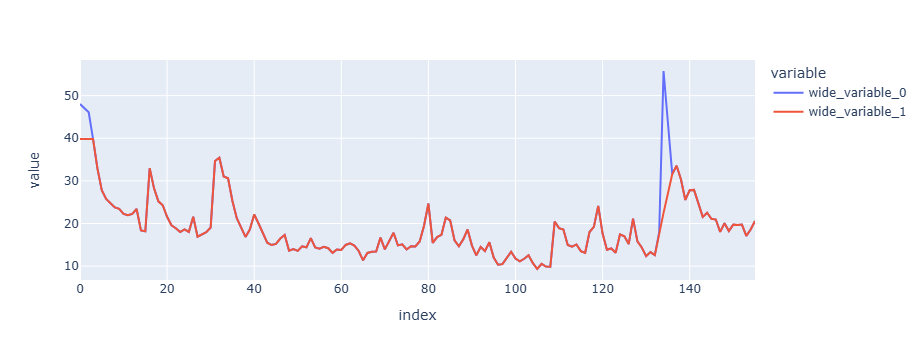

In [ ]:
# exemplo
column = 'dessaz_indice_vix_mean_close'
col_sem_out = df[[column]].copy()
col_sem_out.loc[np.abs(stats.zscore(col_sem_out[column])) > 3, column] = np.nan
col_sem_out[column].interpolate(method='linear',
                                inplace=True,
                                limit_direction = 'both')
px.line(y= [df[column],
            col_sem_out[column]])

In [ ]:
for column in ['indice_100_sond_servicos_dessaz',
             'dessaz_normalized_sentiment_agg_carosia_by_month_with_op',
             'dessaz_normalized_sentiment_weighted_agg_carosia_by_month_with_op',
             'dessaz_normalized_sentiment_agg_picault_by_month_with_op',
             'dessaz_normalized_sentiment_agg_carosia_by_month_with_sentilex',
             'dessaz_normalized_sentiment_weighted_agg_carosia_by_month_with_sentilex',
             'dessaz_normalized_sentiment_agg_picault_by_month_with_sentilex',
             'dessaz_normalized_sentiment_agg_carosia_by_month_with_lm',
             'dessaz_normalized_sentiment_weighted_agg_carosia_by_month_with_lm',
             'dessaz_normalized_sentiment_agg_picault_by_month_with_lm',
             'dessaz_normalized_sentiment_agg_carosia_by_month_with_vader',
             'dessaz_normalized_sentiment_weighted_agg_carosia_by_month_with_vader',
             'dessaz_normalized_sentiment_agg_picault_by_month_with_vader',
             'dessaz_indice_100_icc',
             'dessaz_indice_100_sond_servicos',
             'dessaz_indice_100_industria_geral',
             'dessaz_indice_100_industrias_extrativas',
             'dessaz_indice_100_industrias_transformacao',
             'dessaz_tx_ipca',
             'dessaz_ipca_index',
             'dessaz_tx_ipca_acum_12',
             'dessaz_ptax',
             'dessaz_tx_desocupacao',
             'dessaz_estoque_emprego',
             'dessaz_ibov_index',
             'dessaz_indice_vix_mean_close',
             'dessaz_indice_embi_brasil',
             'dessaz_indice_100_indic_ipea_fbcf',
             'dessaz_indice_100_ibc_br',
             'dessaz_tx_prefix_media_juros',
             'dessaz_tx_selic_meta',
             'dessaz_tx_expectativa_ipca_12']:
    col_sem_out = df[[column]].copy()
    col_sem_out.loc[np.abs(stats.zscore(col_sem_out[column])) > 3, column] = np.nan
    col_sem_out[column].interpolate(method='linear',
                                    inplace=True,
                                    limit_direction = 'both')
    df['outclean_' + column] = col_sem_out[column]

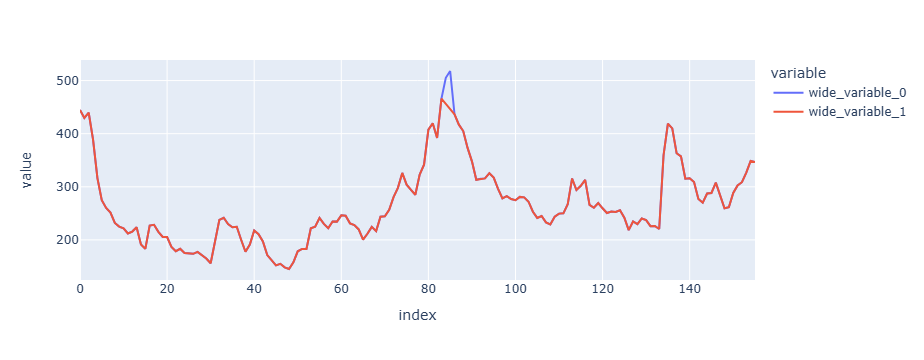

In [ ]:
# apanhado dos que mais variam e vão ser afetados:
# dessaz_normalized_sentiment_agg_carosia_by_month_with_op
# dessaz_indice_100_ibc_br
# dessaz_indice_vix_mean_close
# dessaz_indice_embi_brasil
col = 'dessaz_indice_embi_brasil'
px.line(y= [df[col],
            df['outclean_' + col]])

In [ ]:
df.reset_index(inplace=True)

# Statistical Analysis

## Correlations

In [ ]:
df.head(1)

index date_time_month  \
0 2009-01-01      2009-01-01   

   normalized_sentiment_agg_carosia_by_month_with_op  \
0                                            -1.8315   

   normalized_sentiment_weighted_agg_carosia_by_month_with_op  \
0                                            -1.1212            

   normalized_sentiment_agg_picault_by_month_with_op  \
0                                            -0.6106   

   normalized_sentiment_agg_carosia_by_month_with_sentilex  \
0                                             1.6605         

   normalized_sentiment_weighted_agg_carosia_by_month_with_sentilex  \
0                                             1.2305                  

   normalized_sentiment_agg_picault_by_month_with_sentilex  \
0                                             0.6775         

   normalized_sentiment_agg_carosia_by_month_with_lm  \
0                                            -0.9431   

   normalized_sentiment_weighted_agg_carosia_by_month_with_lm  ...  \
0                                            -0.5427           ...   

   outclean_dessaz_tx_desocupacao  outclean_dessaz_estoque_emprego  \
0                        0.074717                     3.077337e+07   

   outclean_dessaz_ibov_index  outclean_dessaz_indice_vix_mean_close  \
0                38814.630584                              39.797085   

   outclean_dessaz_indice_embi_brasil  \
0                          444.819347   

   outclean_dessaz_indice_100_indic_ipea_fbcf  \
0                                  132.432357   

   outclean_dessaz_indice_100_ibc_br  outclean_dessaz_tx_prefix_media_juros  \
0                         122.434079                               0.113757   

   outclean_dessaz_tx_selic_meta  outclean_dessaz_tx_expectativa_ipca_12  
0                       0.134646                                0.047083  

[1 rows x 99 columns]

In [ ]:
df.corr(method = 'pearson' # 'pearson' (default), 'spearman', 'kendall'
         ).loc[['tx_prefix_media_juros', 'indice_100_indic_ipea_fbcf', 'ibov_index']].transpose()

tx_prefix_media_juros  \
index                                                           -0.509987   
date_time_month                                                 -0.509987   
normalized_sentiment_agg_carosia_by_month_with_op               -0.354035   
normalized_sentiment_weighted_agg_carosia_by_mo...              -0.356058   
normalized_sentiment_agg_picault_by_month_with_op               -0.320581   
...                                                                   ...   
outclean_dessaz_indice_100_indic_ipea_fbcf                       0.122659   
outclean_dessaz_indice_100_ibc_br                                0.061517   
outclean_dessaz_tx_prefix_media_juros                            0.992335   
outclean_dessaz_tx_selic_meta                                    0.847409   
outclean_dessaz_tx_expectativa_ipca_12                           0.750362   

                                                    indice_100_indic_ipea_fbcf  \
index                                                                -0.346898   
date_time_month                                                      -0.346898   
normalized_sentiment_agg_carosia_by_month_with_op                     0.045707   
normalized_sentiment_weighted_agg_carosia_by_mo...                    0.001166   
normalized_sentiment_agg_picault_by_month_with_op                     0.046143   
...                                                                        ...   
outclean_dessaz_indice_100_indic_ipea_fbcf                            0.947536   
outclean_dessaz_indice_100_ibc_br                                     0.771660   
outclean_dessaz_tx_prefix_media_juros                                 0.130011   
outclean_dessaz_tx_selic_meta                                         0.018478   
outclean_dessaz_tx_expectativa_ipca_12                                0.478346   

                                                    ibov_index  
index                                                 0.739668  
date_time_month                                       0.739668  
normalized_sentiment_agg_carosia_by_month_with_op     0.345453  
normalized_sentiment_weighted_agg_carosia_by_mo...    0.339853  
normalized_sentiment_agg_picault_by_month_with_op     0.285446  
...                                                        ...  
outclean_dessaz_indice_100_indic_ipea_fbcf           -0.202516  
outclean_dessaz_indice_100_ibc_br                    -0.080507  
outclean_dessaz_tx_prefix_media_juros                -0.717676  
outclean_dessaz_tx_selic_meta                        -0.799936  
outclean_dessaz_tx_expectativa_ipca_12               -0.768517  

[99 rows x 3 columns]

In [ ]:
df.corr(method = 'pearson' # 'pearson' (default), 'spearman', 'kendall'
         ).loc[['tx_prefix_media_juros']].transpose().sort_values(by='tx_prefix_media_juros').head(40)

tx_prefix_media_juros
ibov_index                                                      -0.717276
dessaz_ibov_index                                               -0.716959
outclean_dessaz_ibov_index                                      -0.716959
outclean_dessaz_tx_desocupacao                                  -0.526233
index                                                           -0.509987
date_time_month                                                 -0.509987
new_index_with_freq                                             -0.509987
tx_desocupacao                                                  -0.467297
ipca_index                                                      -0.466545
outclean_dessaz_ipca_index                                      -0.466349
dessaz_ipca_index                                               -0.466349
dessaz_tx_desocupacao                                           -0.464722
outclean_dessaz_ptax                                            -0.454873
dessaz_ptax                                                     -0.454873
ptax                                                            -0.451611
outclean_dessaz_normalized_sentiment_weighted_a...              -0.399110
dessaz_normalized_sentiment_agg_carosia_by_mont...              -0.359468
dessaz_normalized_sentiment_weighted_agg_carosi...              -0.358986
normalized_sentiment_weighted_agg_carosia_by_mo...              -0.356058
normalized_sentiment_agg_carosia_by_month_with_op               -0.354035
outclean_dessaz_normalized_sentiment_agg_carosi...              -0.333494
dessaz_normalized_sentiment_agg_picault_by_mont...              -0.323739
normalized_sentiment_agg_picault_by_month_with_op               -0.320581
outclean_dessaz_normalized_sentiment_agg_picaul...              -0.279193
prefix_media_prazo_dias                                         -0.188854
dessaz_indice_vix_mean_close                                    -0.101689
indice_vix_mean_close                                           -0.094839
outclean_dessaz_normalized_sentiment_weighted_a...              -0.086816
outclean_indice_100_sond_servicos_dessaz                        -0.082749
estoque_emprego                                                 -0.080741
dessaz_estoque_emprego                                          -0.079155
outclean_dessaz_estoque_emprego                                 -0.079155
dessaz_normalized_sentiment_weighted_agg_carosi...              -0.071030
outclean_dessaz_indice_100_sond_servicos                        -0.068780
dessaz_indice_100_sond_servicos                                 -0.068780
indice_100_sond_servicos                                        -0.066449
indice_100_sond_servicos_dessaz                                 -0.063561
normalized_sentiment_weighted_agg_carosia_by_mo...              -0.061678
outclean_dessaz_indice_vix_mean_close                           -0.055963
dessaz_indice_100_icc                                           -0.043516

In [ ]:
corr = df[[col for col in df.columns if 'sent' not in col]].corr()

### Heatmap

E a correlação com lags? fazer também?
- qual nº de lags?
- foward e backward

<Axes: >

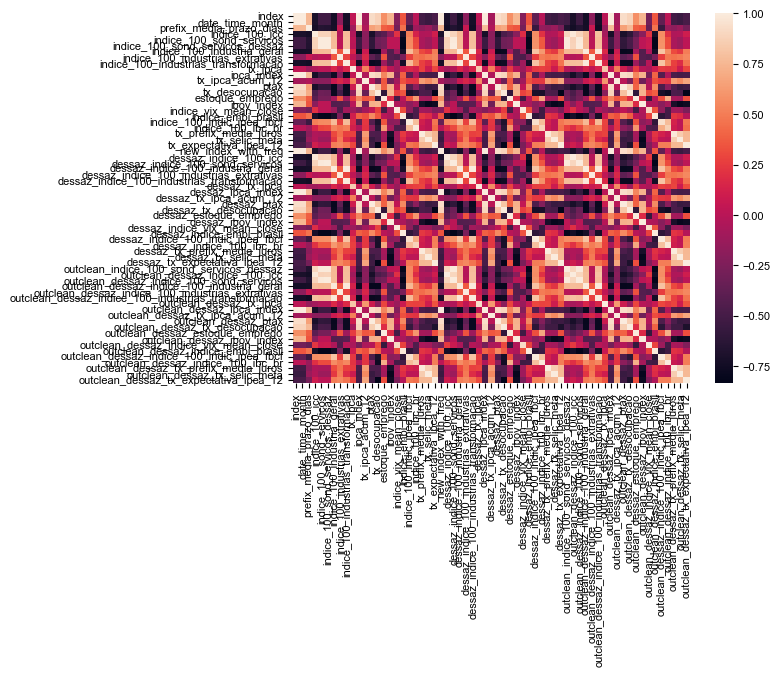

In [ ]:
sb.heatmap(corr,
           #cmap="Blues",
           #annot=True,
           xticklabels=True,
           yticklabels=True)

### Carosia

C:\Users\Lord-\miniconda3\envs\sa-pytorch\lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



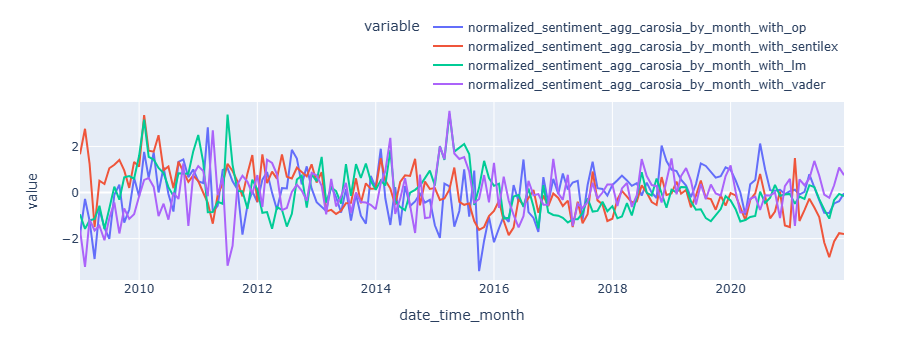

In [ ]:
fig = px.line(df, x = 'date_time_month', y = ['normalized_sentiment_agg_carosia_by_month_with_op',
                                            'normalized_sentiment_agg_carosia_by_month_with_sentilex',
                                            'normalized_sentiment_agg_carosia_by_month_with_lm',
                                            'normalized_sentiment_agg_carosia_by_month_with_vader'])
fig.update_layout(legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))

C:\Users\Lord-\miniconda3\envs\sa-pytorch\lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



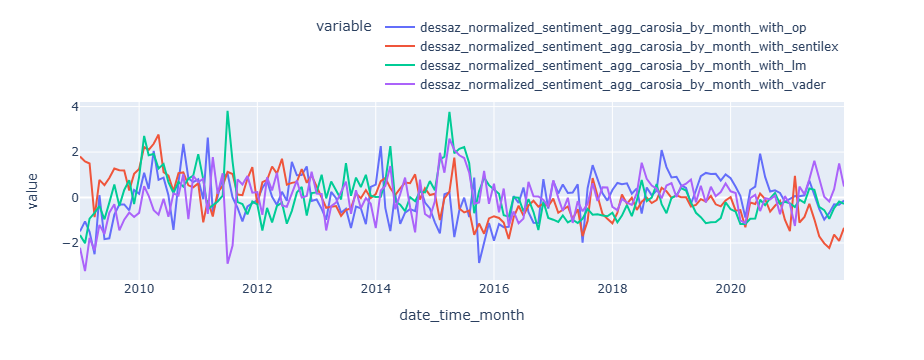

In [ ]:
fig = px.line(df, x = 'date_time_month',
              y = ['dessaz_normalized_sentiment_agg_carosia_by_month_with_op',
                   'dessaz_normalized_sentiment_agg_carosia_by_month_with_sentilex',
                   'dessaz_normalized_sentiment_agg_carosia_by_month_with_lm',
                   'dessaz_normalized_sentiment_agg_carosia_by_month_with_vader'])
fig.update_layout(legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))

In [ ]:
[col for col in df.columns if 'outclean' in col]

['outclean_indice_100_sond_servicos_dessaz',
 'outclean_dessaz_normalized_sentiment_agg_carosia_by_month_with_op',
 'outclean_dessaz_normalized_sentiment_weighted_agg_carosia_by_month_with_op',
 'outclean_dessaz_normalized_sentiment_agg_picault_by_month_with_op',
 'outclean_dessaz_normalized_sentiment_agg_carosia_by_month_with_sentilex',
 'outclean_dessaz_normalized_sentiment_weighted_agg_carosia_by_month_with_sentilex',
 'outclean_dessaz_normalized_sentiment_agg_picault_by_month_with_sentilex',
 'outclean_dessaz_normalized_sentiment_agg_carosia_by_month_with_lm',
 'outclean_dessaz_normalized_sentiment_weighted_agg_carosia_by_month_with_lm',
 'outclean_dessaz_normalized_sentiment_agg_picault_by_month_with_lm',
 'outclean_dessaz_normalized_sentiment_agg_carosia_by_month_with_vader',
 'outclean_dessaz_normalized_sentiment_weighted_agg_carosia_by_month_with_vader',
 'outclean_dessaz_normalized_sentiment_agg_picault_by_month_with_vader',
 'outclean_dessaz_indice_100_icc',
 'outclean_dessaz

In [ ]:
df.head(1)

index date_time_month  \
0 2009-01-01      2009-01-01   

   normalized_sentiment_agg_carosia_by_month_with_op  \
0                                            -1.8315   

   normalized_sentiment_weighted_agg_carosia_by_month_with_op  \
0                                            -1.1212            

   normalized_sentiment_agg_picault_by_month_with_op  \
0                                            -0.6106   

   normalized_sentiment_agg_carosia_by_month_with_sentilex  \
0                                             1.6605         

   normalized_sentiment_weighted_agg_carosia_by_month_with_sentilex  \
0                                             1.2305                  

   normalized_sentiment_agg_picault_by_month_with_sentilex  \
0                                             0.6775         

   normalized_sentiment_agg_carosia_by_month_with_lm  \
0                                            -0.9431   

   normalized_sentiment_weighted_agg_carosia_by_month_with_lm  ...  \
0                                            -0.5427           ...   

   outclean_dessaz_tx_desocupacao  outclean_dessaz_estoque_emprego  \
0                        0.074717                     3.077337e+07   

   outclean_dessaz_ibov_index  outclean_dessaz_indice_vix_mean_close  \
0                38814.630584                              39.797085   

   outclean_dessaz_indice_embi_brasil  \
0                          444.819347   

   outclean_dessaz_indice_100_indic_ipea_fbcf  \
0                                  132.432357   

   outclean_dessaz_indice_100_ibc_br  outclean_dessaz_tx_prefix_media_juros  \
0                         122.434079                               0.113757   

   outclean_dessaz_tx_selic_meta  outclean_dessaz_tx_expectativa_ipca_12  
0                       0.134646                                0.047083  

[1 rows x 99 columns]

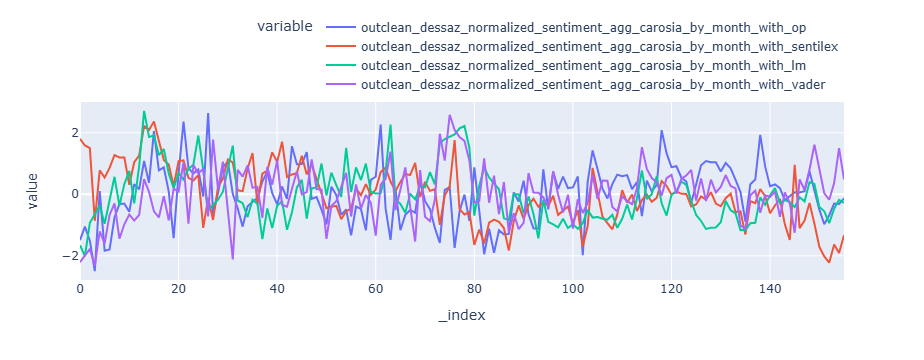

In [ ]:
fig = px.line(df, # x = 'date_time_month',
              y = ['outclean_dessaz_normalized_sentiment_agg_carosia_by_month_with_op',
                   'outclean_dessaz_normalized_sentiment_agg_carosia_by_month_with_sentilex',
                   'outclean_dessaz_normalized_sentiment_agg_carosia_by_month_with_lm',
                   'outclean_dessaz_normalized_sentiment_agg_carosia_by_month_with_vader'])
fig.update_layout(legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))

### Picault

C:\Users\Lord-\miniconda3\envs\sa-pytorch\lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



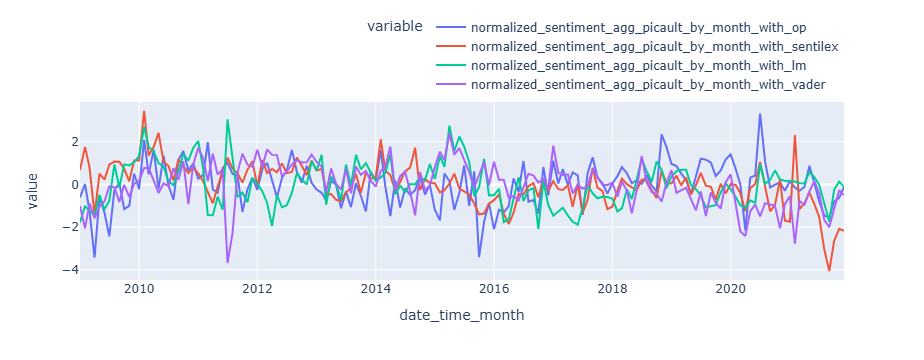

In [ ]:
fig = px.line(df, x = 'date_time_month', y = ['normalized_sentiment_agg_picault_by_month_with_op',
                                        'normalized_sentiment_agg_picault_by_month_with_sentilex',
                                        'normalized_sentiment_agg_picault_by_month_with_lm',
                                        'normalized_sentiment_agg_picault_by_month_with_vader'])
fig.update_layout(legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))

## PCA

Apply PCA into diff sentiment indexes and see how the principal component behaves

https://scikit-learn.org/1.4/modules/decomposition.html#pca

In [ ]:
cols_for_pca = ['normalized_sentiment_agg_carosia_by_month_with_op',
               'normalized_sentiment_agg_carosia_by_month_with_sentilex',
               'normalized_sentiment_agg_carosia_by_month_with_lm',
               'normalized_sentiment_agg_carosia_by_month_with_vader']

C:\Users\Lord-\miniconda3\envs\sa-pytorch\lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



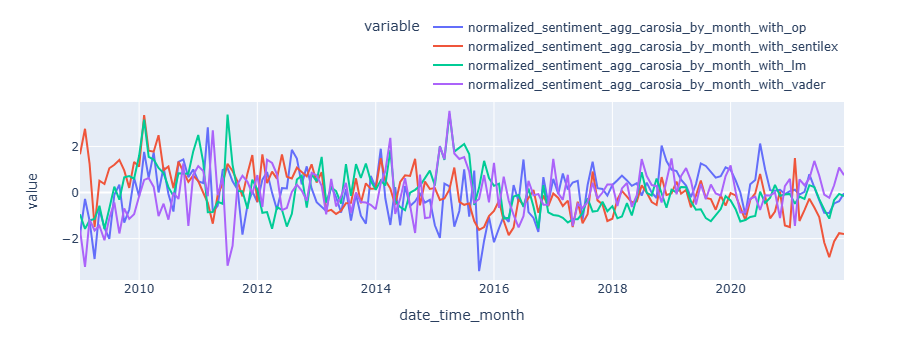

In [ ]:
fig = px.line(df, x = 'date_time_month',
              y = ['normalized_sentiment_agg_carosia_by_month_with_op',
                   'normalized_sentiment_agg_carosia_by_month_with_sentilex',
                   'normalized_sentiment_agg_carosia_by_month_with_lm',
                   'normalized_sentiment_agg_carosia_by_month_with_vader'])
fig.update_layout(legend = dict(orientation="h",
                                yanchor="bottom",
                                y=1.02,
                                xanchor="right",
                                x=1))

C:\Users\Lord-\miniconda3\envs\sa-pytorch\lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



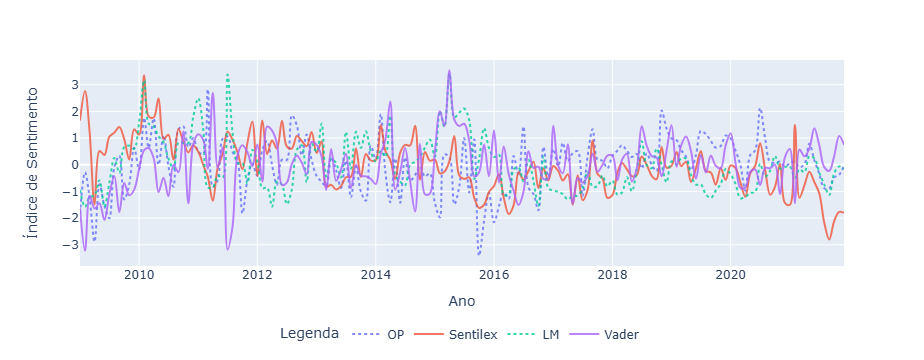

In [ ]:
import plotly.express as px

# Define a colorblind-friendly palette
#color_palette = ['#0072B2', '#E69F00', '#009E73', '#D55E00']  # Blue, Orange, Green, Red

# Update figure with improved aesthetics
fig = px.line(df, x='date_time_month',
              y=['normalized_sentiment_agg_carosia_by_month_with_op',
                 'normalized_sentiment_agg_carosia_by_month_with_sentilex',
                 'normalized_sentiment_agg_carosia_by_month_with_lm',
                 'normalized_sentiment_agg_carosia_by_month_with_vader'],
             #color_discrete_sequence=color_palette
             )

# Set unit ticks for y-axis
fig.update_yaxes(tickmode='linear', dtick=1)

# Update legend labels and position
legend_labels = ['OP',
                 'Sentilex',
                 'LM',
                 'Vader']
for i, label in enumerate(legend_labels):
    fig.data[i].name = label

fig.update_layout(legend=dict(
    title='Legenda',
    orientation="h",
    yanchor="bottom",
    y=-0.4,
    xanchor="center",
    x=0.5))

# Add opacity to lines
for trace in fig.data:
    trace.opacity = 0.8

# Reduce line crossings (smoothing)
fig.update_traces(line_shape='spline')

# Optional: Add dashed lines for more clarity between overlapping lines
for i, trace in enumerate(fig.data):
    if i % 2 == 0:
        trace.line.dash = 'dot'

# Add title, axis labels, and grid
fig.update_layout(
    #title="Normalized Sentiment Over Time",
    xaxis_title="Ano",
    yaxis_title="Índice de Sentimento",
    xaxis_showgrid=True,
    yaxis_showgrid=True,
)

fig.show()

In [ ]:
# Export the figure as a PNG file
fig.write_image("indices_de_sentimento.png")

In [ ]:
data = df[cols_for_pca].dropna().copy()

pca_index = df[cols_for_pca].dropna().index

In [ ]:
pca = PCA(n_components=1) # number of componentes to retain
pca.fit(data) # fit data to model
transformed_data = pca.transform(data)

In [ ]:
df.loc[pca_index, 'sent_pca'] = transformed_data

C:\Users\Lord-\miniconda3\envs\sa-pytorch\lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



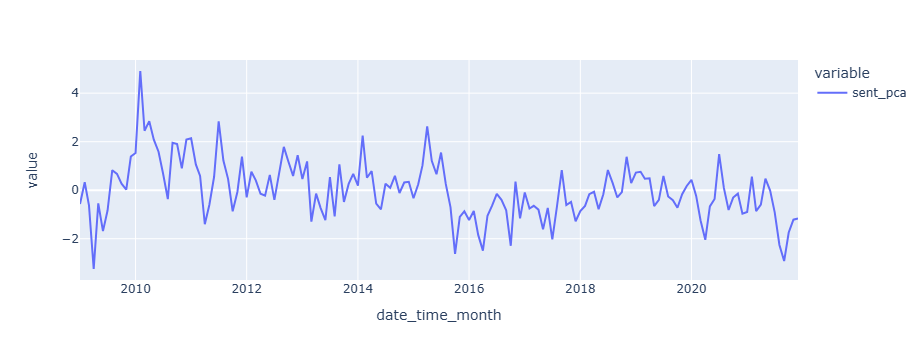

In [ ]:
#df['sent_pca'] = transformed_data
px.line(df, x = 'date_time_month', y = ['sent_pca'])
# Pandemia e Joesley day foram os piores momentos da série
# é onde tiveram os circuit breaks

In [ ]:
df[cols_for_pca + ['sent_pca']].corr(method = 'pearson' # 'pearson' (default), 'spearman', 'kendall'
                         ).loc[['sent_pca']].transpose()

sent_pca
normalized_sentiment_agg_carosia_by_month_with_op   0.584732
normalized_sentiment_agg_carosia_by_month_with_...  0.774188
normalized_sentiment_agg_carosia_by_month_with_lm   0.682154
normalized_sentiment_agg_carosia_by_month_with_...  0.158152
sent_pca                                            1.000000

In [ ]:
df['sent_min'] = df[cols_for_pca].apply(lambda row: min(row), axis=1)
df['sent_max'] = df[cols_for_pca].apply(lambda row: max(row), axis=1)

fill options:
- https://plotly.com/python/reference/scatter/#scatter-line

Referências das dataas:

2021-11-30: Fed admite que pode subir juros
- https://www.seudinheiro.com/2021/economia/powell-fed-inflacao-transitoria-mercados-30-11/

'2021-09-22': "Fed sinaliza politica monetária restritiva" - Fim do tapering
- https://www.bing.com/search?q=22+de+setembro+de+2021+jeremy+powell&cvid=11141687adfe45dabbce25ef9920a77f&gs_lcrp=EgZjaHJvbWUyBggAEEUYOTIGCAEQABhA0gEINTExNWowajmoAgewAgE&FORM=ANAB01&PC=DCTS

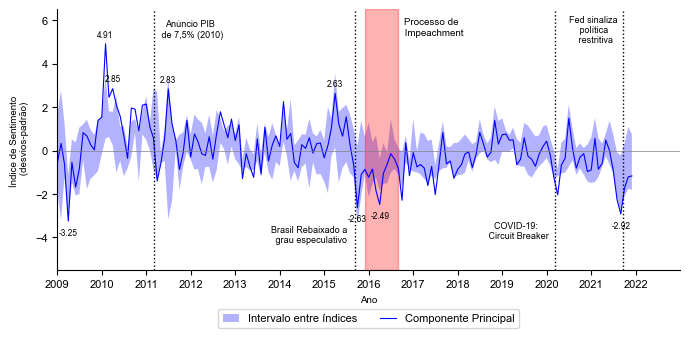

In [ ]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(7, 3.5))

# Add the gray shaded area between the minimum and maximum values
ax.fill_between(df['date_time_month'], df['sent_min'], df['sent_max'],
                color='blue', alpha=0.3, label='Intervalo entre índices', edgecolor='none')

# Add the PCA line
ax.plot(df['date_time_month'], df['sent_pca'], color='blue', linewidth=0.8, label='Componente Principal')

# Highlight the impeachment period
inicio_impeachment = pd.to_datetime('2015-12-02')
fim_impeachment = pd.to_datetime('2016-08-31')
ax.axvspan(inicio_impeachment, fim_impeachment, color='red', alpha=0.3)

# Set the x and y limits
# Define your desired limits
x_min = pd.to_datetime('2009-01-01')  # Example minimum for x-axis
x_max = pd.to_datetime('2022-12-31')  # Example maximum for x-axis
y_min = -5.5  # Example minimum for y-axis
y_max = 6.5   # Example maximum for y-axis
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# Add annotation for the impeachment period
ax.annotate('Processo de \n Impeachment',
            xy=(inicio_impeachment + (fim_impeachment - inicio_impeachment) / 2, 5),
            xytext=(37, 5),  # Shift 20 points to the right (x-offset), keep y the same
            textcoords='offset points',  # Use offset in points from the xy position
            fontsize=7, ha='center', color='black')

# Important dates and annotations
datas_importantes = {
    '2011-03-03': "Anúncio PIB \n de 7,5% (2010)",
    '2015-09-09': "Brasil Rebaixado a \n grau especulativo",
    '2020-03-11': "COVID-19: \n Circuit Breaker",
    '2021-09-22': "Fed sinaliza \n política \n restritiva"
}
# Example specific xytext offsets for each annotation
offsets = {
    '2011-03-03': (27, -20),  # Example offset (x_offset, y_offset)
    '2015-09-09': (-32, -168),
    '2020-03-11': (-27, -165),
    '2021-09-22': (-21, -24)
}

# Add the vertical lines and annotations for important dates
for date_str, label in datas_importantes.items():
    date = pd.to_datetime(date_str)
    # Plot vertical line
    ax.axvline(date, color='black', linestyle=':', linewidth=1)
    # Annotate with custom offsets
    offset = offsets.get(date_str, (0, 0))  # Default to (0, 0) if no custom offset
    ax.annotate(label,
                xy=(date, y_max),  # Anchored to the top of the plot (y_max)
                xytext=offset,      # Custom text offset
                textcoords='offset points',
                fontsize=6.5, ha='center', color='black')

# Add annotations for max and min values
max_values = df.nlargest(4, 'sent_pca')
min_values = df.nsmallest(4, 'sent_pca')

for _, row in pd.concat([max_values, min_values]).iterrows():
    ax.annotate(f"{row['sent_pca']:.2f}",
                xy=(row['date_time_month'], row['sent_pca']),
                fontsize=6, ha='center',
                xytext=(0, 5 if row['sent_pca'] > 0 else -10),  # Adjust vertical position
                textcoords='offset points')

# Add a horizontal line at y=0
ax.axhline(0, color='gray', linewidth=0.5, linestyle='-')

# Set axis labels and title
ax.set_xlabel("Ano", fontsize=7, fontfamily='Arial')  # Change fontfamily as needed
ax.set_ylabel("Índice de Sentimento \n (desvios-padrão)", fontsize=7, fontfamily='Arial')

# Move the legend below the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2,
          fontsize=8,  # Font size for the legend text
          )
# Customize ticks font
ax.tick_params(axis='x', labelsize=8, labelcolor='black', labelrotation=0, labelfontfamily='Arial')  # Change labelfamily as needed
ax.tick_params(axis='y', labelsize=8, labelcolor='black', labelfontfamily='Arial')  # Change labelfamily as needed

# Show x and y-axis lines (borders)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
# Set x-axis major locator to show all years
xticks = pd.date_range(start='2008-01-01', end='2022-01-01', freq='Y')
xticks = xticks + pd.DateOffset(days=1)
ax.set_xticks(xticks)  # Set the positions of the ticks
ax.set_xticklabels([date.strftime('%Y') for date in xticks], fontsize=8, ha='center')  # Set the labels for the ticks
# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
fig.savefig(f"{PATH_OUTPUT_GRAFICOS}\pca_plt.png", dpi=300)  # Export with higher DPI

In [ ]:
#fig.write_image(f'{PATH_OUTPUT_GRAFICOS}\pca_sentiment.png')

In [ ]:
df.corr(method = 'pearson' # 'pearson' (default), 'spearman', 'kendall'
        ).loc[['sent_pca']].transpose()

sent_pca
index                                              -0.378676
date_time_month                                    -0.378676
normalized_sentiment_agg_carosia_by_month_with_op   0.584732
normalized_sentiment_weighted_agg_carosia_by_mo...  0.372532
normalized_sentiment_agg_picault_by_month_with_op   0.615714
...                                                      ...
outclean_dessaz_tx_selic_meta                       0.018262
outclean_dessaz_tx_expectativa_ipca_12              0.083758
sent_pca                                            1.000000
sent_min                                            0.612670
sent_max                                            0.761035

[102 rows x 1 columns]

## Inference

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

In [ ]:
df.head(3)

index date_time_month  \
0 2009-01-01      2009-01-01   
1 2009-02-01      2009-02-01   
2 2009-03-01      2009-03-01   

   normalized_sentiment_agg_carosia_by_month_with_op  \
0                                            -1.8315   
1                                            -0.2775   
2                                            -1.2222   

   normalized_sentiment_weighted_agg_carosia_by_month_with_op  \
0                                            -1.1212            
1                                            -0.1951            
2                                            -0.8117            

   normalized_sentiment_agg_picault_by_month_with_op  \
0                                            -0.6106   
1                                             0.0105   
2                                            -1.2628   

   normalized_sentiment_agg_carosia_by_month_with_sentilex  \
0                                             1.6605         
1                                             2.7673         
2                                             1.2587         

   normalized_sentiment_weighted_agg_carosia_by_month_with_sentilex  \
0                                             1.2305                  
1                                             2.0067                  
2                                             0.9634                  

   normalized_sentiment_agg_picault_by_month_with_sentilex  \
0                                             0.6775         
1                                             1.7604         
2                                             0.7907         

   normalized_sentiment_agg_carosia_by_month_with_lm  \
0                                            -0.9431   
1                                            -1.5770   
2                                            -1.2103   

   normalized_sentiment_weighted_agg_carosia_by_month_with_lm  ...  \
0                                            -0.5427           ...   
1                                            -1.0556           ...   
2                                            -0.7875           ...   

   outclean_dessaz_indice_vix_mean_close  outclean_dessaz_indice_embi_brasil  \
0                              39.797085                          444.819347   
1                              39.797085                          429.652071   
2                              39.797085                          439.473931   

   outclean_dessaz_indice_100_indic_ipea_fbcf  \
0                                  132.432357   
1                                  129.514739   
2                                  132.700045   

   outclean_dessaz_indice_100_ibc_br  outclean_dessaz_tx_prefix_media_juros  \
0                         122.434079                               0.113757   
1                         121.209480                               0.111630   
2                         123.216602                               0.108288   

   outclean_dessaz_tx_selic_meta  outclean_dessaz_tx_expectativa_ipca_12  \
0                       0.134646                                0.047083   
1                       0.127488                                0.045501   
2                       0.118103                                0.043002   

   sent_pca  sent_min  sent_max  
0 -0.572507   -1.8315    1.6605  
1  0.329805   -3.2233    2.7673  
2 -0.626537   -1.2222    1.2587  

[3 rows x 102 columns]

In [ ]:
len(df) # (data:2020, 2021) its a short time series --> should try at least five years

156

### Granger-Causality

In [ ]:
# Testing if 'stl_sentiment_wind_30___agg_wei_sent_vader_mean' can predict 'icc'
max_lag = 5  # Define the maximum number of lags you want to test
test = 'ssr_chi2test'  # Test type, e.g., ssr_chi2test, ssr_ftest

gc_test = grangercausalitytests(
    df[['indice_100_icc',
        'normalized_sentiment_agg_carosia_by_month_with_sentilex']].dropna(),
            max_lag)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4728  , p=0.2268  , df_denom=152, df_num=1
ssr based chi2 test:   chi2=1.5018  , p=0.2204  , df=1
likelihood ratio test: chi2=1.4946  , p=0.2215  , df=1
parameter F test:         F=1.4728  , p=0.2268  , df_denom=152, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5407  , p=0.5835  , df_denom=149, df_num=2
ssr based chi2 test:   chi2=1.1177  , p=0.5719  , df=2
likelihood ratio test: chi2=1.1136  , p=0.5730  , df=2
parameter F test:         F=0.5407  , p=0.5835  , df_denom=149, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1182  , p=0.3438  , df_denom=146, df_num=3
ssr based chi2 test:   chi2=3.5155  , p=0.3188  , df=3
likelihood ratio test: chi2=3.4758  , p=0.3239  , df=3
parameter F test:         F=1.1182  , p=0.3438  , df_denom=146, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.9264  , p=0.4505  

In [ ]:
# Check the p-values
for lag in range(1, max_lag + 1):
    p_value = gc_test[lag][0][test][1]
    print(f"Lag {lag} p-value: {p_value}")

Lag 1 p-value: 0.22038828343257308
Lag 2 p-value: 0.571876226357048
Lag 3 p-value: 0.3187528174470551
Lag 4 p-value: 0.414373071328875
Lag 5 p-value: 0.4127748697392803


In [ ]:
#month_indicators_all[['icc', 'stl_sentiment_wind_30___agg_wei_sent_vader_mean']]

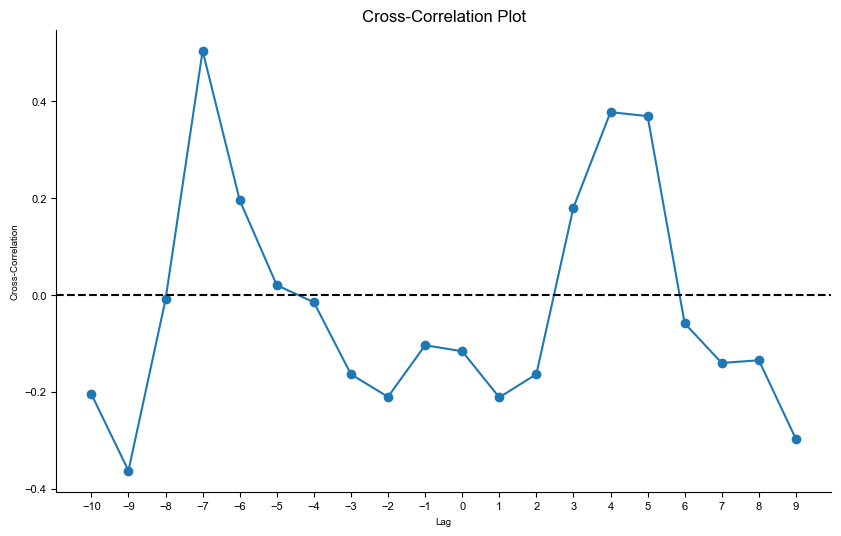

In [ ]:
import matplotlib.pyplot as plt
# Compute Cross-Correlation
lags = range(-10, 10)  # Number of lags (negative and positive)
ccorrs = [df.query("date_time_month > '2020-01-01' and date_time_month < '2022-01-01'")['normalized_sentiment_agg_carosia_by_month_with_sentilex'].corr(
    df.query("date_time_month > '2020-01-01' and date_time_month < '2022-01-01'")['indice_100_icc'].shift(lag)) for lag in lags]
# Plot Cross-Correlation
plt.figure(figsize=(10, 6))
plt.plot(lags, ccorrs, marker='o')
plt.axhline(y=0, linestyle='--', color='k')
plt.title('Cross-Correlation Plot')
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.xticks(ticks=[lag for lag in lags])
plt.show()
# Or use Plotly
#X = [lag for lag in lags]
#Y_1 = ccorrs
#fig = make_subplots()
#fig.add_trace(go.Scatter(x = X, y = Y_1, name='ccorrs', line = dict(color = 'red', dash='dot'),  opacity = 0.5))

# VAR

ATTENTION:
- Orthogonalization is done using the Cholesky decomposition of the estimated error covariance matrix
 and hence interpretations may change depending on variable ordering.


https://www.statsmodels.org/dev/vector_ar.html#var

https://www.statsmodels.org/dev/generated/statsmodels.tsa.vector_ar.var_model.VAR.html

https://www.statsmodels.org/dev/generated/statsmodels.tsa.vector_ar.var_model.VARResults.html#statsmodels.tsa.vector_ar.var_model.VARResults

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Columns: 102 entries, index to sent_max
dtypes: datetime64[ns](3), float64(99)
memory usage: 124.4 KB


In [ ]:
df.drop('index', axis = 1, inplace=True)

In [ ]:
# Create a new index with 'MS' frequency (Month Start)
new_index = pd.date_range(start = df.loc[0, 'date_time_month'],
                          end = df.loc[len(df) - 1, 'date_time_month'],
                          freq = 'MS')
len(new_index)
#Assign the new index to the DataFrame
df['new_index_with_freq'] = new_index

In [ ]:
if ((df['new_index_with_freq'] - df['date_time_month']) == '0 days').any() == True:
    print('As novas data para index batem exatamente com as datas previamente estabelecidas')
    df.index = new_index
else:
    print('há diferença entre alguma data')

As novas data para index batem exatamente com as datas previamente estabelecidas


In [ ]:
df.drop('date_time_month', axis = 1, inplace=True)

In [ ]:
df.drop(['tx_desocupacao', 'dessaz_tx_desocupacao',
        'outclean_dessaz_tx_desocupacao', 'new_index_with_freq'], axis = 1, inplace=True)

### df_var (for R analysis)

In [ ]:
df_var = df.dropna()

In [ ]:
df_var.columns

Index(['normalized_sentiment_agg_carosia_by_month_with_op',
       'normalized_sentiment_weighted_agg_carosia_by_month_with_op',
       'normalized_sentiment_agg_picault_by_month_with_op',
       'normalized_sentiment_agg_carosia_by_month_with_sentilex',
       'normalized_sentiment_weighted_agg_carosia_by_month_with_sentilex',
       'normalized_sentiment_agg_picault_by_month_with_sentilex',
       'normalized_sentiment_agg_carosia_by_month_with_lm',
       'normalized_sentiment_weighted_agg_carosia_by_month_with_lm',
       'normalized_sentiment_agg_picault_by_month_with_lm',
       'normalized_sentiment_agg_carosia_by_month_with_vader',
       'normalized_sentiment_weighted_agg_carosia_by_month_with_vader',
       'normalized_sentiment_agg_picault_by_month_with_vader',
       'prefix_media_prazo_dias', 'indice_100_icc', 'indice_100_sond_servicos',
       'indice_100_sond_servicos_dessaz', 'indice_100_industria_geral',
       'indice_100_industrias_extrativas',
       'indice_100_ind

In [ ]:
#df_var.to_csv(f'{PATH_OUTPUT_DADOS_ECONOMICOS}\df_var.csv')

## Stationarity

The VAR class assumes that the passed time series are stationary. Non-stationary or trending data can often be transformed to be stationary by first-differencing or some other method. For direct analysis of non-stationary time series, a standard stable VAR(p) model is not appropriate.



1. adfuler:

Null Hypothesis: The series has a unit root.

Alternate Hypothesis: The series has no unit root.

The null hypothesis of the Augmented Dickey-Fuller is that there is a unit root, with the alternative that there is no unit root. If the pvalue is above a critical size, then we cannot reject that there is a unit root.

https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html#statsmodels.tsa.stattools.adfuller

2. kpss

Null Hypothesis: The process is trend stationary.

Alternate Hypothesis: The series has a unit root (series is not stationary)
.
Computes the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test for the null hypothesis that x is level or trend stationary.

https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.kpss.html#statsmodels.tsa.stattools.kpss


Notebooks with both examples at:

https://www.statsmodels.org/dev/examples/notebooks/generated/stationarity_detrending_adf_kpss.html

Para estacionariedade devemos:
1. rejeitar H0 no AD (p < 0.05)
2. não rejeitar H0 no KPSS (p > 0.05)

In [ ]:
dict_df = {}
for column in df_var.columns:
    dict_df[column] = []
    for reg_param in ['c', 'ct', 'n']: # regresion params 'constant', 'const & trend', 'none
        adf_test = adfuller(df_var[column], regression = reg_param, autolag='AIC')
        stat = round(adf_test[0], 2)
        p_value = round(adf_test[1], 2)
        stationarity = ['stationary' if round(adf_test[1],2) < 0.05 else 'NON-stationary']

        dict_df[column].append(stat)
        dict_df[column].append(p_value)
        dict_df[column].append(stationarity)

tab_stationarity = pd.DataFrame.from_dict(dict_df,
                                           orient='index',
                                           columns = ['stat_c',
                                                      'p-value_c',
                                                      'stationarity_c',
                                                     'stat_ct',
                                                      'p-value_ct',
                                                      'stationarity_ct',
                                                     'stat_n',
                                                      'p-value_n',
                                                      'stationarity_n'])
tab_stationarity

stat_c  p-value_c  \
normalized_sentiment_agg_carosia_by_month_with_op    -3.11       0.03   
normalized_sentiment_weighted_agg_carosia_by_mo...   -3.92       0.00   
normalized_sentiment_agg_picault_by_month_with_op    -3.79       0.00   
normalized_sentiment_agg_carosia_by_month_with_...   -3.53       0.01   
normalized_sentiment_weighted_agg_carosia_by_mo...   -4.33       0.00   
...                                                    ...        ...   
outclean_dessaz_tx_selic_meta                        -2.41       0.14   
outclean_dessaz_tx_expectativa_ipca_12               -1.44       0.56   
sent_pca                                             -2.61       0.09   
sent_min                                             -2.83       0.05   
sent_max                                             -6.57       0.00   

                                                      stationarity_c  stat_ct  \
normalized_sentiment_agg_carosia_by_month_with_op       [stationary]    -2.97   
normalized_sentiment_weighted_agg_carosia_by_mo...      [stationary]    -3.93   
normalized_sentiment_agg_picault_by_month_with_op       [stationary]    -3.70   
normalized_sentiment_agg_carosia_by_month_with_...      [stationary]    -6.04   
normalized_sentiment_weighted_agg_carosia_by_mo...      [stationary]    -5.41   
...                                                              ...      ...   
outclean_dessaz_tx_selic_meta                       [NON-stationary]    -2.10   
outclean_dessaz_tx_expectativa_ipca_12              [NON-stationary]    -1.87   
sent_pca                                            [NON-stationary]    -7.23   
sent_min                                            [NON-stationary]    -3.05   
sent_max                                                [stationary]    -9.83   

                                                    p-value_ct  \
normalized_sentiment_agg_carosia_by_month_with_op         0.14   
normalized_sentiment_weighted_agg_carosia_by_mo...        0.01   
normalized_sentiment_agg_picault_by_month_with_op         0.02   
normalized_sentiment_agg_carosia_by_month_with_...        0.00   
normalized_sentiment_weighted_agg_carosia_by_mo...        0.00   
...                                                        ...   
outclean_dessaz_tx_selic_meta                             0.55   
outclean_dessaz_tx_expectativa_ipca_12                    0.67   
sent_pca                                                  0.00   
sent_min                                                  0.12   
sent_max                                                  0.00   

                                                     stationarity_ct  stat_n  \
normalized_sentiment_agg_carosia_by_month_with_op   [NON-stationary]   -3.08   
normalized_sentiment_weighted_agg_carosia_by_mo...      [stationary]   -3.92   
normalized_sentiment_agg_picault_by_month_with_op       [stationary]   -3.79   
normalized_sentiment_agg_carosia_by_month_with_...      [stationary]   -3.55   
normalized_sentiment_weighted_agg_carosia_by_mo...      [stationary]   -4.35   
...                                                              ...     ...   
outclean_dessaz_tx_selic_meta                       [NON-stationary]   -0.53   
outclean_dessaz_tx_expectativa_ipca_12              [NON-stationary]    0.10   
sent_pca                                                [stationary]   -2.62   
sent_min                                            [NON-stationary]   -1.10   
sent_max                                                [stationary]   -1.62   

                                                    p-value_n  \
normalized_sentiment_agg_carosia_by_month_with_op        0.00   
normalized_sentiment_weighted_agg_carosia_by_mo...       0.00   
normalized_sentiment_agg_picault_by_month_with_op        0.00   
normalized_sentiment_agg_carosia_by_month_with_...       0.00   
normalized_sentiment_weighted_agg_carosia_by_mo...       0.00   
...                                                       

### detrending by differencing and log

On the use of ln:
https://people.duke.edu/~rnau/411log.htm

In [ ]:
df_var.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 156 entries, 2009-01-01 to 2021-12-01
Freq: MS
Data columns (total 96 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   normalized_sentiment_agg_carosia_by_month_with_op                                 156 non-null    float64
 1   normalized_sentiment_weighted_agg_carosia_by_month_with_op                        156 non-null    float64
 2   normalized_sentiment_agg_picault_by_month_with_op                                 156 non-null    float64
 3   normalized_sentiment_agg_carosia_by_month_with_sentilex                           156 non-null    float64
 4   normalized_sentiment_weighted_agg_carosia_by_month_with_sentilex                  156 non-null    float64
 5   normalized_sentiment_agg_picault_by_month_with_sentilex                           156

In [ ]:
column

'sent_max'

In [ ]:
for column in df_var.columns:
    df_var['d_' + column ] = df_var[column] - df_var[column].shift(1)
    df_var['ln_' + column] = np.log(df_var[column])
    #df_var['dln_' + column] = np.log(df_var[column]).diff() # does it make sense?

C:\Users\Lord-\miniconda3\envs\sa-pytorch\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning:

invalid value encountered in log

C:\Users\Lord-\miniconda3\envs\sa-pytorch\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning:

invalid value encountered in log

C:\Users\Lord-\miniconda3\envs\sa-pytorch\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning:

invalid value encountered in log

C:\Users\Lord-\miniconda3\envs\sa-pytorch\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning:

invalid value encountered in log

C:\Users\Lord-\miniconda3\envs\sa-pytorch\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning:

invalid value encountered in log

C:\Users\Lord-\miniconda3\envs\sa-pytorch\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning:

invalid value encountered in log

C:\Users\Lord-\miniconda3\envs\sa-pytorch\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning:

invalid value encountered in log

C:\Users\Lord

In [ ]:
column

'sent_max'

In [ ]:
df_var.head(4)

normalized_sentiment_agg_carosia_by_month_with_op  \
2009-01-01                                            -1.8315   
2009-02-01                                            -0.2775   
2009-03-01                                            -1.2222   
2009-04-01                                            -2.8828   

            normalized_sentiment_weighted_agg_carosia_by_month_with_op  \
2009-01-01                                            -1.1212            
2009-02-01                                            -0.1951            
2009-03-01                                            -0.8117            
2009-04-01                                            -1.7337            

            normalized_sentiment_agg_picault_by_month_with_op  \
2009-01-01                                            -0.6106   
2009-02-01                                             0.0105   
2009-03-01                                            -1.2628   
2009-04-01                                            -3.4256   

            normalized_sentiment_agg_carosia_by_month_with_sentilex  \
2009-01-01                                             1.6605         
2009-02-01                                             2.7673         
2009-03-01                                             1.2587         
2009-04-01                                            -1.4958         

            normalized_sentiment_weighted_agg_carosia_by_month_with_sentilex  \
2009-01-01                                             1.2305                  
2009-02-01                                             2.0067                  
2009-03-01                                             0.9634                  
2009-04-01                                            -0.9210                  

            normalized_sentiment_agg_picault_by_month_with_sentilex  \
2009-01-01                                             0.6775         
2009-02-01                                             1.7604         
2009-03-01                                             0.7907         
2009-04-01                                            -1.4379         

            normalized_sentiment_agg_carosia_by_month_with_lm  \
2009-01-01                                            -0.9431   
2009-02-01                                            -1.5770   
2009-03-01                                            -1.2103   
2009-04-01                                            -1.1470   

            normalized_sentiment_weighted_agg_carosia_by_month_with_lm  \
2009-01-01                                            -0.5427            
2009-02-01                                            -1.0556            
2009-03-01                                            -0.7875            
2009-04-01                                            -0.7324            

            normalized_sentiment_agg_picault_by_month_with_lm  \
2009-01-01                                            -1.7859   
2009-02-01                                            -1.0106   
2009-03-01                                            -1.2517   
2009-04-01                                            -1.4421   

            normalized_sentiment_agg_carosia_by_month_with_vader  ...  \
2009-01-01                                            -1.6204     ...   
2009-02-01                                            -3.2233     ...   
2009-03-01                                            -1.1625     ...   
2009-04-01                                            -1.6454     ...   

            d_outclean_dessaz_tx_selic_meta  ln_outclean_dessaz_tx_selic_meta  \
2009-01-01                              NaN                         -2.005104   
2009-02-01                        -0.007159                         -2.059735   
2009-03-01                        -0.009385                         -2.136200   
2009-04-01                        -0.005554                         -2.184367   

            d_outclean_dessaz_tx_expectativa_ipca_12  \
2009-01-01               

In [ ]:
len(df_var)

156

In [ ]:
# para tirar a primeira observação nula das colunas com diferenças
df_var.drop('2009-01-01', axis = 0, inplace=True)

In [ ]:
dict_df = {}
for column in df_var.columns:
    dict_df[column] = []
    if df_var[column].isnull().any() == False and df_var[column].isin([np.inf, -np.inf]).any() == False: # executar apenas para colunas q não tenham nulos
        for reg_param in ['c', 'ct', 'n']: # regresion params 'constant', 'const & trend', 'none
            adf_test = adfuller(df_var[column], regression = reg_param, autolag='AIC')
            stat = round(adf_test[0], 2)
            p_value = round(adf_test[1], 2)
            stationarity = ['stationary' if round(adf_test[1],2) < 0.05 else 'NON-stationary']

            dict_df[column].append(stat)
            dict_df[column].append(p_value)
            dict_df[column].append(stationarity)
    else:
        pass

tab_stationarity = pd.DataFrame.from_dict(dict_df,
                                           orient='index',
                                           columns = ['stat_c',
                                                      'p-value_c',
                                                      'stationarity_c',
                                                     'stat_ct',
                                                      'p-value_ct',
                                                      'stationarity_ct',
                                                     'stat_n',
                                                      'p-value_n',
                                                      'stationarity_n'])

In [ ]:
tab_stationarity.tail(40)

stat_c  p-value_c  \
d_outclean_dessaz_indice_100_sond_servicos           -8.91       0.00   
ln_outclean_dessaz_indice_100_sond_servicos          -2.08       0.25   
d_outclean_dessaz_indice_100_industria_geral        -13.06       0.00   
ln_outclean_dessaz_indice_100_industria_geral        -1.80       0.38   
d_outclean_dessaz_indice_100_industrias_extrativas   -7.85       0.00   
ln_outclean_dessaz_indice_100_industrias_extrat...   -2.27       0.18   
d_outclean_dessaz_indice_100_industrias_transfo...  -13.47       0.00   
ln_outclean_dessaz_indice_100_industrias_transf...   -1.84       0.36   
d_outclean_dessaz_tx_ipca                            -7.28       0.00   
ln_outclean_dessaz_tx_ipca                             NaN        NaN   
d_outclean_dessaz_ipca_index                         -2.45       0.13   
ln_outclean_dessaz_ipca_index                        -0.17       0.94   
d_outclean_dessaz_tx_ipca_acum_12                    -4.35       0.00   
ln_outclean_dessaz_tx_ipca_acum_12                   -2.19       0.21   
d_outclean_dessaz_ptax                               -9.50       0.00   
ln_outclean_dessaz_ptax                               0.18       0.97   
d_outclean_dessaz_estoque_emprego                    -4.75       0.00   
ln_outclean_dessaz_estoque_emprego                   -2.95       0.04   
d_outclean_dessaz_ibov_index                         -8.33       0.00   
ln_outclean_dessaz_ibov_index                        -1.61       0.48   
d_outclean_dessaz_indice_vix_mean_close              -4.40       0.00   
ln_outclean_dessaz_indice_vix_mean_close             -3.96       0.00   
d_outclean_dessaz_indice_embi_brasil                 -9.52       0.00   
ln_outclean_dessaz_indice_embi_brasil                -2.96       0.04   
d_outclean_dessaz_indice_100_indic_ipea_fbcf        -17.26       0.00   
ln_outclean_dessaz_indice_100_indic_ipea_fbcf        -1.82       0.37   
d_outclean_dessaz_indice_100_ibc_br                  -6.42       0.00   
ln_outclean_dessaz_indice_100_ibc_br                 -3.22       0.02   
d_outclean_dessaz_tx_prefix_media_juros              -9.19       0.00   
ln_outclean_dessaz_tx_prefix_media_juros             -1.76       0.40   
d_outclean_dessaz_tx_selic_meta                      -2.13       0.23   
ln_outclean_dessaz_tx_selic_meta                     -0.91       0.78   
d_outclean_dessaz_tx_expectativa_ipca_12             -6.10       0.00   
ln_outclean_dessaz_tx_expectativa_ipca_12            -1.51       0.53   
d_sent_pca                                           -7.81       0.00   
ln_sent_pca                                            NaN        NaN   
d_sent_min                                           -8.54       0.00   
ln_sent_min                                            NaN        NaN   
d_sent_max                                          -10.32       0.00   
ln_sent_max                                            NaN        NaN   

                                                      stationarity_c  stat_ct  \
d_outclean_dessaz_indice_100_sond_servicos              [stationary]    -8.88   
ln_outclean_dessaz_indice_100_sond_servicos         [NON-stationary]    -2.51   
d_outclean_dessaz_indice_100_industria_geral            [stationary]   -13.08   
ln_outclean_dessaz_indice_100_industria_geral       [NON-stationary]    -3.70   
d_outclean_dessaz_indice_100_industrias_extrativas      [stationary]    -8.03   
ln_outclean_dessaz_indice_100_industrias_extrat...  [NON-stationary]    -2.86   
d_outclean_dessaz_indice_100_industrias_transfo...      [stationary]   -13.47   
ln_outclean_dessaz_indice_100_industrias_transf...  [NON-stationary]    -3.52   
d_outclean_dessaz_tx_ipca                               [stationary]    -7.28   
ln_outclean_dessaz_tx_ipca                                      None      NaN   
d_outclean_dessaz_ipca_index                        [NON-stationary]    -2.69   
ln_outclean_dessaz_ipca_index                       [NON-stationary]    -2.32   
d_out

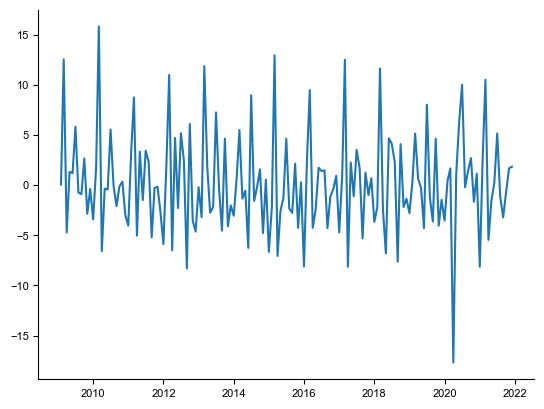

In [ ]:
test_col = 'indice_100_ibc_br'
# check stationarized
plt.subplot()
for column in [#f'{test_col}',
               f'd_{test_col}',
               #f'ln_{test_col}'
              ]:
    plt.plot(df_var[column])

### Hodrick Prescott filter

Stationarize using LOG DEVIATIONS FROM STATISTICAL TREND (as in Haddow, 2013) using Hodrick Prescott Filter

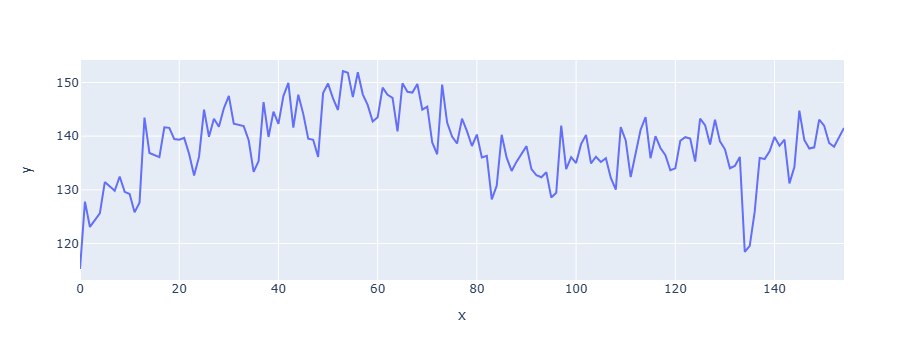

In [ ]:
# em nível
px.line(y = df_var['indice_100_ibc_br'])

In [ ]:
#px.histogram(x = df_var['ibc_br'])

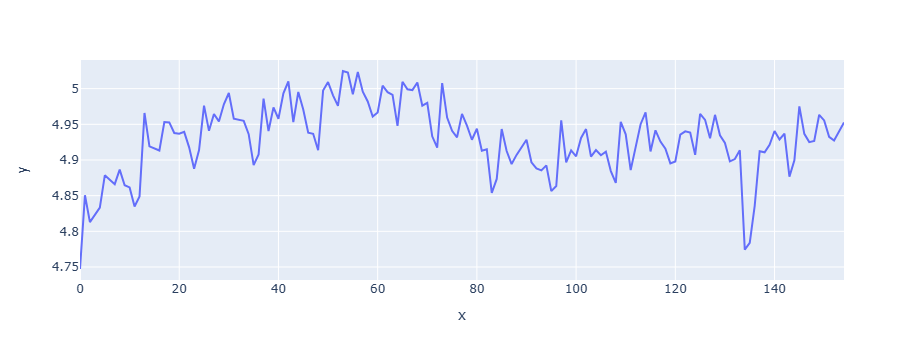

In [ ]:
# em log nível --> mantém estrutura, mas altera a escala
px.line(y = df_var['ln_indice_100_ibc_br'])

In [ ]:
#px.histogram(x = df_var['ln_ibc_br'])

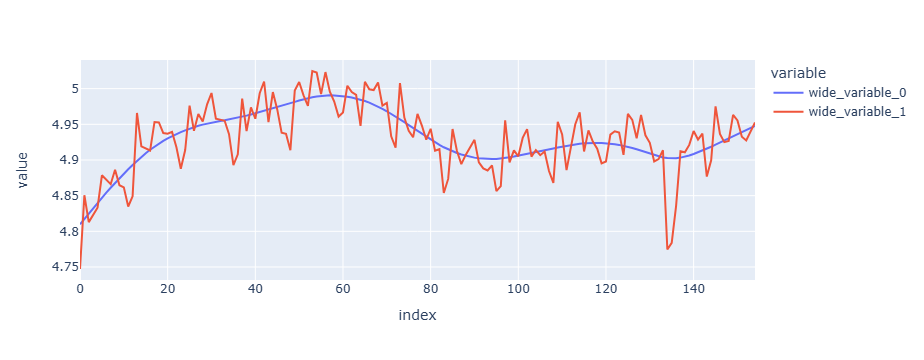

In [ ]:
cycle, trend = sm.tsa.filters.hpfilter(df_var['ln_indice_100_ibc_br'],
                                       lamb=1500) # lamb = 1 (serie original), qto maior, mais suave
px.line(y = [trend, df_var['ln_indice_100_ibc_br']])

In [ ]:
# hodrick-prescot ln detrended
df_var['hp_ln_dev_from_trend_ibc_br'] = df_var['ln_indice_100_ibc_br'] - trend

C:\Users\Lord-\AppData\Local\Temp\ipykernel_12332\4242251294.py:2: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



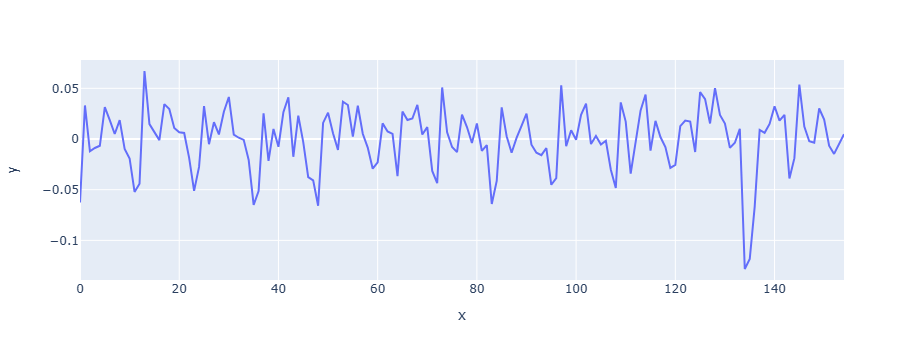

In [ ]:
px.line(y = df_var['hp_ln_dev_from_trend_ibc_br'])

For every one:
-



In [ ]:
for column in df.columns: # NO PROBLEM with DF columns, cols are the same
    cycle, trend = sm.tsa.filters.hpfilter(df_var[f'ln_{column}'],
                                           lamb=1500)
    df_var[f'hp_ln_trend_{column}'] = trend
    df_var[f'hp_ln_dev_from_trend_{column}'] = df_var[f'ln_{column}'] - trend

C:\Users\Lord-\AppData\Local\Temp\ipykernel_12332\2684443380.py:4: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Lord-\AppData\Local\Temp\ipykernel_12332\2684443380.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Lord-\AppData\Local\Temp\ipykernel_12332\2684443380.py:4: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented 

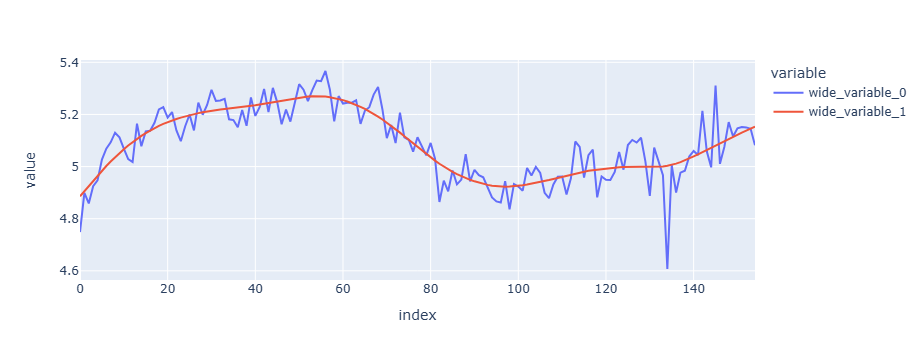

In [ ]:
# test
col = 'indice_100_indic_ipea_fbcf'
px.line(y = [df_var[f'ln_{col}'], df_var[f'hp_ln_trend_{col}']])

In [ ]:
dict_df = {}
for column in [col for col in df_var.columns if 'hp_ln_dev_from_trend' in col and 'sent' not in col]:
    dict_df[column] = []
    if df_var[column].isnull().any() == False and df_var[column].isin([np.inf, -np.inf]).any() == False: # executar apenas para colunas q não tenham nulos
        for reg_param in ['c', 'ct', 'n']: # regresion params 'constant', 'const & trend', 'none
            adf_test = adfuller(df_var[column], regression = reg_param, autolag='AIC')
            stat = round(adf_test[0], 2)
            p_value = round(adf_test[1], 2)
            stationarity = ['stationary' if round(adf_test[1],2) < 0.05 else 'NON-stationary']

            dict_df[column].append(stat)
            dict_df[column].append(p_value)
            dict_df[column].append(stationarity)
    else:
        pass

tab_stationarity = pd.DataFrame.from_dict(dict_df,
                                           orient='index',
                                           columns = ['stat_c',
                                                      'p-value_c',
                                                      'stationarity_c',
                                                     'stat_ct',
                                                      'p-value_ct',
                                                      'stationarity_ct',
                                                     'stat_n',
                                                      'p-value_n',
                                                      'stationarity_n'])

In [ ]:
tab_stationarity

stat_c  p-value_c  \
hp_ln_dev_from_trend_ibc_br                          -4.36        0.0   
hp_ln_dev_from_trend_prefix_media_prazo_dias         -6.33        0.0   
hp_ln_dev_from_trend_indice_100_icc                  -5.51        0.0   
hp_ln_dev_from_trend_indice_100_sond_servicos        -7.44        0.0   
hp_ln_dev_from_trend_indice_100_sond_servicos_d...   -7.19        0.0   
hp_ln_dev_from_trend_indice_100_industria_geral      -6.14        0.0   
hp_ln_dev_from_trend_indice_100_industrias_extr...   -6.57        0.0   
hp_ln_dev_from_trend_indice_100_industrias_tran...   -6.50        0.0   
hp_ln_dev_from_trend_tx_ipca                           NaN        NaN   
hp_ln_dev_from_trend_ipca_index                      -5.59        0.0   
hp_ln_dev_from_trend_tx_ipca_acum_12                 -4.26        0.0   
hp_ln_dev_from_trend_ptax                            -5.18        0.0   
hp_ln_dev_from_trend_estoque_emprego                 -3.99        0.0   
hp_ln_dev_from_trend_ibov_index                      -6.74        0.0   
hp_ln_dev_from_trend_indice_vix_mean_close           -5.73        0.0   
hp_ln_dev_from_trend_indice_embi_brasil              -5.87        0.0   
hp_ln_dev_from_trend_indice_100_indic_ipea_fbcf      -4.35        0.0   
hp_ln_dev_from_trend_indice_100_ibc_br               -4.36        0.0   
hp_ln_dev_from_trend_tx_prefix_media_juros           -5.44        0.0   
hp_ln_dev_from_trend_tx_selic_meta                   -7.28        0.0   
hp_ln_dev_from_trend_tx_expectativa_ipca_12          -5.11        0.0   
hp_ln_dev_from_trend_dessaz_indice_100_icc           -5.42        0.0   
hp_ln_dev_from_trend_dessaz_indice_100_sond_ser...   -6.69        0.0   
hp_ln_dev_from_trend_dessaz_indice_100_industri...   -6.07        0.0   
hp_ln_dev_from_trend_dessaz_indice_100_industri...   -6.47        0.0   
hp_ln_dev_from_trend_dessaz_indice_100_industri...   -6.41        0.0   
hp_ln_dev_from_trend_dessaz_tx_ipca                    NaN        NaN   
hp_ln_dev_from_trend_dessaz_ipca_index               -5.38        0.0   
hp_ln_dev_from_trend_dessaz_tx_ipca_acum_12          -5.87        0.0   
hp_ln_dev_from_trend_dessaz_ptax                     -5.05        0.0   
hp_ln_dev_from_trend_dessaz_estoque_emprego          -5.13        0.0   
hp_ln_dev_from_trend_dessaz_ibov_index               -6.50        0.0   
hp_ln_dev_from_trend_dessaz_indice_vix_mean_close    -5.90        0.0   
hp_ln_dev_from_trend_dessaz_indice_embi_brasil       -5.78        0.0   
hp_ln_dev_from_trend_dessaz_indice_100_indic_ip...   -6.49        0.0   
hp_ln_dev_from_trend_dessaz_indice_100_ibc_br        -6.48        0.0   
hp_ln_dev_from_trend_dessaz_tx_prefix_media_juros    -3.96        0.0   
hp_ln_dev_from_trend_dessaz_tx_selic_meta            -7.66        0.0   
hp_ln_dev_from_trend_dessaz_tx_expectativa_ipca_12   -3.83        0.0   
hp_ln_dev_from_trend_outclean_indice_100_sond_s...   -7.13        0.0   
hp_ln_dev_from_trend_outclean_dessaz_indice_100...   -5.42        0.0   
hp_ln_dev_from_trend_outclean_dessaz_indice_100...   -6.69        0.0   
hp_ln_dev_from_trend_outclean_dessaz_indice_100...   -5.98        0.0   
hp_ln_dev_from_trend_outclean_dessaz_indice_100...   -6.47        0.0   
hp_ln_dev_from_trend_outclean_dessaz_indice_100...   -6.11        0.0   
hp_ln_dev_from_trend_outclean_dessaz_tx_ipca           NaN        NaN   
hp_ln_dev_from_trend_outclean_dessaz_ipca_index      -5.38        0.0   
hp_ln_dev_from_trend_outclean_dessaz_tx_ipca_ac...   -5.87        0.0   
hp_ln_dev_from_trend_outclean_dessaz_ptax            -5.05        0.0   
hp_ln_dev_from_trend_outclean_dessaz_estoque_em...   -5.13        0.0   
hp_ln_dev_from_trend_outclean_dessaz_ibov_index      -6.50        0.0   
hp_ln_dev_from_trend_outclean_dessaz_indice_vix...   -5.96        0.0   
hp_ln_dev_from_trend_outclean_dessaz_indice_emb...   -5.75        0.0   
hp_ln_dev_from_trend_outclean_dessaz_indice_100...   -6.49        0.0   
hp_ln_dev_from_trend_outclean_dessaz_

## Estimation


Modelos com interpretações interessantes:

In [ ]:
from statsmodels.tsa.api import VAR

## Model 1 * (Baseline - nível)

Using Choleski decomposition

In [ ]:
SENTIMENT_COL = 'normalized_sentiment_agg_carosia_by_month_with_sentilex'
VAR_COLS = ['indice_vix_mean_close',
            f'{SENTIMENT_COL}',
           'tx_prefix_media_juros',
           'ibov_index',
           'ipca_index',
           'tx_selic_meta']

In [ ]:
data = df_var[VAR_COLS]
data = data.dropna()
model = VAR(data)
results = model.fit(maxlags=6, ic='aic')
results.is_stable() # verificar se resultados são estáveis mesmo sem ser estacionário

False

In [ ]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 20, Sep, 2024
Time:                     15:32:35
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -2.82506
Nobs:                     153.000    HQIC:                  -3.74241
Log likelihood:          -890.282    FPE:                  0.0126826
AIC:                     -4.36999    Det(Omega_mle):      0.00777516
--------------------------------------------------------------------
Results for equation indice_vix_mean_close
                                                                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------------------------------------------
const                                                              3.485800         5.642852            0.618       

### Residual Analysis

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

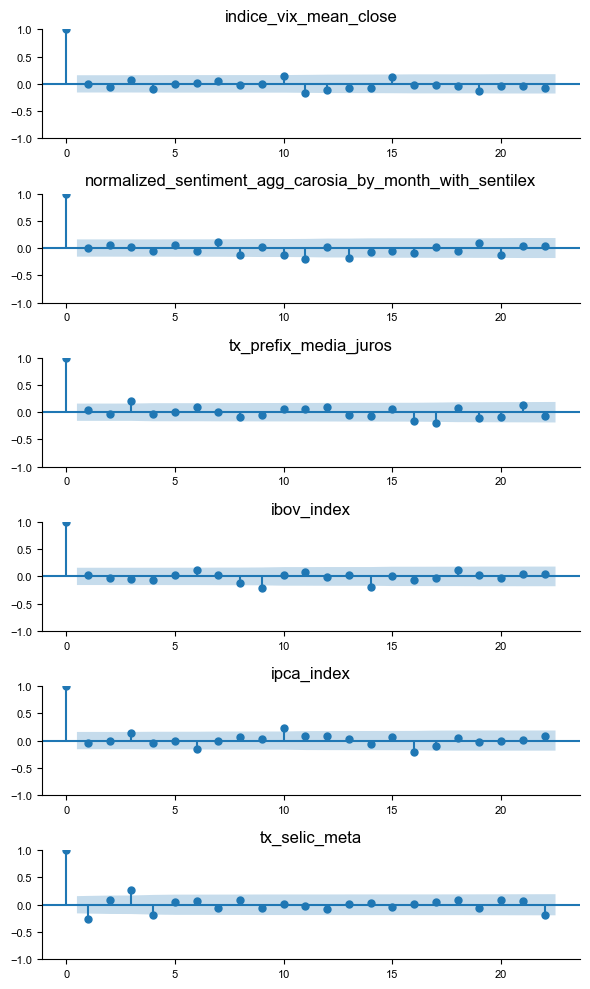

In [ ]:
# residuos de cada equação estão aparentemente branqueados --> sem autocorrelação
fig, ax = plt.subplots(len(data.columns),
                       figsize=(6,10))

for i, col in enumerate(results.resid.columns):
    plot_acf(results.resid[col], ax = ax[i])
    ax[i].set_title(f'{col}')
plt.tight_layout()

#### Pormanteau Testes
- ljung-box

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [ ]:
for col in results.resid.columns:
    lb_test = acorr_ljungbox(results.resid[col],
                             lags=4,  # default
                             return_df=True)
    print(col)
    print(lb_test)
    print('\n')
# alto p-valor não rejeitamos a hipótese nula de autocorrelações nulas

indice_vix_mean_close
    lb_stat  lb_pvalue
1  0.006659   0.934964
2  0.504813   0.776929
3  1.117237   0.772915
4  2.518513   0.641324


normalized_sentiment_agg_carosia_by_month_with_sentilex
    lb_stat  lb_pvalue
1  0.000570   0.980951
2  0.502659   0.777766
3  0.626237   0.890401
4  0.953668   0.916738


tx_prefix_media_juros
    lb_stat  lb_pvalue
1  0.230807   0.630926
2  0.450547   0.798298
3  7.373782   0.060892
4  7.635253   0.105891


ibov_index
    lb_stat  lb_pvalue
1  0.082406   0.774063
2  0.287312   0.866186
3  0.583455   0.900209
4  1.136774   0.888395


ipca_index
    lb_stat  lb_pvalue
1  0.217285   0.641116
2  0.223548   0.894246
3  3.545030   0.314969
4  3.879691   0.422533


tx_selic_meta
     lb_stat  lb_pvalue
1  10.821037   0.001004
2  12.110964   0.002345
3  23.407241   0.000033
4  29.479118   0.000006




#### Heterocedasticity

- H0: resíduos não possuem efeitos auto-correlacionados
- H1: resíduos são HOMOCEDASTICOS

https://www.statsmodels.org/dev/generated/statsmodels.stats.diagnostic.het_arch.html#statsmodels.stats.diagnostic.het_arch

In [ ]:
from statsmodels.stats.diagnostic import het_arch

In [ ]:
# output: lm-test, lm-pval, F-test, F-pval
for col in results.resid.columns:
    arch_p_val = round(het_arch(results.resid[col], nlags=8)[1],4)
    if arch_p_val < 0.05:
        print(f"{col}: p-value = {arch_p_val} --> resíduos possuem efeitos correlacionados")
    else:
        print(f"{col}: p-value = {arch_p_val}")

indice_vix_mean_close: p-value = 1.0
normalized_sentiment_agg_carosia_by_month_with_sentilex: p-value = 0.6903
tx_prefix_media_juros: p-value = 0.7948
ibov_index: p-value = 0.7927
ipca_index: p-value = 0.0171 --> resíduos possuem efeitos correlacionados
tx_selic_meta: p-value = 0.0036 --> resíduos possuem efeitos correlacionados


#### Autocorr

- teste LM - proposto por breusch-godfrey
- teste F - proposto por edgerton-shukur

Uma possível estratégia para lidar com autocorrelação é incluir mais defasagens (aumentar a ordem p do modelo), geralmente vai passar mais fácil nos testes, mas perde graus de liberdade.

In [ ]:
#from statsmodels.stats.diagnostic import acorr_breusch_godfrey
#acorr_breusch_godfrey(results[col], nlags=4)
# NÃO É POSSÍVEL: o teste só pode ser feito em RegressionResults e não em VARresults
# Se eu fizesse um OLS para cada equação aí seria possível

#### Normalidade

https://www.statsmodels.org/stable/generated/statsmodels.tsa.vector_ar.hypothesis_test_results.NormalityTestResults.html#statsmodels.tsa.vector_ar.hypothesis_test_results.NormalityTestResults



In [ ]:
from scipy.stats import norm

In [ ]:
VAR_COLS

['indice_vix_mean_close',
 'normalized_sentiment_agg_carosia_by_month_with_sentilex',
 'tx_prefix_media_juros',
 'ibov_index',
 'ipca_index',
 'tx_selic_meta']

Jarque-bera:

- H0: 3º e 4º momentos sao iguais aos da normal

In [ ]:
for col in results.resid.columns:
    jb_stats_p_val = round(sm.stats.stattools.jarque_bera(results.resid[col])[1], 4)
    if jb_stats_p_val < 0.05:
        print(f"{col}: p-value = {jb_stats_p_val} --> NÃO É NORMAL")
    else:
        print(f"{col}: p-value = {jb_stats_p_val}")
    #print('\n')

indice_vix_mean_close: p-value = 0.0 --> NÃO É NORMAL
normalized_sentiment_agg_carosia_by_month_with_sentilex: p-value = 0.0006 --> NÃO É NORMAL
tx_prefix_media_juros: p-value = 0.0 --> NÃO É NORMAL
ibov_index: p-value = 0.0 --> NÃO É NORMAL
ipca_index: p-value = 0.1855
tx_selic_meta: p-value = 0.0011 --> NÃO É NORMAL


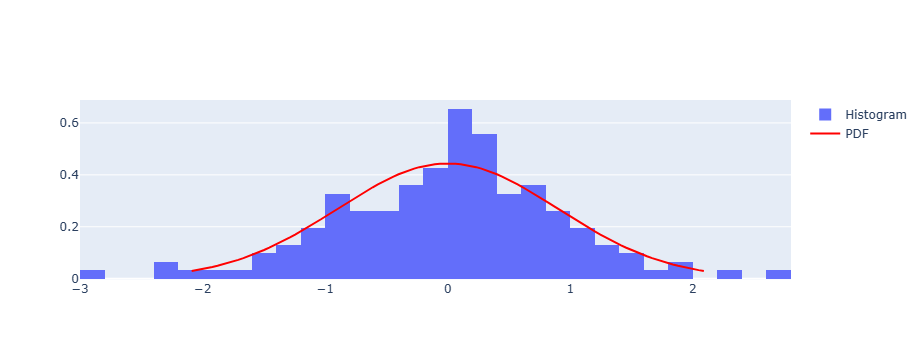

In [ ]:
# Checking Visually
COL = 'ipca_index'

mean = results.resid[COL].mean()
std = results.resid[COL].std()
normal_residuos = norm(loc = mean, scale = std)
X = np.linspace(normal_residuos.ppf(0.01), normal_residuos.ppf(0.99), 100)
Y = normal_residuos.pdf(X)

fig = go.Figure()
fig.add_traces(go.Histogram(x=results.resid[COL],
                            nbinsx=30,
                            histnorm='probability density',
                            name='Histogram'))
fig.add_traces(go.Scatter(x=X,
                          y=Y,
                          mode='lines',
                          line=dict(color='red'),
                          name='PDF'))

In [ ]:
# or a multivariate test --> testa todos os resíduos de uma vez?
# Results class for the Jarque-Bera-test for nonnormality.
results.test_normality(signif=0.05).summary()

<class 'statsmodels.iolib.table.SimpleTable'>

### Applications

#### Prediction

In [ ]:
lag_order = results.k_ar # retrieving the autoregressive order choosen by aic criterion
# forecast(): Produce linear minimum MSE forecasts for desired number of steps ahead, using prior values y
results.forecast(y = data.values[-lag_order:],
                 steps = 10)

array([[ 2.17127673e+01, -1.57068106e+00,  1.04051021e-01,
         1.02844261e+05,  3.87302166e+02,  9.58642615e-02],
       [ 2.21295350e+01, -1.76680563e+00,  1.04080044e-01,
         1.01142326e+05,  3.89609177e+02,  1.00513180e-01],
       [ 2.15286525e+01, -1.86194316e+00,  1.04095054e-01,
         1.00220260e+05,  3.91870668e+02,  1.03015397e-01],
       [ 2.07541995e+01, -1.89493684e+00,  1.03741475e-01,
         9.97204887e+04,  3.94102189e+02,  1.04019573e-01],
       [ 2.00025817e+01, -1.89215408e+00,  1.03003262e-01,
         9.94168262e+04,  3.96281909e+02,  1.03981955e-01],
       [ 1.93629525e+01, -1.87742423e+00,  1.01983137e-01,
         9.92197093e+04,  3.98402681e+02,  1.03215345e-01],
       [ 1.88300239e+01, -1.86145772e+00,  1.00764521e-01,
         9.91111018e+04,  4.00465876e+02,  1.01926645e-01],
       [ 1.83810559e+01, -1.84800741e+00,  9.94113849e-02,
         9.90930331e+04,  4.02478005e+02,  1.00256120e-01],
       [ 1.79944261e+01, -1.83770668e+00,  9.797

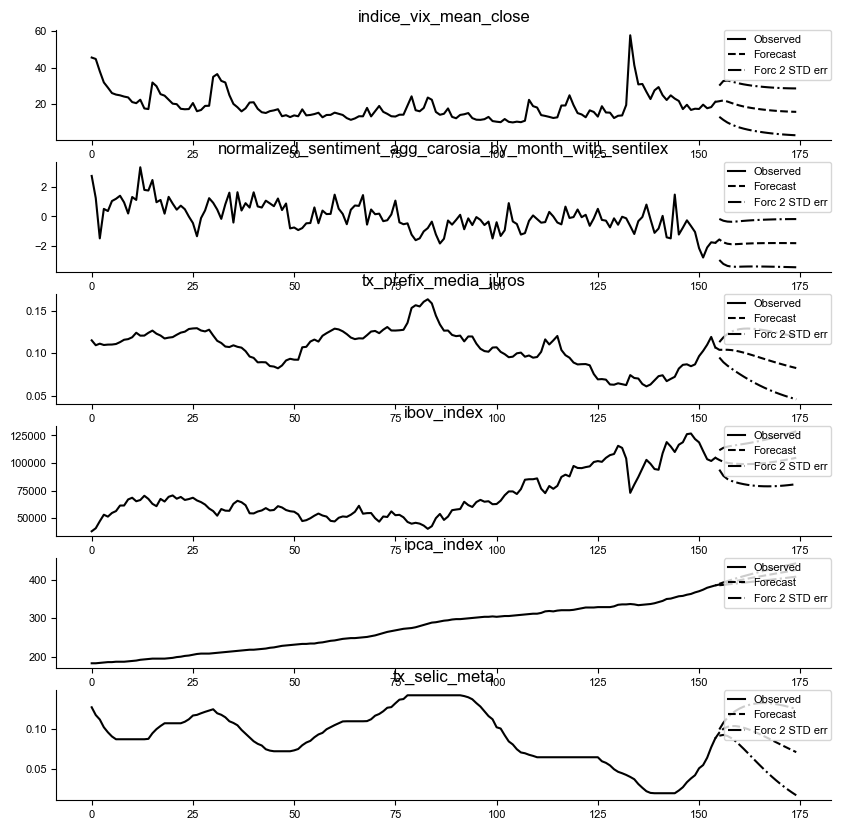

In [ ]:
results.plot_forecast(20)
plt.show()

Ao que parece previsão é uma questão de quão rápido os dados voltam para a média

Se eu quisesse fazer a previsão da variável original eu teria que inverter as transformações

#### Granger-causality

As variáveis do modelo possuem algum grau de causalidade entre si?

ATT: O TESTE ASSUME NORMALIDADE: por isso é geralmente é testado com VARResults

Algoritmo:
1. Rodar reg de Y sobre suas defasadas
2. Rodar outra reg de Y sobre suas defasadas + defasadas de X
3. aplicar teste F sobre as duas reg e ver s

- H0 - variável X NÃO granger-causa Y



Granger-Causality Tests:

https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.grangercausalitytests.html#statsmodels.tsa.stattools.grangercausalitytests

In [ ]:
max_lag = 6  # maximum number of lags to run teste

Y = 'tx_selic_meta' # X causa Y?
X = f'{SENTIMENT_COL}'

# The data for testing whether the time series in the second column...
# ... Granger causes the time series in the first column
gc_test = grangercausalitytests(df_var[[Y, X]].dropna(),
                                max_lag)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2446  , p=0.1362  , df_denom=151, df_num=1
ssr based chi2 test:   chi2=2.2892  , p=0.1303  , df=1
likelihood ratio test: chi2=2.2723  , p=0.1317  , df=1
parameter F test:         F=2.2446  , p=0.1362  , df_denom=151, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.9550  , p=0.0552  , df_denom=148, df_num=2
ssr based chi2 test:   chi2=6.1097  , p=0.0471  , df=2
likelihood ratio test: chi2=5.9909  , p=0.0500  , df=2
parameter F test:         F=2.9550  , p=0.0552  , df_denom=148, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.8356  , p=0.1433  , df_denom=145, df_num=3
ssr based chi2 test:   chi2=5.7725  , p=0.1232  , df=3
likelihood ratio test: chi2=5.6656  , p=0.1291  , df=3
parameter F test:         F=1.8356  , p=0.1433  , df_denom=145, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.3105  , p=0.2690  

In [ ]:
# Check the p-values
for lag in range(1, max_lag + 1):
    p_value = gc_test[lag][0][test][1]
    if p_value < 0.05:
        print(f"Lag {lag} p-value: {p_value} --> {X} grander-causa {Y}")
    else:
        print(f"Lag {lag} p-value: {p_value}")

Lag 1 p-value: 0.1302785242583574
Lag 2 p-value: 0.04712897631658948 --> normalized_sentiment_agg_carosia_by_month_with_sentilex grander-causa tx_selic_meta
Lag 3 p-value: 0.1232188280722501
Lag 4 p-value: 0.23329026306405276
Lag 5 p-value: 0.31748618217050145
Lag 6 p-value: 0.34878580788974267


Rodar todas contra todas e ver se alguém causa alguém.

#### Impulse-Response

Como choques de inovação (no termo de erro) afeta as demais.

orth = True: pede decomposição de Cholesky:
- identificar os coeficientes e ter uma magnitude dos choques que condiza com o modelo estrutural

A função equivale ao cumulative = False no R

https://www.statsmodels.org/dev/generated/statsmodels.tsa.vector_ar.var_model.VARResults.irf.html#statsmodels.tsa.vector_ar.var_model.VARResults.irf

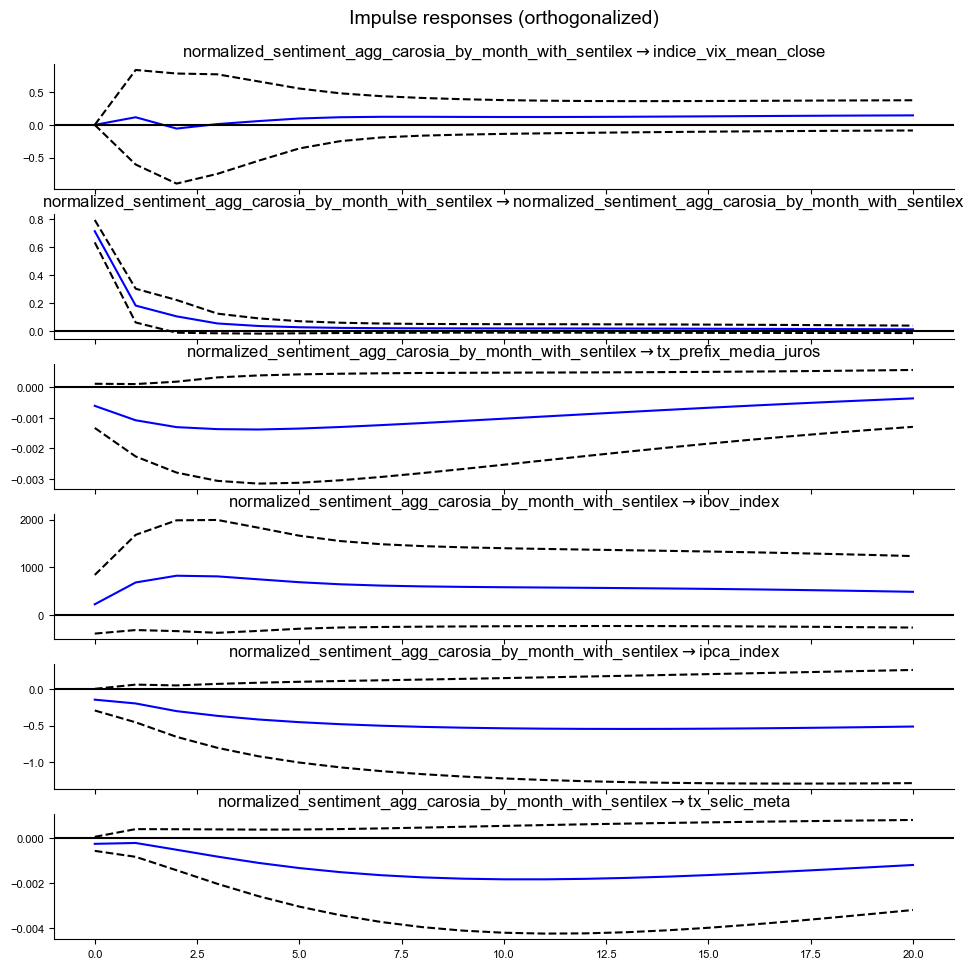

In [ ]:
irf = results.irf(20)
irf.plot(impulse=f'{SENTIMENT_COL}',
        # repare que ortogonal afeta apenas se há efeito comtemporaneo ou não de acordo com a ordem das variáveis
         orth=True)
plt.show()


Interpretação:
- O aumento de 1 desvio-padrão no erro do índice de sentimento causa:

PROBLEMA: se o ZERO estiver dentro do intervalo de confiança a variável não é estatisticamente significativa

In [ ]:
VAR_COLS

['indice_vix_mean_close',
 'normalized_sentiment_agg_carosia_by_month_with_sentilex',
 'tx_prefix_media_juros',
 'ibov_index',
 'ipca_index',
 'tx_selic_meta']

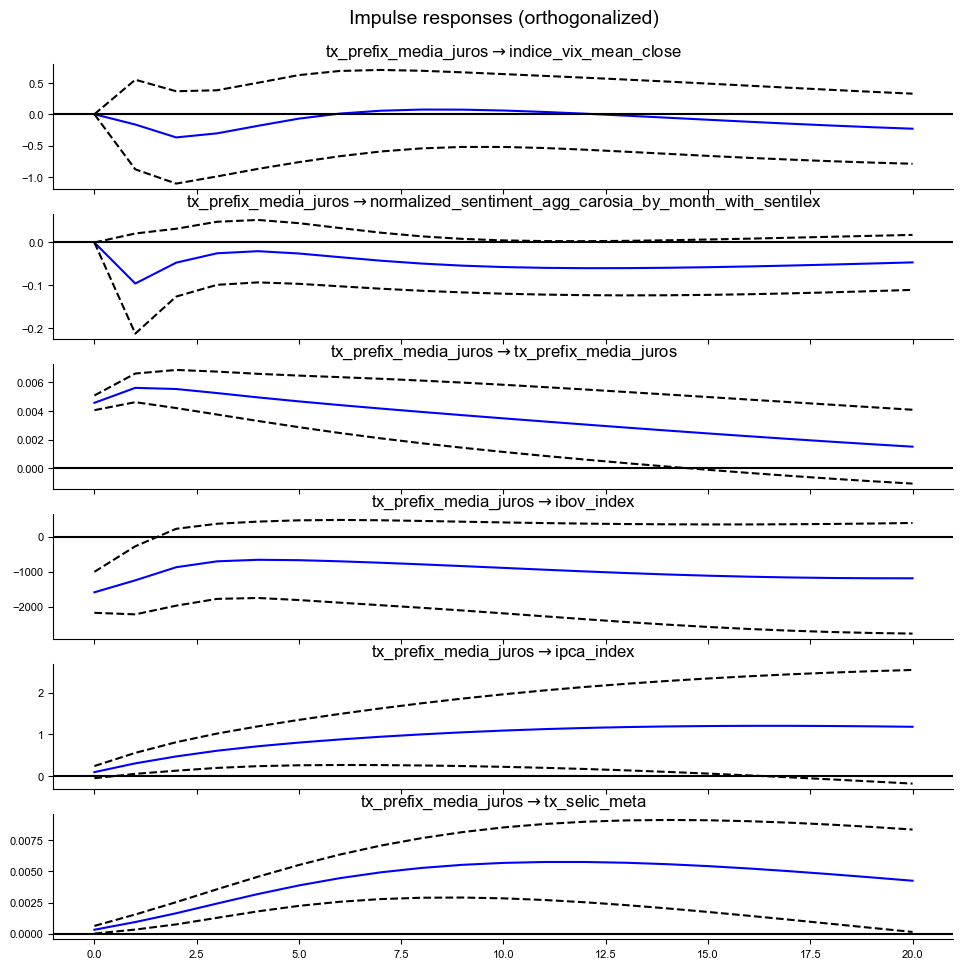

In [ ]:
irf = results.irf(20)
irf.plot(impulse='tx_prefix_media_juros',
         orth=True)
plt.show()

uma dos poucos impulsos que possui respostas significativas

#### FEVD (Forecast Error Variance Decomposition)

In [ ]:
fevd = results.fevd(8)
fevd.summary()
# após X períodos, qual a % de cada variável na explicação do erro de previsão da variavel

FEVD for indice_vix_mean_close
     indice_vix_mean_close  normalized_sentiment_agg_carosia_by_month_with_sentilex  tx_prefix_media_juros  ibov_index  ipca_index  tx_selic_meta
0                 1.000000                                                 0.000000               0.000000    0.000000    0.000000       0.000000
1                 0.972527                                                 0.000465               0.000912    0.017995    0.007845       0.000257
2                 0.962944                                                 0.000493               0.004769    0.016084    0.015175       0.000535
3                 0.953617                                                 0.000472               0.007095    0.017544    0.020636       0.000636
4                 0.942269                                                 0.000552               0.007838    0.024844    0.023877       0.000621
5                 0.930156                                                 0.000797          

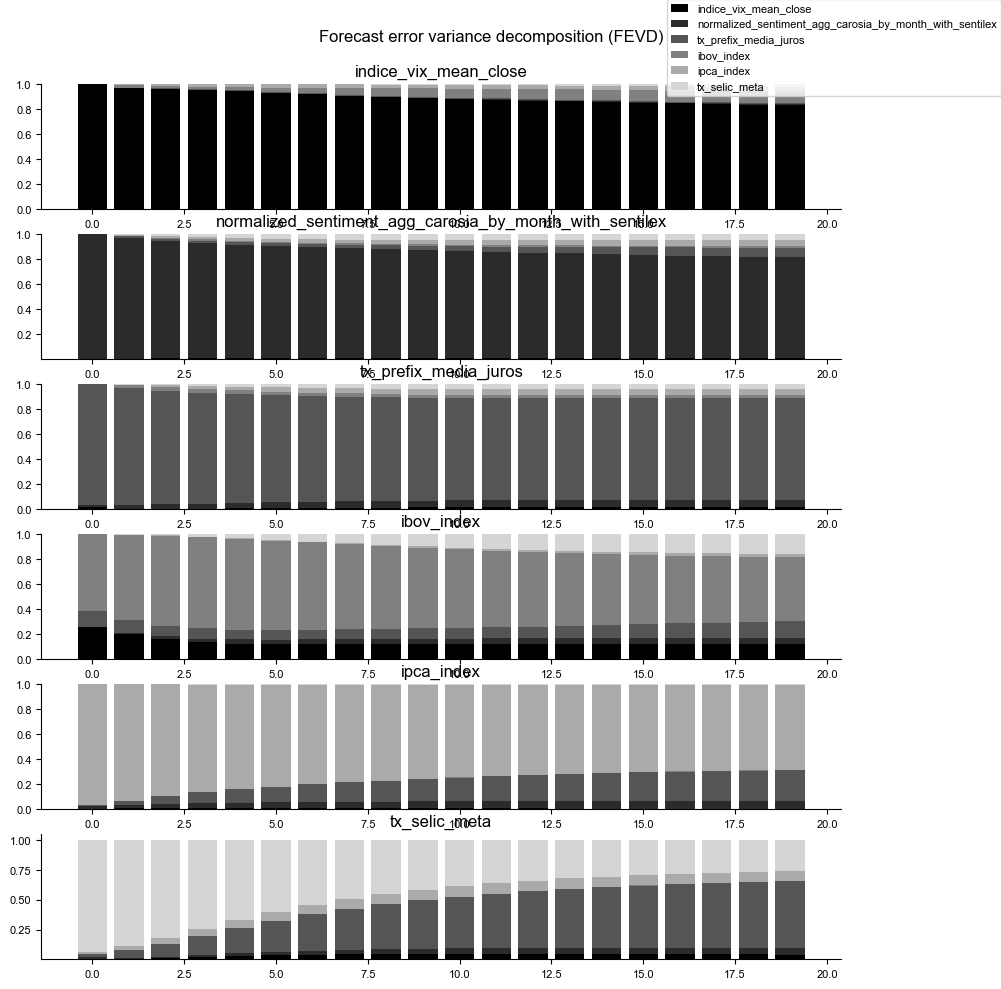

In [ ]:
results.fevd(20).plot()
plt.show()

Interpretação (MUDAR):

1. FEVD for ibov_index:
- contemporaneamente, o 25% da variação do ibov é explicada por variações no VIX
- o ibov é, em grande parte, explicado por ele mesmo (lembrar que a variável está em nível - espera-se isso)
- passado 10 períodos de tempo, ganha explicação no ibov os valores da selic meta e do ipca

2. Selic-meta
- contemporaneamente, a variação é quase que totalmente explicada por ela mesma.
- em 10 perídodos, as variações são explicadas quase 50% pelos juros longos

#### More on Impulse Response

A simple model just for consideration

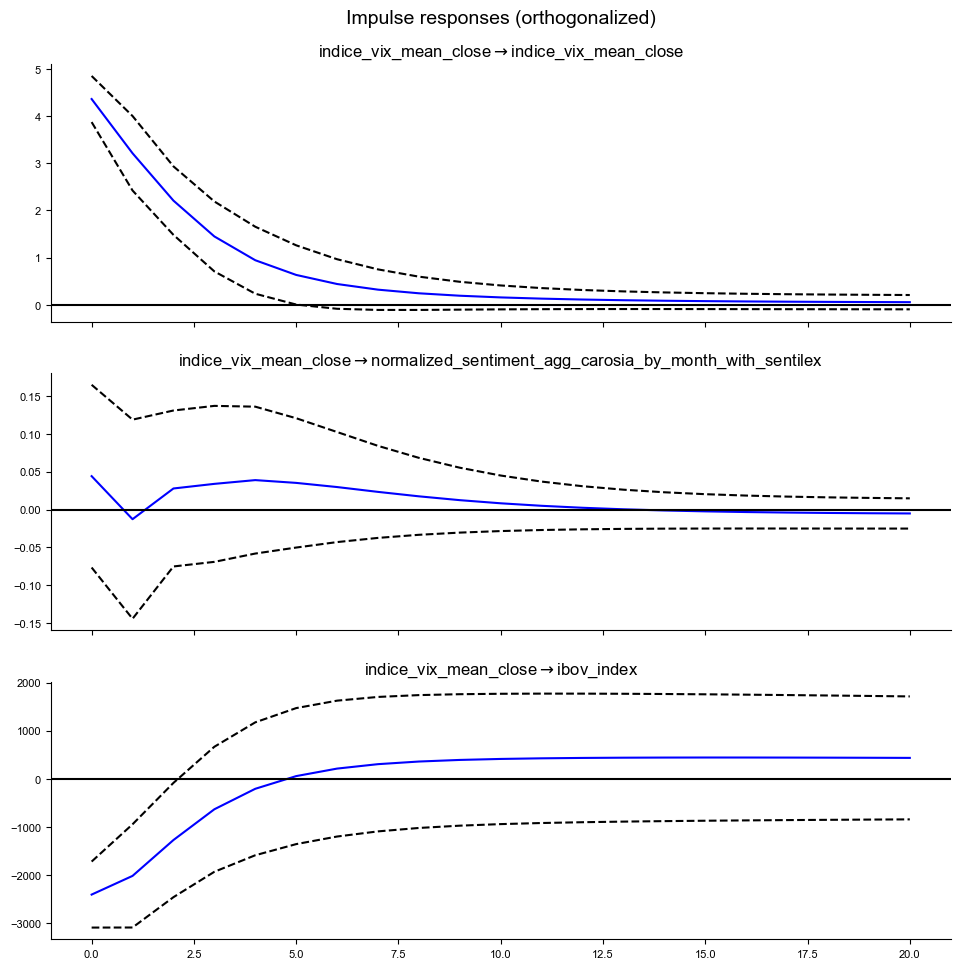

In [ ]:
transf = ''
data = df_var[[f'{transf}indice_vix_mean_close',
               f'{transf}{SENTIMENT_COL}',
               f'{transf}ibov_index']].dropna()
results = VAR(data).fit(maxlags=6, ic='aic').irf(20).plot(
    impulse=f'{transf}indice_vix_mean_close', orth=True)

In [ ]:
irf = VAR(data).fit(maxlags=6, ic='aic').irf(20)

In [ ]:
len(irf.H), len(irf.G) # seems dificult

(9, 20)

Segunda tentativa
-

In [ ]:
from statsmodels.tsa.vector_ar.irf import IRAnalysis

In [ ]:
results = VAR(data).fit(maxlags=6, ic='aic')

In [ ]:
irf = IRAnalysis(results)

In [ ]:
irf_values = irf.irfs

In [ ]:
irf_values[:, :, 0]

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.29002095e-01,  1.37381719e-04,  1.90673719e+02],
       [ 4.41739942e-01,  4.13843724e-03,  3.45851327e+02],
       [ 3.09810220e-01,  3.92902274e-03,  4.51976790e+02],
       [ 2.26844667e-01,  3.01671138e-03,  5.16063361e+02],
       [ 1.75253046e-01,  1.29476892e-03,  5.52844004e+02],
       [ 1.42544505e-01, -4.52880930e-04,  5.72902245e+02],
       [ 1.21177295e-01, -2.06671100e-03,  5.83228091e+02],
       [ 1.06616969e-01, -3.42442890e-03,  5.87894420e+02],
       [ 9.62852988e-02, -4.52303162e-03,  5.89233609e+02],
       [ 8.86820093e-02, -5.38444126e-03,  5.88550026e+02]])

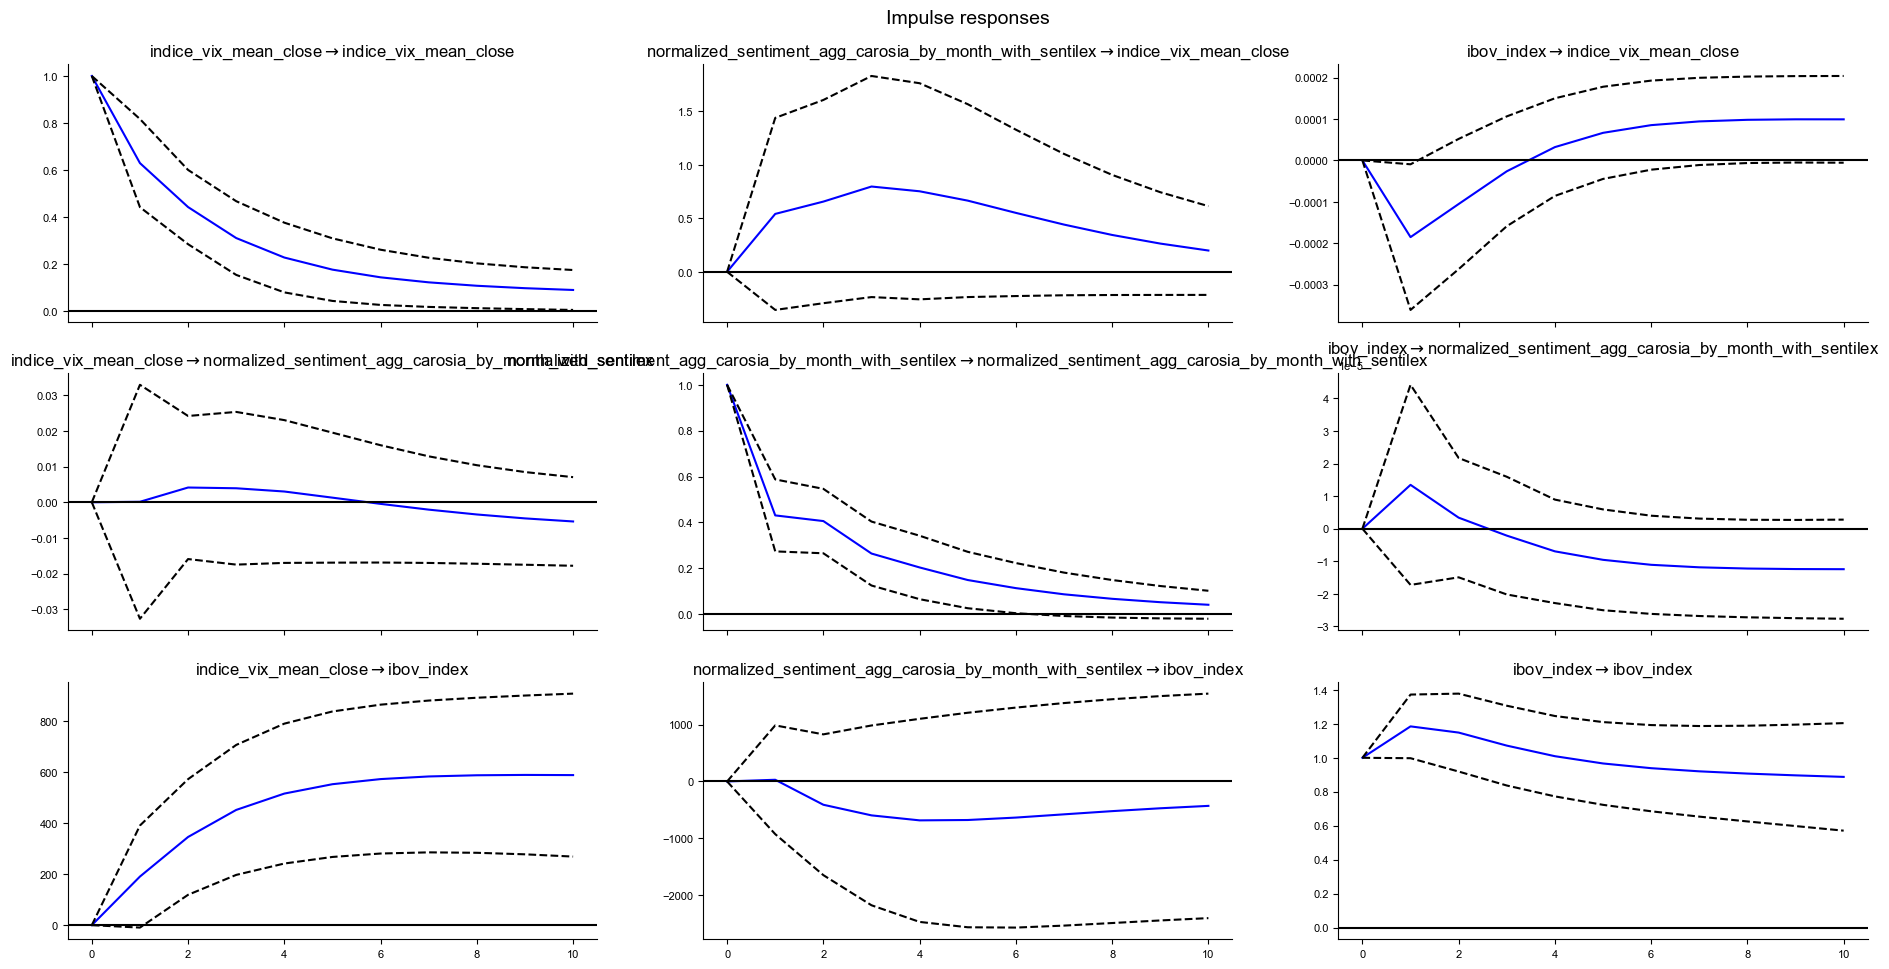

In [ ]:
irf.plot(figsize=(20, 10))
plt.show()

Terceira tentativa
-

In [ ]:
var_results = VAR(data).fit(maxlags=6, ic='aic')

In [ ]:
shock = -1*var_results.sigma_u # matriz de variancia e cov

In [ ]:
# This will give you the output of the irfs for T periods.
irf_ma_rep = var_results.ma_rep(20)

In [ ]:
J = (np.array(shock).diagonal())*np.array(irf_ma_rep)

In [ ]:
#J

In [ ]:
# recuperar os erros
G, H = var_results.irf_errband_mc(orth=False, repl=1000, steps=20, signif=0.05, seed=None, burn=100, cum=False)

Quarta tentativa
-
https://stackoverflow.com/questions/63806653/how-to-generate-the-actual-results-of-an-irf-function-in-python

In [ ]:
var_results = VAR(data).fit(maxlags=6, ic='aic')
irf = var_results.irf(10)

In [ ]:
irf = var_results.irf(10)

In [ ]:
#var_results.impulse_responses(10)

In [ ]:
len(irf.irfs), len(irf.cum_effects)

(11, 11)

In [ ]:
irf.cum_effects[1]

array([[ 1.62900209e+00,  5.41149181e-01, -1.85138521e-04],
       [ 1.37381719e-04,  1.43054931e+00,  1.34671290e-05],
       [ 1.90673719e+02,  2.98448463e+01,  2.18500765e+00]])

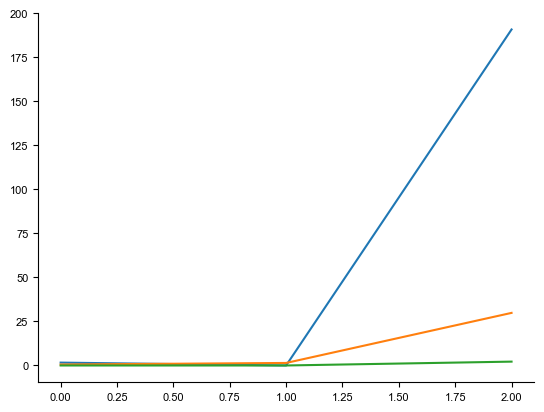

In [ ]:
plt.plot(irf.cum_effects[1])

Quinta tentativa:
-

In [ ]:
var_results = VAR(data).fit(maxlags=6, ic='aic')
irf = var_results.irf(10)

## Model 2 (Modelos internacionais)

Variáveis baseadas na literatura internacional que se utiliza de índices de sentimento

In [ ]:
# colunas disponíveis
[col for col in df.columns if 'sent' not in col]

['prefix_media_prazo_dias',
 'indice_100_icc',
 'indice_100_sond_servicos',
 'indice_100_sond_servicos_dessaz',
 'indice_100_industria_geral',
 'indice_100_industrias_extrativas',
 'indice_100_industrias_transformacao',
 'tx_ipca',
 'ipca_index',
 'tx_ipca_acum_12',
 'ptax',
 'estoque_emprego',
 'ibov_index',
 'indice_vix_mean_close',
 'indice_embi_brasil',
 'indice_100_indic_ipea_fbcf',
 'indice_100_ibc_br',
 'tx_prefix_media_juros',
 'tx_selic_meta',
 'tx_expectativa_ipca_12',
 'dessaz_indice_100_icc',
 'dessaz_indice_100_sond_servicos',
 'dessaz_indice_100_industria_geral',
 'dessaz_indice_100_industrias_extrativas',
 'dessaz_indice_100_industrias_transformacao',
 'dessaz_tx_ipca',
 'dessaz_ipca_index',
 'dessaz_tx_ipca_acum_12',
 'dessaz_ptax',
 'dessaz_estoque_emprego',
 'dessaz_ibov_index',
 'dessaz_indice_vix_mean_close',
 'dessaz_indice_embi_brasil',
 'dessaz_indice_100_indic_ipea_fbcf',
 'dessaz_indice_100_ibc_br',
 'dessaz_tx_prefix_media_juros',
 'dessaz_tx_selic_meta',
 'de

In [ ]:
SENTIMENT_COL # o que muda é ['carosia', picault'] e ['op', 'sentilex', 'lm', 'vader']

'normalized_sentiment_agg_carosia_by_month_with_sentilex'

### Variação 1:

Do mais exógeno para o mais endógeno:
1. VIX  é variável internacional, não é afetada temporalmente pelas demais
2. sentimento é afetado temporalmente apenas pelo vix
3. produção varia temporalmente com vix e sentimento, mas não é afetada temporalmente pelas demais
4. estoque de emprego varia temporalmente com a produção
5. ipca reage temporamente às variaveis de produção acima, mas não reage temporalmente às variáveis financeiras abaixo
Variáveis financeiras domésticas
6.  expectativa ipca variando de acordo com ipca e produção
7.  tx preficada variando de acordo com expect do ipca temporalmente, e demais
8.  ibov variando de acord com movimentos na taxa de longo prazo (tx de desconto)
9.  cambio variando temporalmente com todo mundo
10. exceto selic que reage à todas as demais. O banco central à tudo vê e à tudo responde via regra de taylor, mas também acessando "risco sistêmico"


Comentários sobre a ordem:
- faz sentido emprego num modelo que pretende relacionar variáveis financeiras?

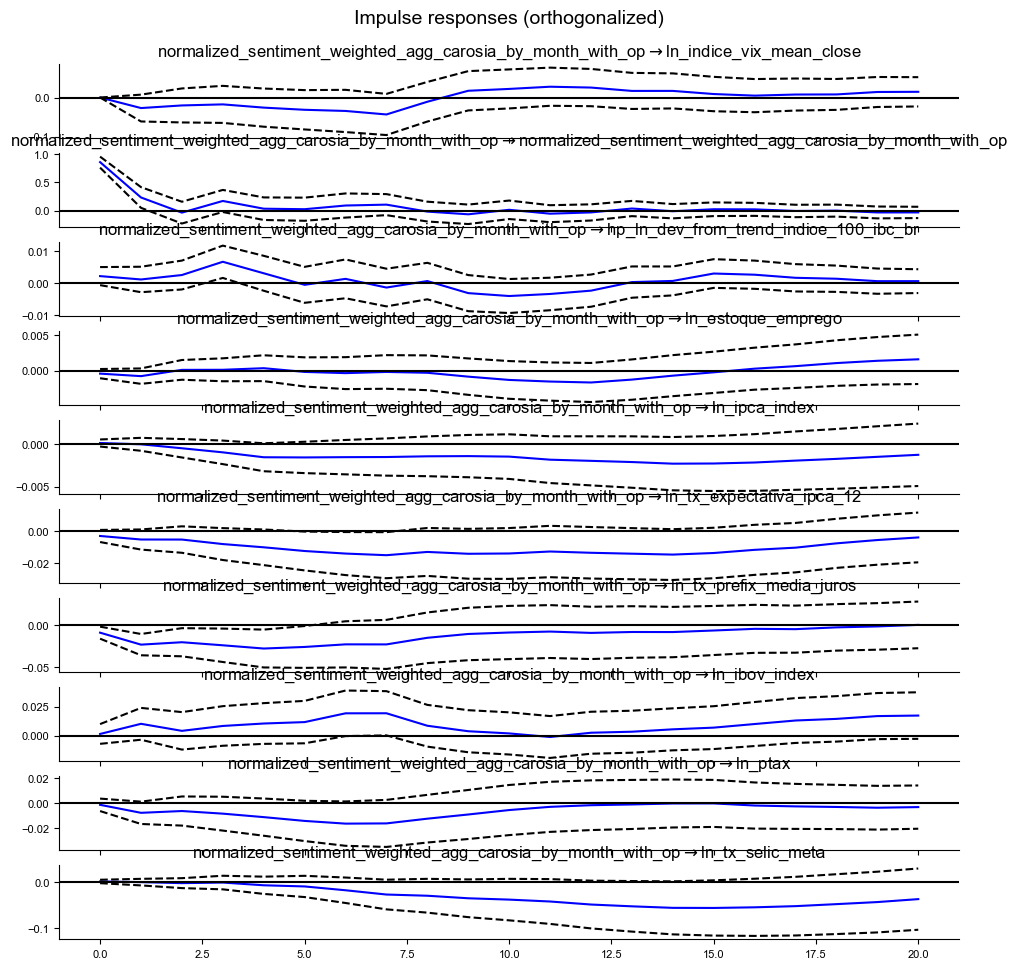

In [ ]:
# bom resultado
SENTIMENT_COL = 'normalized_sentiment_weighted_agg_carosia_by_month_with_op'
# transf: 'd_', 'ln_', 'hp_ln_dev_from_trend_'
data = df_var[['ln_indice_vix_mean_close',
               f'{SENTIMENT_COL}', # sentimento
               'hp_ln_dev_from_trend_indice_100_ibc_br',
               'ln_estoque_emprego',
               'ln_ipca_index', # 'ln_ipca_acum_12'
               'ln_tx_expectativa_ipca_12',
               'ln_tx_prefix_media_juros', # supondo que essa variável capte questoes relacionadas à divida/PIB
               'ln_ibov_index', # stock price index
               'ln_ptax',
               'ln_tx_selic_meta'
              ]].dropna()
results = VAR(data).fit(maxlags=6, ic='aic').irf(20).plot(
    impulse=f'{SENTIMENT_COL}', orth=True)

### Variação 2: var1 ajust IPCA (melhor modelo)

#### *Choque Sentimento

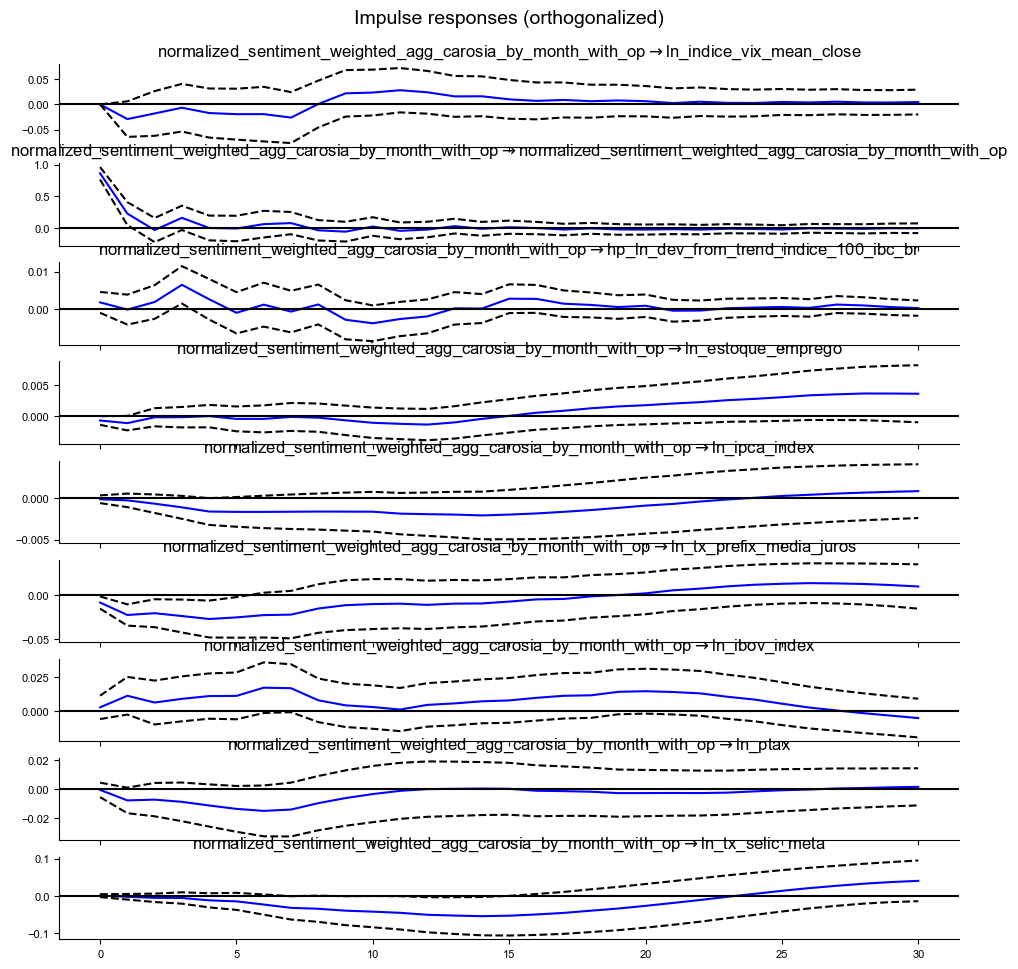

In [ ]:
# dif var5: sem expectativa do ipca --> mais significancia dos impactos
SENTIMENT_COL = 'normalized_sentiment_weighted_agg_carosia_by_month_with_op'
# transf: 'd_', 'ln_', 'hp_ln_dev_from_trend_'
data = df_var[['ln_indice_vix_mean_close',
               f'{SENTIMENT_COL}', # sentimento
               'hp_ln_dev_from_trend_indice_100_ibc_br',
               'ln_estoque_emprego',
               'ln_ipca_index', # 'ln_tx_ipca_acum_12'
               'ln_tx_prefix_media_juros', # supondo que essa variável capte questoes relacionadas à divida/PIB
               'ln_ibov_index', # stock price index
               'ln_ptax',
               'ln_tx_selic_meta'
              ]].dropna()
results = VAR(data).fit(maxlags=6, ic='aic').irf(30).plot(
    impulse=f'{SENTIMENT_COL}', orth=True)

#### *Choque VIX

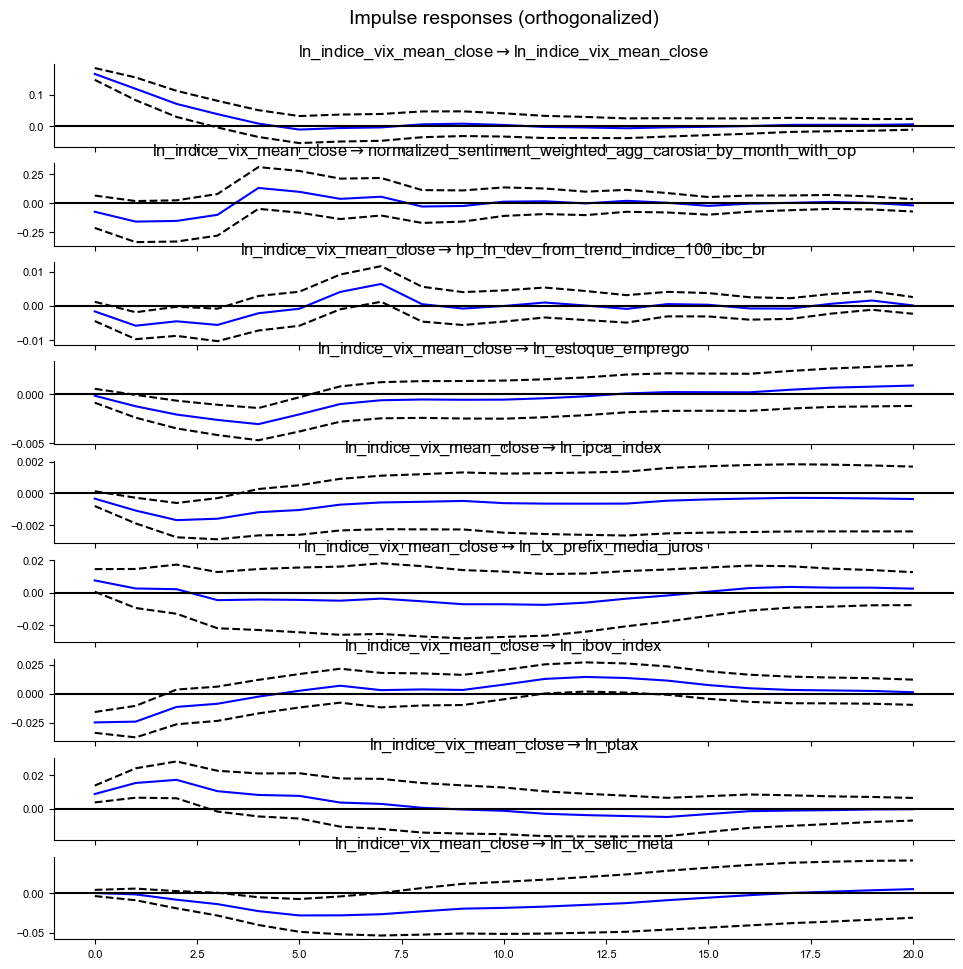

In [ ]:
results = VAR(data).fit(maxlags=6, ic='aic').irf(20).plot(
    impulse=f'ln_indice_vix_mean_close', orth=True)

#### *Choque Inflação

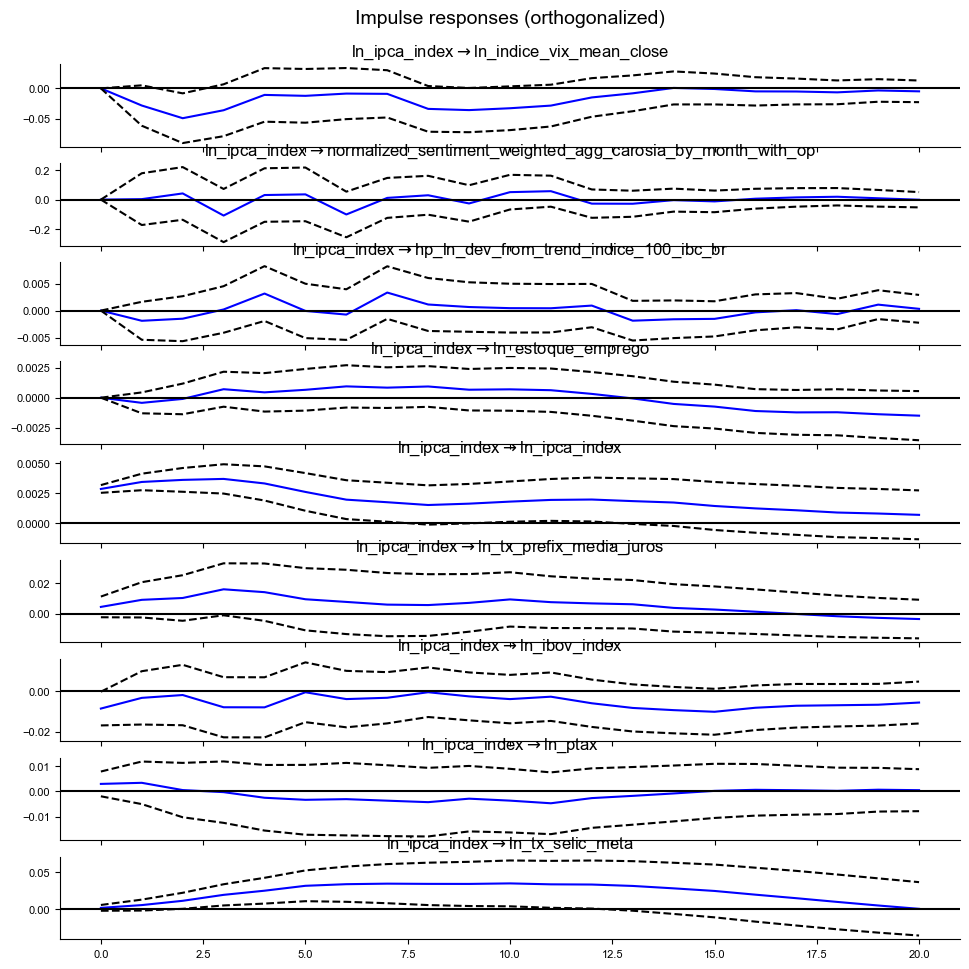

In [ ]:
results = VAR(data).fit(maxlags=6, ic='aic').irf(20).plot(
    impulse=f'ln_ipca_index', orth=True)

#### *Choque Juros

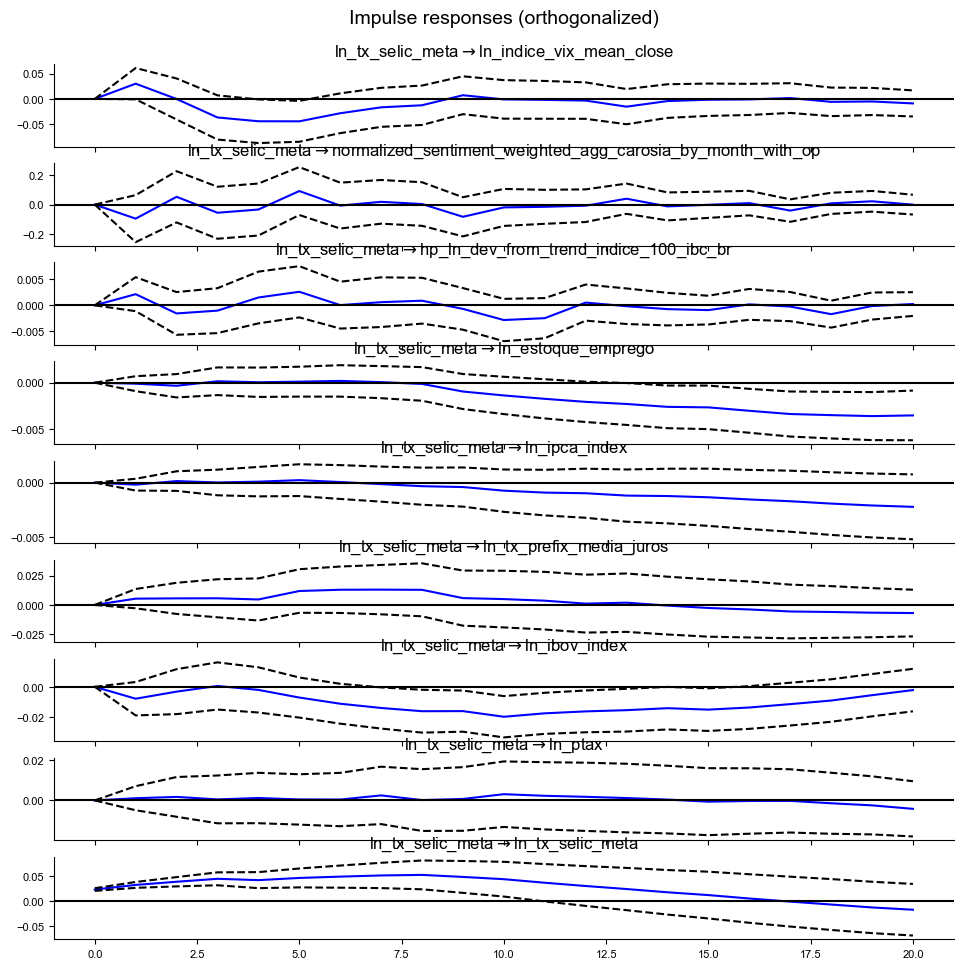

In [ ]:
results = VAR(data).fit(maxlags=6, ic='aic').irf(20).plot(
    impulse=f'ln_tx_selic_meta', orth=True)

### Variação 3: var2 com ajust produção

#### Choque Sentimento

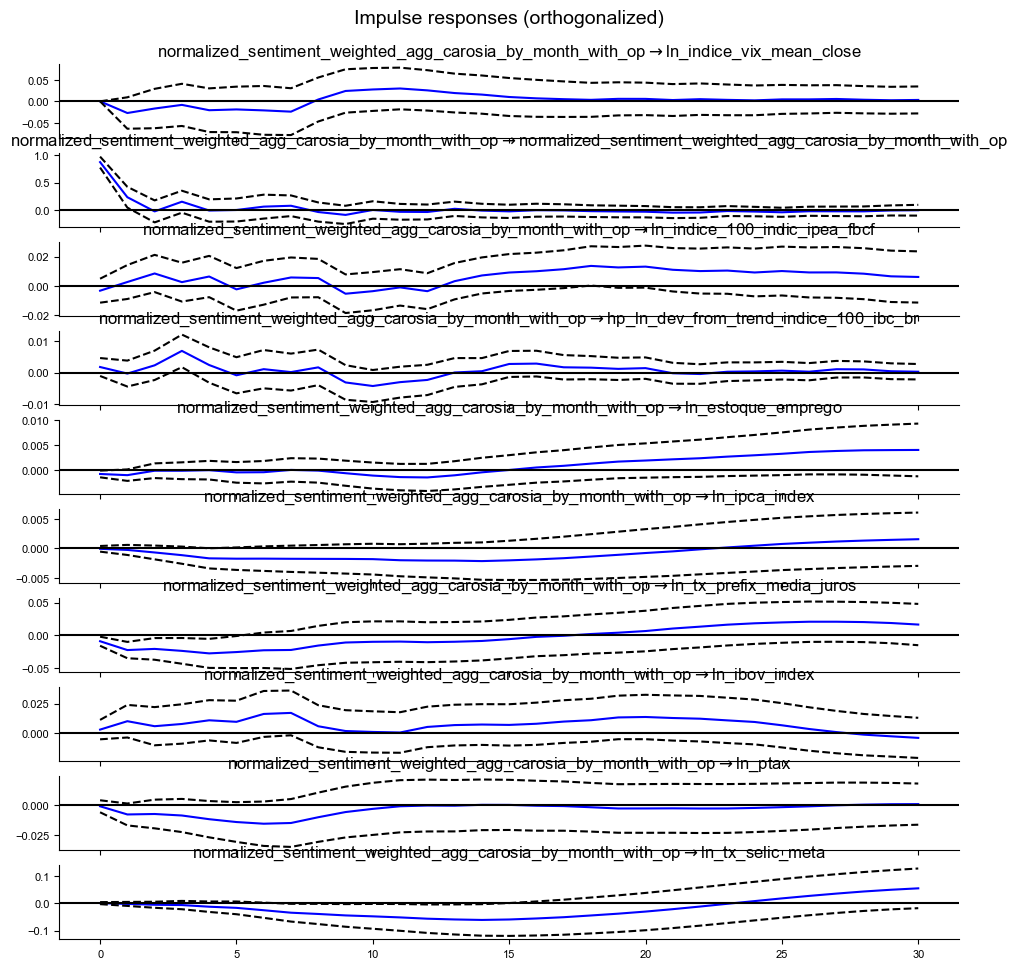

In [ ]:
SENTIMENT_COL = 'normalized_sentiment_weighted_agg_carosia_by_month_with_op'
# transf: 'd_', 'ln_', 'hp_ln_dev_from_trend_'
data = df_var[['ln_indice_vix_mean_close',
               f'{SENTIMENT_COL}',
           # bloco variáveis reais
               # robusto à: indice_100_industrias_transformacao, indice_100_indic_ipea_fbcf,
               # indice_100_industria_geral
               'ln_indice_100_indic_ipea_fbcf',
               'hp_ln_dev_from_trend_indice_100_ibc_br',
               'ln_estoque_emprego',
               'ln_ipca_index',
           # bloco variáveis financeiras
               'ln_tx_prefix_media_juros', # supondo que essa variável capte questoes relacionadas à divida/PIB
               'ln_ibov_index',
               'ln_ptax', # duvidas da posição do cambio na ordem!
               'ln_tx_selic_meta'
              ]].dropna()
results = VAR(data).fit(maxlags=6, ic='aic').irf(30).plot(
    impulse=f'{SENTIMENT_COL}', orth=True)

#### *Choque VIX

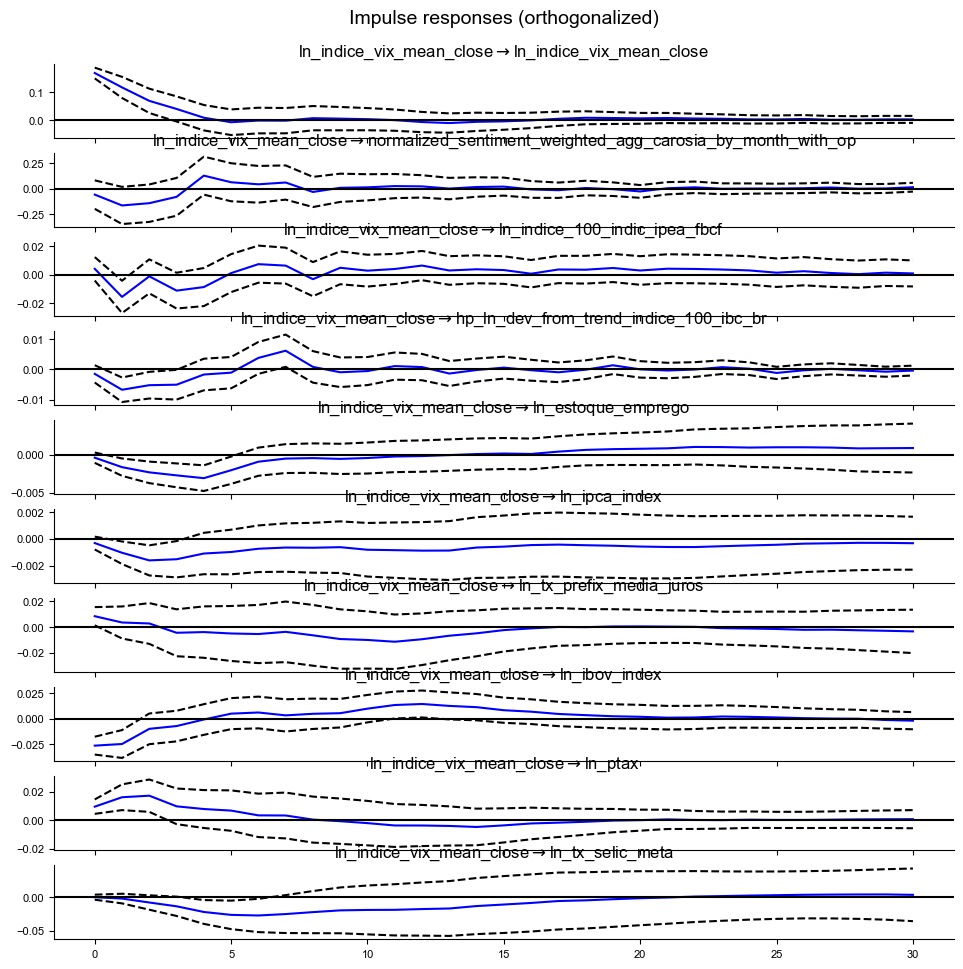

In [ ]:
results = VAR(data).fit(maxlags=6, ic='aic').irf(30).plot(
    impulse=f'ln_indice_vix_mean_close', orth=True)

#### *Choque Inflação

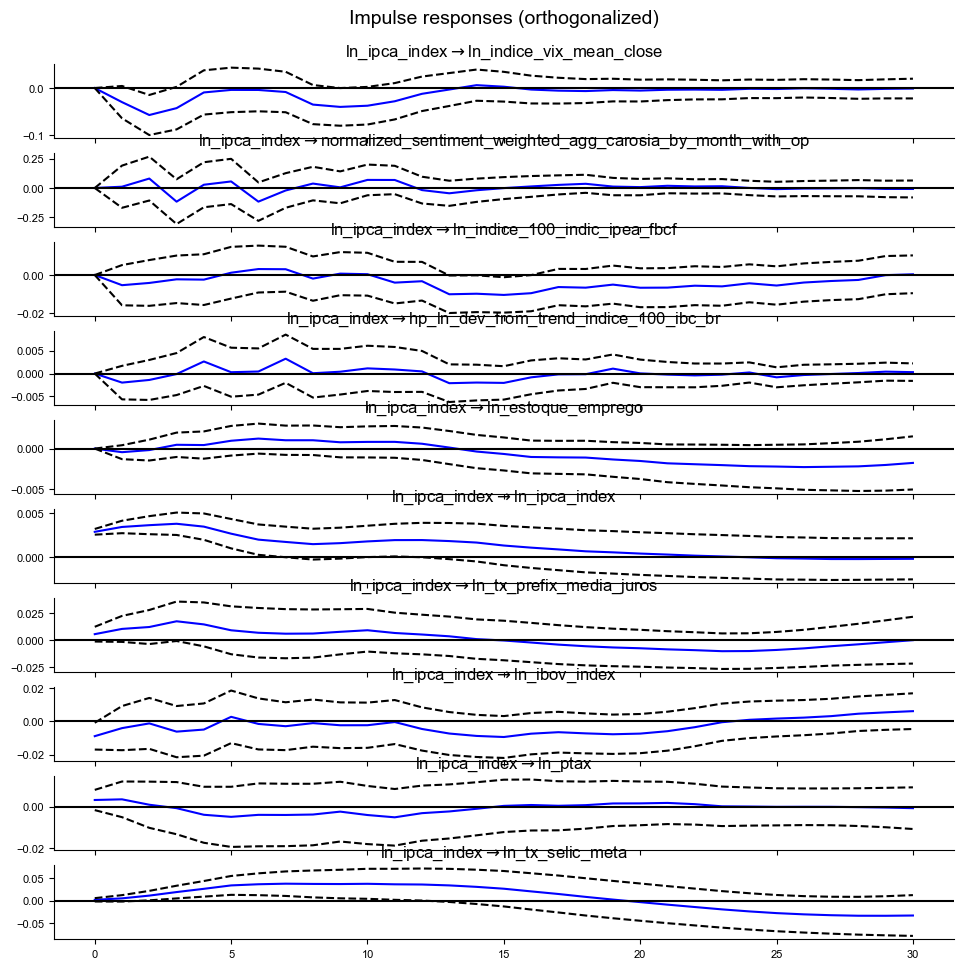

In [ ]:
results = VAR(data).fit(maxlags=6, ic='aic').irf(30).plot(
    impulse=f'ln_ipca_index', orth=True)

#### Choque Juros

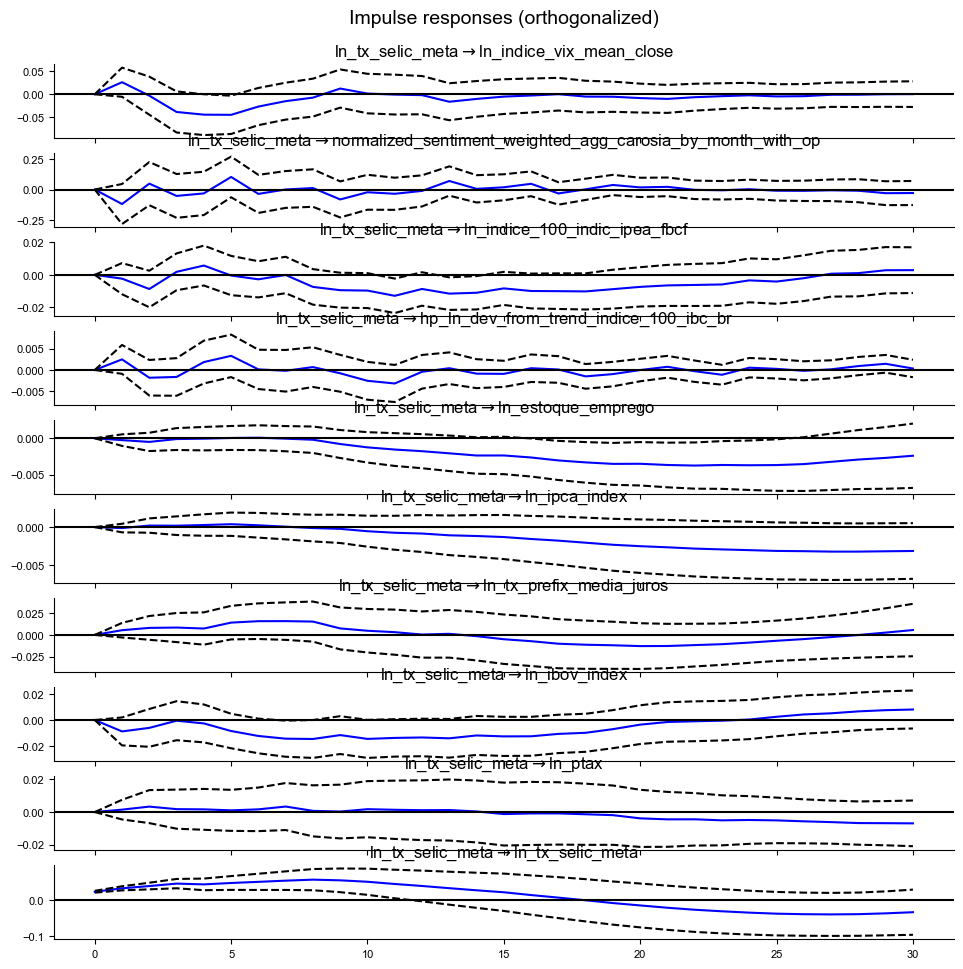

In [ ]:
results = VAR(data).fit(maxlags=6, ic='aic').irf(30).plot(
    impulse=f'ln_tx_selic_meta', orth=True)

### **Variação 4: var3 dessaz

#### **Choque Sentimento

C:\Users\Lord-\AppData\Local\Temp\ipykernel_12332\3572275315.py:24: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



Lags: 4 and stability: True


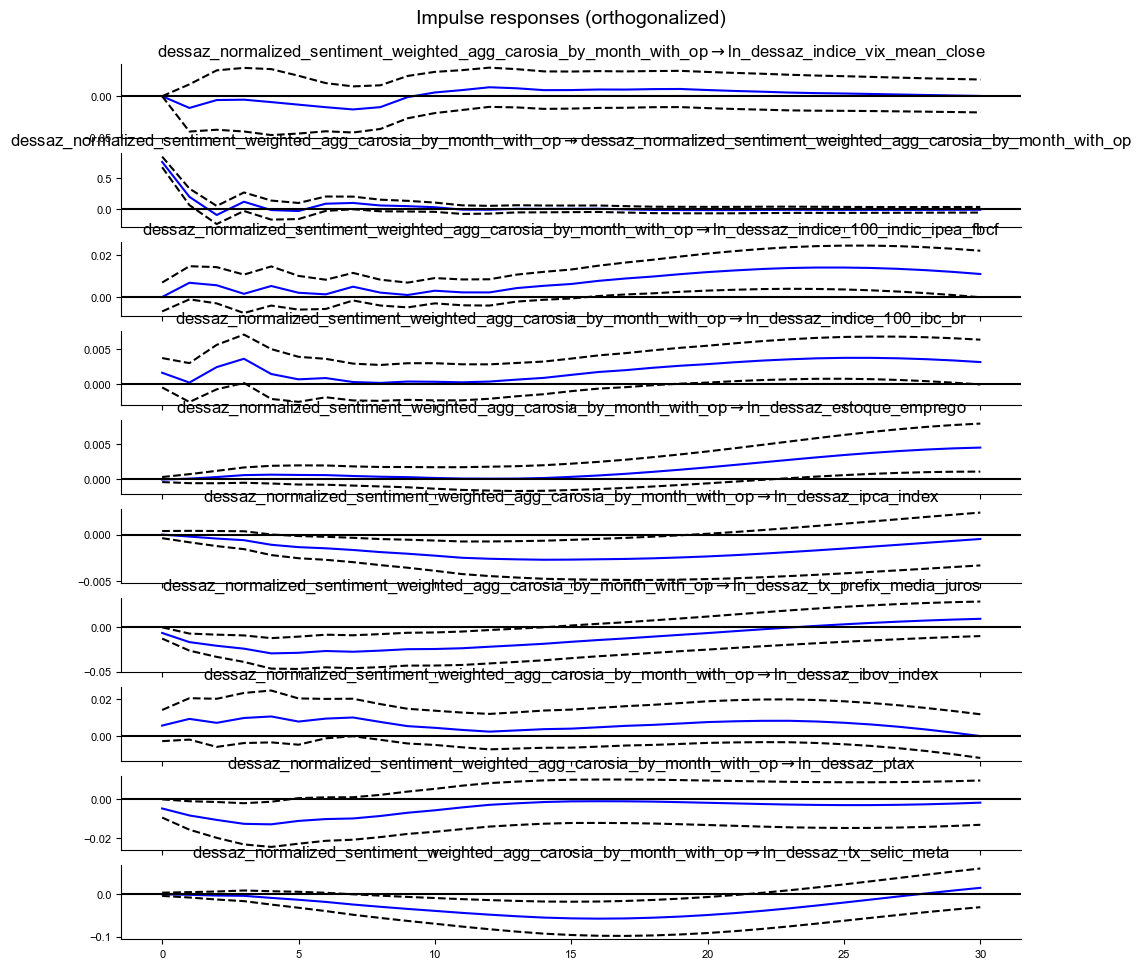

In [ ]:
# choosen model --> 4 lags
SENTIMENT_COL = 'dessaz_normalized_sentiment_weighted_agg_carosia_by_month_with_op'
#SENTIMENT_COL = 'dessaz_normalized_sentiment_agg_carosia_by_month_with_op'
#SENTIMENT_COL = 'dessaz_normalized_sentiment_weighted_agg_carosia_by_month_with_op'
#SENTIMENT_COL = 'dessaz_normalized_sentiment_weighted_agg_carosia_by_month_with_op'
# transf: 'd_', 'ln_', 'hp_ln_dev_from_trend_'
data = df_var[['ln_dessaz_indice_vix_mean_close',
               f'{SENTIMENT_COL}',
           # bloco variáveis reais
               # robusto à: indice_100_industrias_transformacao, indice_100_indic_ipea_fbcf,
               # ...indice_100_industria_geral
               'ln_dessaz_indice_100_indic_ipea_fbcf',
               'ln_dessaz_indice_100_ibc_br', # rubosto à ln e com ou sem ibc_br
               'ln_dessaz_estoque_emprego',
               'ln_dessaz_ipca_index',
           # bloco variáveis financeiras
               'ln_dessaz_tx_prefix_media_juros', # supondo que essa variável capte questoes relacionadas à divida/PIB
               'ln_dessaz_ibov_index',
               'ln_dessaz_ptax',
               'ln_dessaz_tx_selic_meta'
              ]].dropna()
results = VAR(data).fit(maxlags=6, ic='aic')
results.irf(30).plot(
    impulse=f'{SENTIMENT_COL}', orth=True).show()
print(f'Lags: {results.k_ar} and stability: {results.is_stable()}')

#### **Vix Exóg

Resultados semelhantes, mas modelo com 1 lag só

C:\Users\Lord-\AppData\Local\Temp\ipykernel_12332\3725476782.py:25: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



Lags: 4 and stability: True


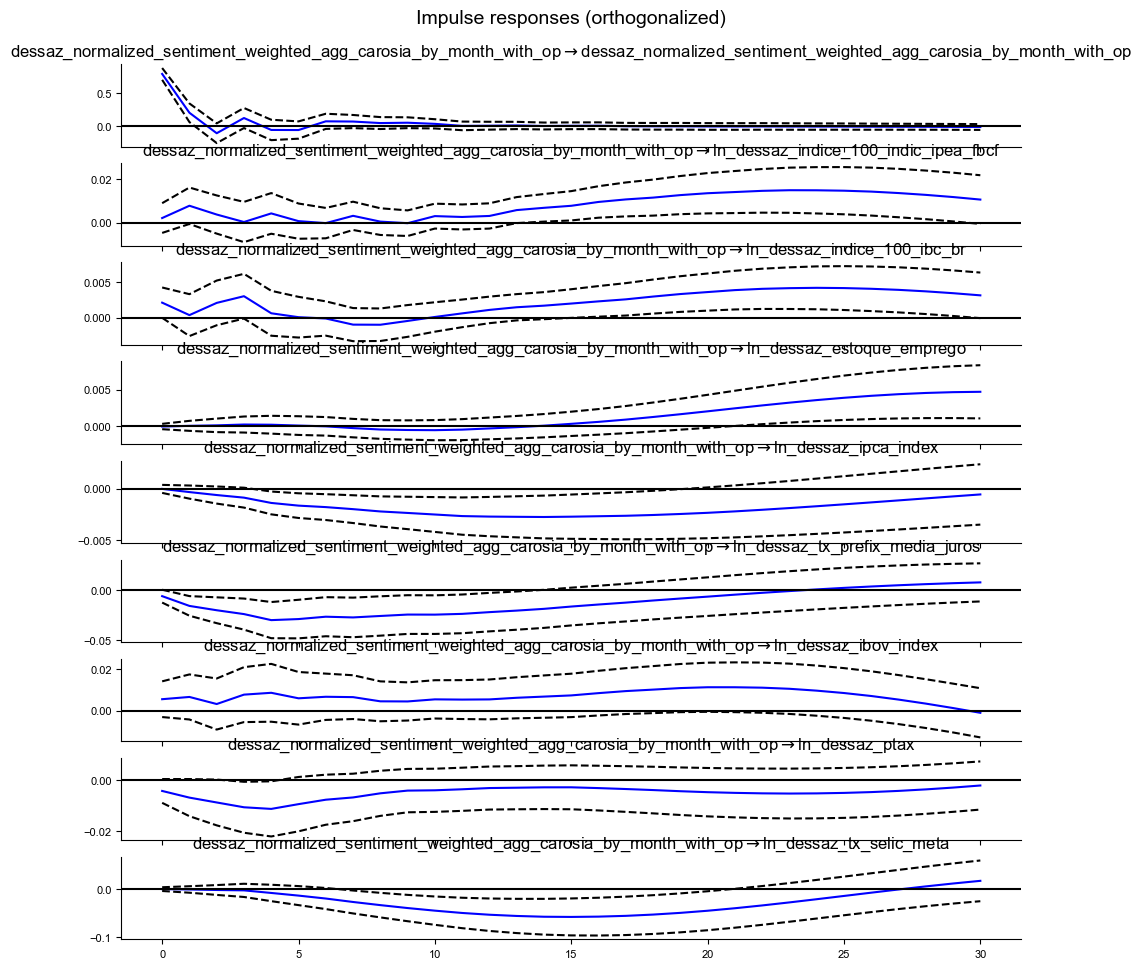

In [ ]:
# choosen model --> 4 lags
SENTIMENT_COL = 'dessaz_normalized_sentiment_weighted_agg_carosia_by_month_with_op'
#SENTIMENT_COL = 'dessaz_normalized_sentiment_agg_carosia_by_month_with_op'
#SENTIMENT_COL = 'dessaz_normalized_sentiment_weighted_agg_carosia_by_month_with_op'
#SENTIMENT_COL = 'dessaz_normalized_sentiment_weighted_agg_carosia_by_month_with_op'
# transf: 'd_', 'ln_', 'hp_ln_dev_from_trend_'
data = df_var[[#'ln_dessaz_indice_vix_mean_close',
               f'{SENTIMENT_COL}',
           # bloco variáveis reais
               # robusto à: indice_100_industrias_transformacao, indice_100_indic_ipea_fbcf,
               # ...indice_100_industria_geral
               'ln_dessaz_indice_100_indic_ipea_fbcf',
               'ln_dessaz_indice_100_ibc_br', # rubosto à ln e com ou sem ibc_br
               'ln_dessaz_estoque_emprego',
               'ln_dessaz_ipca_index',
           # bloco variáveis financeiras
               'ln_dessaz_tx_prefix_media_juros', # supondo que essa variável capte questoes relacionadas à divida/PIB
               'ln_dessaz_ibov_index',
               'ln_dessaz_ptax',
               'ln_dessaz_tx_selic_meta'
              ]].dropna()
results = VAR(endog = data, exog = df_var['ln_dessaz_indice_vix_mean_close']
             ).fit(maxlags=6, ic='aic')
results.irf(30).plot(
    impulse=f'{SENTIMENT_COL}', orth=True).show()
print(f'Lags: {results.k_ar} and stability: {results.is_stable()}')

In [ ]:
data.columns

Index(['dessaz_normalized_sentiment_weighted_agg_carosia_by_month_with_op',
       'ln_dessaz_indice_100_indic_ipea_fbcf', 'ln_dessaz_indice_100_ibc_br',
       'ln_dessaz_estoque_emprego', 'ln_dessaz_ipca_index',
       'ln_dessaz_tx_prefix_media_juros', 'ln_dessaz_ibov_index',
       'ln_dessaz_ptax', 'ln_dessaz_tx_selic_meta'],
      dtype='object')

#### *Choque VIX

In [ ]:
results.irf(30).plot(
    impulse=f'ln_dessaz_indice_vix_mean_close', orth=True).show()

ValueError: 'ln_dessaz_indice_vix_mean_close' is not in list

#### *Choque Inflação

In [ ]:
results.irf(30).plot(
    impulse=f'ln_dessaz_ipca_index', orth=True).show()

#### *Choque Juros

In [ ]:
results.irf(30).plot(
    impulse=f'ln_dessaz_tx_selic_meta', orth=True).show()

### Variação 5: var4 outclean

- se for outclean em todos diminui um pouco a significancia

In [ ]:
# choosen model
SENTIMENT_COL = 'outclean_dessaz_normalized_sentiment_weighted_agg_carosia_by_month_with_op'
#SENTIMENT_COL = 'sent_pca'
# transf: 'd_', 'ln_', 'hp_ln_dev_from_trend_'
data = df_var[['ln_dessaz_indice_vix_mean_close',
               f'{SENTIMENT_COL}',
           # bloco variáveis reais
               # robusto à: indice_100_industrias_transformacao, indice_100_indic_ipea_fbcf,
               # ...indice_100_industria_geral
               'ln_dessaz_indice_100_indic_ipea_fbcf',
               'ln_dessaz_indice_100_ibc_br', # rubosto à ln e com ou sem ibc_br
               'ln_dessaz_estoque_emprego',
               'ln_dessaz_ipca_index',
           # bloco variáveis financeiras
               'ln_dessaz_tx_prefix_media_juros', # supondo que essa variável capte questoes relacionadas à divida/PIB
               'ln_dessaz_ibov_index',
               'ln_dessaz_ptax',
               'ln_dessaz_tx_selic_meta'
              ]].dropna()
results = VAR(data).fit(maxlags=6, ic='aic')
results.irf(30).plot(
    impulse=f'{SENTIMENT_COL}', orth=True)
print(f'Lags: {results.k_ar} and stability: {results.is_stable()}')

### Variação 6: differenças

- terrível

In [ ]:
SENTIMENT_COL = 'd_dessaz_normalized_sentiment_weighted_agg_carosia_by_month_with_op'
# transf: 'd_', 'ln_', 'hp_ln_dev_from_trend_'
data = df_var[['d_dessaz_indice_vix_mean_close',
               f'{SENTIMENT_COL}',
           # bloco variáveis reais
               # robusto à: indice_100_industrias_transformacao, indice_100_indic_ipea_fbcf,
               # indice_100_industria_geral
               'd_dessaz_indice_100_indic_ipea_fbcf',
               'd_dessaz_indice_100_ibc_br',
               'd_dessaz_estoque_emprego',
               'd_dessaz_ipca_index',
           # bloco variáveis financeiras
               'd_dessaz_tx_prefix_media_juros', # supondo que essa variável capte questoes relacionadas à divida/PIB
               'd_dessaz_ibov_index',
               'd_dessaz_ptax',
               'd_dessaz_tx_selic_meta'
              ]].dropna()
results = VAR(data).fit(maxlags=6, ic='aic')
results.irf(30).plot(
    impulse=f'{SENTIMENT_COL}', orth=True)
print(f'Lags: {results.k_ar} and stability: {results.is_stable()}')

### Variação 7: var4 sem autocorr (baseline)

Possibilites:
- ln --> sentiment
- filter more outliers
- add trend to var not only constant
- testar com sentilex

In [ ]:
SENTIMENT_COL = 'dessaz_normalized_sentiment_weighted_agg_carosia_by_month_with_op'

In [ ]:
df_var['c_' + SENTIMENT_COL] = df_var[SENTIMENT_COL] + np.abs(df_var[SENTIMENT_COL].min()*1.1 # evitar zero
                                                             )

In [ ]:
df_var['c_' + SENTIMENT_COL].describe()

In [ ]:
df_var['ln_' + 'c_' + SENTIMENT_COL] = np.log(df_var['c_' + SENTIMENT_COL])

In [ ]:
# choosen model
SENTIMENT_COL = 'outclean_dessaz_normalized_sentiment_weighted_agg_carosia_by_month_with_op'
# transf: 'd_', 'ln_', 'hp_ln_dev_from_trend_', outclean_
data = df_var[[f'ln_dessaz_indice_vix_mean_close',
               f'{SENTIMENT_COL}',
           # bloco variáveis reais
               # robusto à: indice_100_industrias_transformacao, indice_100_indic_ipea_fbcf,
               # ...indice_100_industria_geral
               f'ln_dessaz_indice_100_indic_ipea_fbcf',
               f'ln_dessaz_indice_100_ibc_br', # rubosto à ln e com ou sem ibc_br
               f'ln_dessaz_estoque_emprego',
               f'ln_dessaz_ipca_index', #
           # bloco variáveis financeiras
               f'ln_dessaz_tx_prefix_media_juros', # supondo que essa variável capte questoes relacionadas à divida/PIB
               f'ln_dessaz_ibov_index',
               f'ln_dessaz_ptax',
               f'ln_dessaz_tx_selic_meta'
              ]].dropna()
results = VAR(data).fit(#4 # more lags tends to solve normality but deminishes significance
                        maxlags=5,
                        ic='aic',
                        trend = 'c' # c, ct, ctt, n
                        )
results.irf(30).plot(
    impulse=f'{SENTIMENT_COL}', orth=True).show()
print(f'Lags: {results.k_ar} and stability: {results.is_stable()}')

In [ ]:
for col in results.resid.columns:
    jb_stats_p_val = round(sm.stats.stattools.jarque_bera(results.resid[col])[1], 4)
    if jb_stats_p_val < 0.05:
        print(f"{col}: p-value = {jb_stats_p_val} --> Resíduos da eq. NÃO É NORMAL")
    else:
        print(f"{col}: p-value = {jb_stats_p_val}")

### **Variação 8: var4 changing orders

In [ ]:
[col for col in df.columns if 'sent' not in col and 'outclean' in col]

In [ ]:
# choosen model
SENTIMENT_COL = 'dessaz_normalized_sentiment_weighted_agg_carosia_by_month_with_op'
# transf: 'd_', 'ln_', 'hp_ln_dev_from_trend_', outclean_
data = df_var[[# Bloco - endógeno
               f'ln_dessaz_indice_vix_mean_close',
               f'ln_dessaz_ptax',
               f'{SENTIMENT_COL}',
               f'ln_dessaz_tx_selic_meta',
           # bloco variáveis reais
               # robusto à: indice_100_industrias_transformacao, indice_100_indic_ipea_fbcf,
               # ...indice_100_industria_geral
               f'ln_dessaz_indice_100_indic_ipea_fbcf',
               f'ln_dessaz_indice_100_ibc_br', # rubosto à ln e com ou sem ibc_br
               f'ln_dessaz_estoque_emprego',
               f'ln_dessaz_ipca_index',
           # bloco variáveis financeiras
               f'ln_dessaz_tx_prefix_media_juros', # supondo que essa variável capte questoes relacionadas à divida/PIB
               f'ln_dessaz_ibov_index',
              ]].dropna()
results = VAR(data).fit(maxlags=6,
                        ic='aic',
                        trend = 'c'
                        )
results.irf(30).plot(
    impulse=f'{SENTIMENT_COL}', orth=True).show()
print(f'Lags: {results.k_ar} and stability: {results.is_stable()}')

In [ ]:
for col in results.resid.columns:
    jb_stats_p_val = round(sm.stats.stattools.jarque_bera(results.resid[col])[1], 4)
    if jb_stats_p_val < 0.05:
        print(f"{col}: p-value = {jb_stats_p_val} --> Resíduos da eq. NÃO É NORMAL")
    else:
        print(f"{col}: p-value = {jb_stats_p_val}")

In [ ]:
data.columns

### Variação 9: var4 changing lags

In [ ]:
# choosen model
SENTIMENT_COL = 'dessaz_normalized_sentiment_weighted_agg_carosia_by_month_with_op'
# transf: 'd_', 'ln_', 'hp_ln_dev_from_trend_', outclean_
data = df_var[[# Bloco - endógeno
               f'ln_dessaz_indice_vix_mean_close',
               f'ln_dessaz_ptax',
               f'{SENTIMENT_COL}',
               f'ln_dessaz_tx_selic_meta',
           # bloco variáveis reais
               # robusto à: indice_100_industrias_transformacao, indice_100_indic_ipea_fbcf,
               # ...indice_100_industria_geral
               f'ln_dessaz_indice_100_indic_ipea_fbcf',
               f'ln_dessaz_indice_100_ibc_br', # rubosto à ln e com ou sem ibc_br
               f'ln_dessaz_estoque_emprego',
               f'ln_dessaz_ipca_index',
           # bloco variáveis financeiras
               f'ln_dessaz_tx_prefix_media_juros', # supondo que essa variável capte questoes relacionadas à divida/PIB
               f'ln_dessaz_ibov_index',
              ]].dropna()
results = VAR(data).fit(7,
                        #maxlags=12,
                        #ic='aic',
                        trend = 'ct'
                        )
results.irf(30).plot(
    impulse=f'{SENTIMENT_COL}', orth=True).show()
print(f'Lags: {results.k_ar} and stability: {results.is_stable()}')

In [ ]:
for col in results.resid.columns:
    jb_stats_p_val = round(sm.stats.stattools.jarque_bera(results.resid[col])[1], 4)
    if jb_stats_p_val < 0.05:
        print(f"{col}: p-value = {jb_stats_p_val} --> Resíduos da eq. NÃO É NORMAL")
    else:
        print(f"{col}: p-value = {jb_stats_p_val}")

### variação 10: one algo to rule them all

In [ ]:
# import itertools
# all_columns = [f'ln_dessaz_indice_vix_mean_close',
#                f'dessaz_normalized_sentiment_weighted_agg_carosia_by_month_with_op',
#                f'ln_dessaz_indice_100_indic_ipea_fbcf',
#                f'ln_dessaz_indice_100_ibc_br',
#                f'ln_dessaz_estoque_emprego',
#                f'ln_dessaz_ipca_index',
#                f'ln_dessaz_tx_prefix_media_juros',
#                f'ln_dessaz_ibov_index',
#                f'ln_dessaz_ptax',
#                f'ln_dessaz_tx_selic_meta']

# r = 3 # tem que ter no minimo 3
# column_combinations = itertools.combinations(all_columns, r)
# combinations = [comb for comb in column_combinations]
# len(combinations)
# # Create a list of all column names
# #all_columns = ['column1', 'column2', 'column3', 'column4', 'column5', 'column6']

# # Create an empty dictionary to store selected models
# selected_models = {}

# # Iterate over all possible lengths of combinations
# for r in range(3, len(all_columns) + 1):
#     # Generate all possible combinations of columns for the current length
#     column_combinations = itertools.combinations(all_columns, r)

#     # Iterate over each combination
#     for combination in column_combinations:
#         # Convert combination tuple to list for easier manipulation
#         combination = list(combination)

#         # Iterate over all possible orderings of the current combination
#         for permutation in itertools.permutations(combination):
#             # Create data for the current model based on the permutation
#             data = df_var[list(permutation)].dropna()

#             # Fit VAR model
#             results = sm.tsa.VAR(data).fit(maxlags=6, ic='aic', trend='c')

#             # Check if model is stable
#             if results.is_stable():
#                 # Perform Jarque-Bera test on residuals
#                 jb_stats_p_vals = [round(sm.stats.stattools.jarque_bera(results.resid[col])[1], 4) for col in results.resid.columns]

#                 # Check if all p-values are above 0.05
#                 if all(p_val >= 0.05 for p_val in jb_stats_p_vals):
#                     # Generate a unique key for the selected model
#                     model_key = f'model{len(selected_models) + 1}'

#                     # Store the selected model in the dictionary
#                     selected_models[model_key] = permutation

In [ ]:
# # Print selected models
# print("Selected Models:")
# for model, columns in selected_models.items():
#     print(f"{model}: {columns}")

### Variação 11: var4 com sentilex

In [ ]:
# choosen model --> 4 lags
SENTIMENT_COL = 'dessaz_normalized_sentiment_weighted_agg_carosia_by_month_with_sentilex'
# transf: 'd_', 'ln_', 'hp_ln_dev_from_trend_'
data = df_var[['ln_dessaz_indice_vix_mean_close',
               f'{SENTIMENT_COL}',
           # bloco variáveis reais
               # robusto à: indice_100_industrias_transformacao, indice_100_indic_ipea_fbcf,
               # ...indice_100_industria_geral
               'ln_dessaz_indice_100_indic_ipea_fbcf',
               'ln_dessaz_indice_100_ibc_br', # rubosto à ln e com ou sem ibc_br
               'ln_dessaz_estoque_emprego',
               'ln_dessaz_ipca_index',
           # bloco variáveis financeiras
               'ln_dessaz_tx_prefix_media_juros', # supondo que essa variável capte questoes relacionadas à divida/PIB
               'ln_dessaz_ibov_index',
               'ln_dessaz_ptax',
               'ln_dessaz_tx_selic_meta'
              ]].dropna()
results = VAR(data).fit(maxlags=5,
                        ic='aic',
                        trend = 'c')
results.irf(30).plot(
    impulse=f'{SENTIMENT_COL}', orth=True).show()
print(f'Lags: {results.k_ar} and stability: {results.is_stable()}')

In [ ]:
for col in results.resid.columns:
    jb_stats_p_val = round(sm.stats.stattools.jarque_bera(results.resid[col])[1], 4)
    if jb_stats_p_val < 0.05:
        print(f"{col}: p-value = {jb_stats_p_val} --> Resíduos da eq. NÃO É NORMAL")
    else:
        print(f"{col}: p-value = {jb_stats_p_val}")

## Model Check (var4 - dessaz)

In [ ]:
[col for col in df_var.columns if 'sent_pca' in col]

['sent_pca',
 'd_sent_pca',
 'ln_sent_pca',
 'hp_ln_trend_sent_pca',
 'hp_ln_dev_from_trend_sent_pca']

C:\Users\Lord-\AppData\Local\Temp\ipykernel_12332\4138390410.py:23: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



Lags: 4 and stability: True


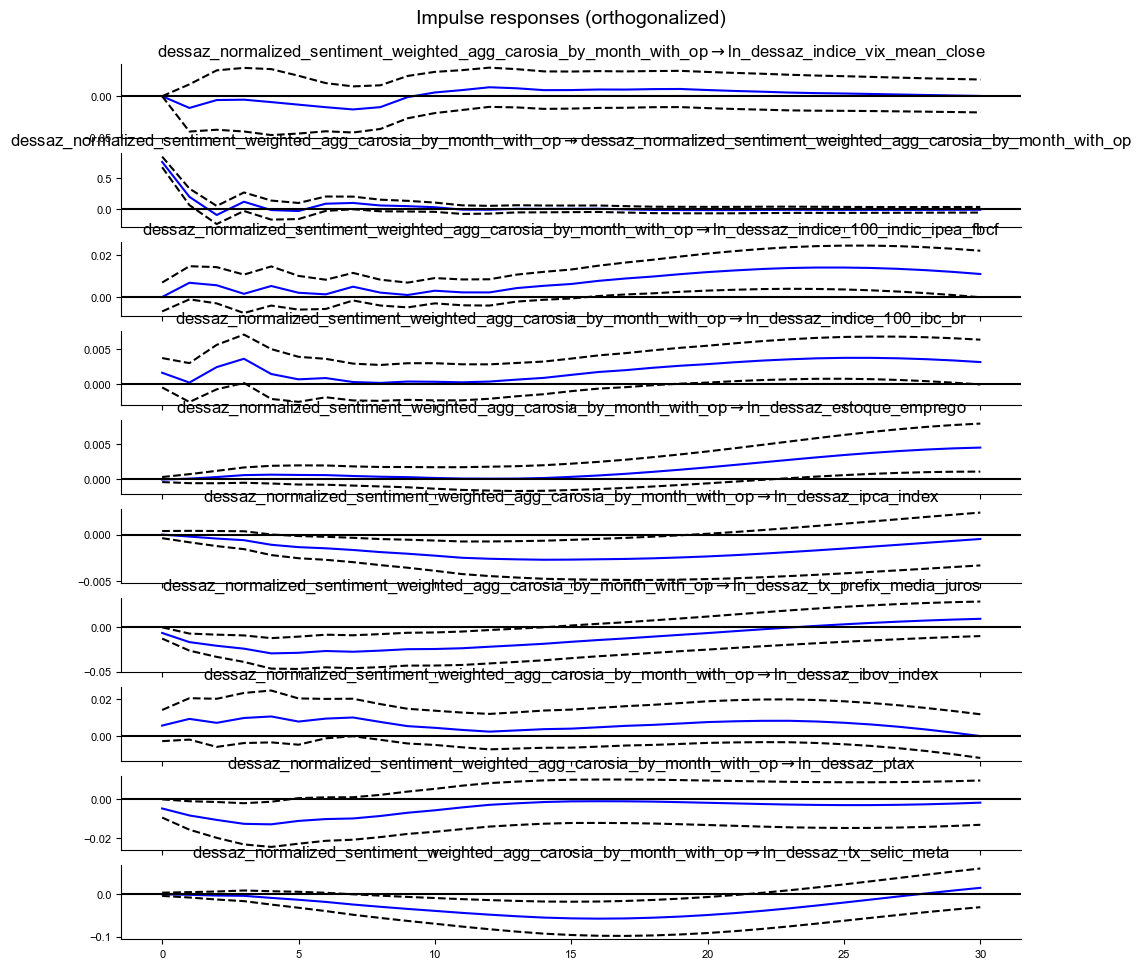

In [ ]:
# choosen model --> 4 lags
SENTIMENT_COL = 'dessaz_normalized_sentiment_weighted_agg_carosia_by_month_with_op'
# transf: 'd_', 'ln_', 'hp_ln_dev_from_trend_'
data = df_var[['ln_dessaz_indice_vix_mean_close',
               f'{SENTIMENT_COL}',
           # bloco variáveis reais
               # robusto à: indice_100_industrias_transformacao, indice_100_indic_ipea_fbcf,
               # ...indice_100_industria_geral
               'ln_dessaz_indice_100_indic_ipea_fbcf',
               'ln_dessaz_indice_100_ibc_br', # rubosto à ln e com ou sem ibc_br
               'ln_dessaz_estoque_emprego',
               'ln_dessaz_ipca_index',
           # bloco variáveis financeiras
               'ln_dessaz_tx_prefix_media_juros', # supondo que essa variável capte questoes relacionadas à divida/PIB
               'ln_dessaz_ibov_index',
               'ln_dessaz_ptax',
               'ln_dessaz_tx_selic_meta'
              ]].dropna()
results = VAR(data).fit(maxlags=6,
                        ic='aic',
                        trend = 'c')
results.irf(30).plot(
    impulse=f'{SENTIMENT_COL}', orth=True).show()
print(f'Lags: {results.k_ar} and stability: {results.is_stable()}')

In [ ]:
for col in results.resid.columns:
    jb_stats_p_val = round(sm.stats.stattools.jarque_bera(results.resid[col])[1], 4)
    if jb_stats_p_val < 0.05:
        print(f"{col}: p-value = {jb_stats_p_val} --> Resíduos da eq. NÃO É NORMAL")
    else:
        print(f"{col}: p-value = {jb_stats_p_val}")

ln_dessaz_indice_vix_mean_close: p-value = 0.0 --> Resíduos da eq. NÃO É NORMAL
dessaz_normalized_sentiment_weighted_agg_carosia_by_month_with_op: p-value = 0.0 --> Resíduos da eq. NÃO É NORMAL
ln_dessaz_indice_100_indic_ipea_fbcf: p-value = 0.0519
ln_dessaz_indice_100_ibc_br: p-value = 0.0164 --> Resíduos da eq. NÃO É NORMAL
ln_dessaz_estoque_emprego: p-value = 0.0 --> Resíduos da eq. NÃO É NORMAL
ln_dessaz_ipca_index: p-value = 0.0861
ln_dessaz_tx_prefix_media_juros: p-value = 0.0 --> Resíduos da eq. NÃO É NORMAL
ln_dessaz_ibov_index: p-value = 0.0 --> Resíduos da eq. NÃO É NORMAL
ln_dessaz_ptax: p-value = 0.0069 --> Resíduos da eq. NÃO É NORMAL
ln_dessaz_tx_selic_meta: p-value = 0.0032 --> Resíduos da eq. NÃO É NORMAL


### Estabilidade

In [ ]:
# Determine stability based on model coefficients
results.is_stable(verbose=True)
# raizes estão dentro do círculo unitário, logo modelo é estacionário

### Stationarity

In [ ]:
data.columns

In [ ]:
dict_df = {}
for column in data.columns:
    dict_df[column] = []
     # executar apenas para colunas q não tenham nulos
    if df_var[column].isnull().any() == False and df_var[column].isin([np.inf, -np.inf]).any() == False:
        for reg_param in ['c', 'ct', 'n']: # regresion params 'constant', 'const & trend', 'none
            adf_test = adfuller(df_var[column], regression = reg_param, autolag='AIC')
            stat = round(adf_test[0], 2)
            p_value = round(adf_test[1], 2)
            stationarity = ['stationary' if round(adf_test[1],2) < 0.05 else 'NON-stationary']

            dict_df[column].append(stat)
            dict_df[column].append(p_value)
            dict_df[column].append(stationarity)
    else:
        pass

tab_stationarity = pd.DataFrame.from_dict(dict_df,
                                           orient='index',
                                           columns = ['stat_c',
                                                      'p-value_c',
                                                      'stationarity_c',
                                                     'stat_ct',
                                                      'p-value_ct',
                                                      'stationarity_ct',
                                                     'stat_n',
                                                      'p-value_n',
                                                      'stationarity_n'])

In [ ]:
tab_stationarity

### Residual Analysis

In [ ]:
# residuos de cada equação estão aparentemente branqueados --> sem autocorrelação
fig, ax = plt.subplots(len(data.columns),
                       figsize=(6,20))

for i, col in enumerate(results.resid.columns):
    plot_acf(x = results.resid[col], ax = ax[i], lags = 28)
    ax[i].set_title(f'{col}')
plt.tight_layout()

#### Testes de Correlação Serial



##### Pormanteau Testes - ljung-box

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [ ]:
for col in results.resid.columns:
    lb_test = acorr_ljungbox(results.resid[col],
                             lags=4,  # default
                             return_df=True)
    print(col)
    print(lb_test)
    print('\n')
# alto p-valor não rejeitamos a hipótese nula de autocorrelações nulas

#### Autocorr

- teste LM - proposto por breusch-godfrey
- teste F - proposto por edgerton-shukur

Uma possível estratégia para lidar com autocorrelação é incluir mais defasagens (aumentar a ordem p do modelo), geralmente vai passar mais fácil nos testes, mas perde graus de liberdade.

Breusch-godfrey:
- from source code: https://www.statsmodels.org/stable/_modules/statsmodels/stats/diagnostic.html#acorr_breusch_godfrey

In [ ]:
# NÃO É POSSÍVEL: o teste só pode ser feito em RegressionResults e não em VARresults
#from statsmodels.stats.diagnostic import acorr_breusch_godfrey
#acorr_breusch_godfrey(results.resid[col], nlags=4)
# Se eu fizesse um OLS para cada equação aí seria possível

Resultados (abaixo):
- lm  float  Lagrange multiplier test statistic
- lmpval  float  The p-value for Lagrange multiplier test
- fval  float The value of the f statistic for F test, alternative version of the same test based on F test for the parameter restriction
- fpval  float The pvalue for F test
- res_store  ResultsStore  A class instance that holds intermediate results. Only returned if store=True

H0: os resíduos são iid

In [ ]:
# apenas alterei esse bloco
from statsmodels.tsa.tsatools import lagmat
from statsmodels.regression.linear_model import OLS

nlags = 4 # qual o número de lags ideal para o teste?
# o nº de lags escolhidas pelo critério de informação?

for col in results.resid.columns:
    x = np.asarray(results.resid[col]).squeeze()
    # ======
    if x.ndim != 1:
        raise ValueError("Model resid must be a 1d array. Cannot be used on"
                         " multivariate models.")
    exog_old = results.model.exog
    nobs = x.shape[0]
    if nlags is None:
        nlags = min(10, nobs // 5)
    x = np.concatenate((np.zeros(nlags), x))
    xdall = lagmat(x[:, None], nlags, trim="both")
    nobs = xdall.shape[0]
    xdall = np.c_[np.ones((nobs, 1)), xdall]
    xshort = x[-nobs:]
    if exog_old is None:
        exog = xdall
    else:
        exog = np.column_stack((exog_old, xdall))
    k_vars = exog.shape[1]

    resols = OLS(xshort, exog).fit()
    ft = resols.f_test(np.eye(nlags, k_vars, k_vars - nlags))
    fval = ft.fvalue
    fpval = ft.pvalue
    fval = float(np.squeeze(fval))
    fpval = float(np.squeeze(fpval))
    lm = nobs * resols.rsquared
    lmpval = stats.chi2.sf(lm, nlags)
    # Note: degrees of freedom for LM test is nvars minus constant = usedlags
    if round(fpval, 4) < 0.05 or round(lmpval, 4) < 0.05:
        print(f"{col}: F-test (p-val): {round(fpval, 4)}; LM-test (p-val): {round(lmpval, 4)} -> PROBLEMA")
    else:
        print(f"{col}: F-test (p-val): {round(fpval, 4)}; LM-test (p-val): {round(lmpval, 4)}")

#### Heterocedasticity

- H0: resíduos não possuem efeitos auto-correlacionados -> resíduos são HOMOCEDASTICOS
- H1: tem heterocedasticidade

https://www.statsmodels.org/dev/generated/statsmodels.stats.diagnostic.het_arch.html#statsmodels.stats.diagnostic.het_arch

In [ ]:
from statsmodels.stats.diagnostic import het_arch

In [ ]:
# output: lm-test, lm-pval, F-test, F-pval
for col in results.resid.columns:
    arch_p_val = round(het_arch(results.resid[col], nlags=8)[1],4)
    if arch_p_val < 0.05:
        print(f"{col}: p-value = {arch_p_val} --> resíduos possuem efeitos correlacionados")
    else:
        print(f"{col}: p-value = {arch_p_val}")

#### Normalidade

https://www.statsmodels.org/stable/generated/statsmodels.tsa.vector_ar.hypothesis_test_results.NormalityTestResults.html#statsmodels.tsa.vector_ar.hypothesis_test_results.NormalityTestResults

In [ ]:
from scipy.stats import norm

##### Jarque-bera:

- H0: 3º e 4º momentos sao iguais aos da normal

In [ ]:
col = 'dessaz_normalized_sentiment_weighted_agg_carosia_by_month_with_op'
#results.resid[col]

In [ ]:
# Calculate residual skewness and kurtosis
skew = stats.skew(results.resid[col])
kurtosis = 3 + stats.kurtosis(results.resid[col])
skew, kurtosis
# Normal: skew = 0 (negativo = assimetria esquerda, positivo = assimetria direita)
# Normal: kurtosis = 3 (> 3 mais concentrado que normal, < 3 mais achatado

In [ ]:
sm.stats.stattools.jarque_bera(results.resid[col])

In [ ]:
for col in results.resid.columns:
    jb_stats_p_val = round(sm.stats.stattools.jarque_bera(results.resid[col])[1], 4)
    if jb_stats_p_val < 0.05:
        print(f"{col}: p-value = {jb_stats_p_val} --> Resíduos da eq. NÃO É NORMAL")
    else:
        print(f"{col}: p-value = {jb_stats_p_val}")

In [ ]:
# Checking Visually
COL = 'dessaz_normalized_sentiment_weighted_agg_carosia_by_month_with_op'

mean = results.resid[COL].mean()
std = results.resid[COL].std()
normal_residuos = norm(loc = mean, scale = std)
X = np.linspace(normal_residuos.ppf(0.01), normal_residuos.ppf(0.99), 100)
Y = normal_residuos.pdf(X)

fig = go.Figure()
fig.add_traces(go.Histogram(x=results.resid[COL],
                            nbinsx=30,
                            histnorm='probability density',
                            name='Histogram'))
fig.add_traces(go.Scatter(x=X,
                          y=Y,
                          mode='lines',
                          line=dict(color='red'),
                          name='PDF'))

In [ ]:
# Checking against fitted values
col = 'dessaz_normalized_sentiment_weighted_agg_carosia_by_month_with_op'
px.scatter(y = results.resid[col].values,
           x = results.fittedvalues[col].values,
          marginal_y = 'histogram')

##### Shapiro-Wilk test for normality

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

In [ ]:
from scipy.stats import shapiro
for col in results.resid.columns:
    print(f"{col}: Shapiro-wilk (p-value): {round(shapiro(results.resid[col].values)[1], 4)}")

In [ ]:
# or a multivariate test --> testa todos os resíduos de uma vez?
# Results class for the Jarque-Bera-test for nonnormality.
results.test_normality(signif=0.05).summary()

### Applications

#### Prediction

In [ ]:
lag_order = results.k_ar # retrieving the autoregressive order choosen by aic criterion
# forecast(): Produce linear minimum MSE forecasts for desired number of steps ahead, using prior values y
results.forecast(y = data.values[-lag_order:],
                 steps = 10)

In [ ]:
results.plot_forecast(20)
plt.show()

Ao que parece previsão é uma questão de quão rápido os dados voltam para a média

Se eu quisesse fazer a previsão da variável original eu teria que inverter as transformações

#### Granger-causality

As variáveis do modelo possuem algum grau de causalidade entre si?

ATT: O TESTE ASSUME NORMALIDADE: por isso é geralmente é testado com VARResults

Algoritmo:
1. Rodar reg de Y sobre suas defasadas
2. Rodar outra reg de Y sobre suas defasadas + defasadas de X
3. aplicar teste F sobre as duas reg e ver s

- H0 - variável X NÃO granger-causa Y



Granger-Causality Tests:

https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.grangercausalitytests.html#statsmodels.tsa.stattools.grangercausalitytests

In [ ]:
max_lag = 6  # maximum number of lags to run teste

Y = 'tx_selic_meta' # X causa Y?
X = f'{SENTIMENT_COL}'

# The data for testing whether the time series in the second column...
# ... Granger causes the time series in the first column
gc_test = grangercausalitytests(df_var[[Y, X]].dropna(),
                                max_lag)

In [ ]:
# Check the p-values
for lag in range(1, max_lag + 1):
    p_value = gc_test[lag][0][test][1]
    if p_value < 0.05:
        print(f"Lag {lag} p-value: {p_value} --> {X} grander-causa {Y}")
    else:
        print(f"Lag {lag} p-value: {p_value}")

Rodar todas contra todas e ver se alguém causa alguém.

#### FEVD (Forecast Error Variance Decomposition)

In [ ]:
fevd = results.fevd(8)
#fevd.summary()
# após X períodos, qual a % de cada variável na explicação do erro de previsão da variavel

In [ ]:
results.fevd(20).plot()
plt.show()

# Outputs

## Impulse Response Function

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style or choose another style that suits your preference
sns.set_style("whitegrid")

In [ ]:
# Generate IRF plot
irf_plot = results.irf(36).plot(impulse=f'{SENTIMENT_COL}', orth=True)
# Adjust figure size
current_figure = plt.gcf() # get current figure
current_figure.set_size_inches(10, 15)  # Adjust width and height of the figure
# Show plot
plt.show()

In [ ]:
for i, subtitulo in enumerate(['Sentiment (OpLex) -> ln(Vix)',
                               'Sentiment (OpLex) -> Sentiment (OpLex) ',
                               'Sentiment (OpLex) -> ln(FBCF)',
                               'Sentiment (OpLex) -> ln(IBC-BR)',
                               'Sentiment (OpLex) -> ln(Estoque Emprego)',
                               'Sentiment (OpLex) -> ln(Indice IPCA)',
                               'Sentiment (OpLex) -> ln(Juros Prefixado Longo)',
                               'Sentiment (OpLex) -> ln(Indice IBOV)',
                               'Sentiment (OpLex) -> ln(Câmbio)',
                               'Sentiment (OpLex) -> ln(Selic Meta)']):
    irf_plot.axes[i].set_title(subtitulo)

In [ ]:
current_figure

# Todo
- tentar últimas transformações no melhor modelo (inflação e diminuir variáveis)
- realizar diagnóstico mais detalhado (filtro de outlier pode normalizar resíduos?)


- aplicar para séries estacionárias ?
- ver como outros índices de sentimento se comportam nessas outras especificações

# TODO (pós-quali.)

- aplicar SVAR? (ou deixar para após qualificação)
- Tentar mais uma vez pegar os valores dos gráficos de irf. Tentar pedir bem detalhadamente.
- Analise de robustez (como o indice se relaciona com outros índices, explica? é explicado? é correlacionado?) - Outros índices de sentimento (indice de confiança do consumidor, do empresário industrial e etc)

# Visualization

In [ ]:
# Extracting the columns as variables
vix = df_var['ln_dessaz_indice_vix_mean_close']
sent = df_var['dessaz_normalized_sentiment_weighted_agg_carosia_by_month_with_op']
fbcf = df_var['ln_dessaz_indice_100_indic_ipea_fbcf']
ibcbr = df_var['ln_dessaz_indice_100_ibc_br']
emp = df_var['ln_dessaz_estoque_emprego']
ipca = df_var['ln_dessaz_ipca_index']
jlong = df_var['ln_dessaz_tx_prefix_media_juros']
ibov = df_var['ln_dessaz_ibov_index']
ptax = df_var['ln_dessaz_ptax']
selic = df_var['ln_dessaz_tx_selic_meta']

# Creating a figure with subplots (3 columns and as many rows as needed)
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(8, 6))  # Adjusted to 4 rows and 3 columns

# List of variables and their titles
variables = [vix, sent, fbcf, ibcbr, emp, ipca, jlong, ibov, ptax, selic]
titles = ['VIX', 'Sentiment', 'FBCF', 'IBC-BR', 'Employment', 'IPCA', 'Long-term Interest', 'Ibovespa', 'PTAX', 'Selic']

# Flattening the axes for easy iteration
axes = axes.flatten()

# Plotting each variable
for i, ax in enumerate(axes[:len(variables)]):
    ax.plot(variables[i])
    ax.set_title(titles[i])
    ax.grid(True)

# Remove empty subplots if there are any
for ax in axes[len(variables):]:
    fig.delaxes(ax)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
print('sucess')